
 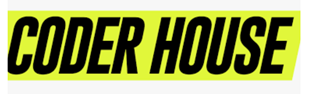

# **SEGUNDA ENTREGA DATA SCIENCE II**

## ABSTRACT

El presente trabajo se centra en el analisis de informacion disponible sobre los vuelos dentro del territorio de los EEUU desde 2019 a 2023 inclusive.

Durante el desarrollo, se pretende interpretar las principales caracteristicas del sistema de aviacion estadounidense en lo que refiere a distribucion y cantidad de aeropuertos, principales rutas, ademas de otras importantes caracteristicas, pero **fundamentalmente, el grado cumplimiento de horario de despegue/salida y aterrizaje/llegada**, persiguiendo alcanzar algunas conclusiones sobre los motivos que implican una eventual demora, el tiempo previsto y la probabilidad o prediccion de incurrir en una demora.

El trabajo se focaliza en la utilizacion de un fragmento de dicho dataset tomando solamente el año 2023 debido razones de limitaciones de espacio y manipulacion de datos.

Para finalizar, me parece importante aclarar la motivacion de la tematica seleccionada constituye una motivacion personal, siendo a mi entender el sistema de aviacion un sistema de suma importancia en la interconexion de un mundo cada vez mas ligado, ya sea por razones de turismo, negocio o estudio, pero principalmente, de una gran complejidad al avacar multiples variables como ser el clima, tamaños de ciudades, oferta y demanda, entre otras.



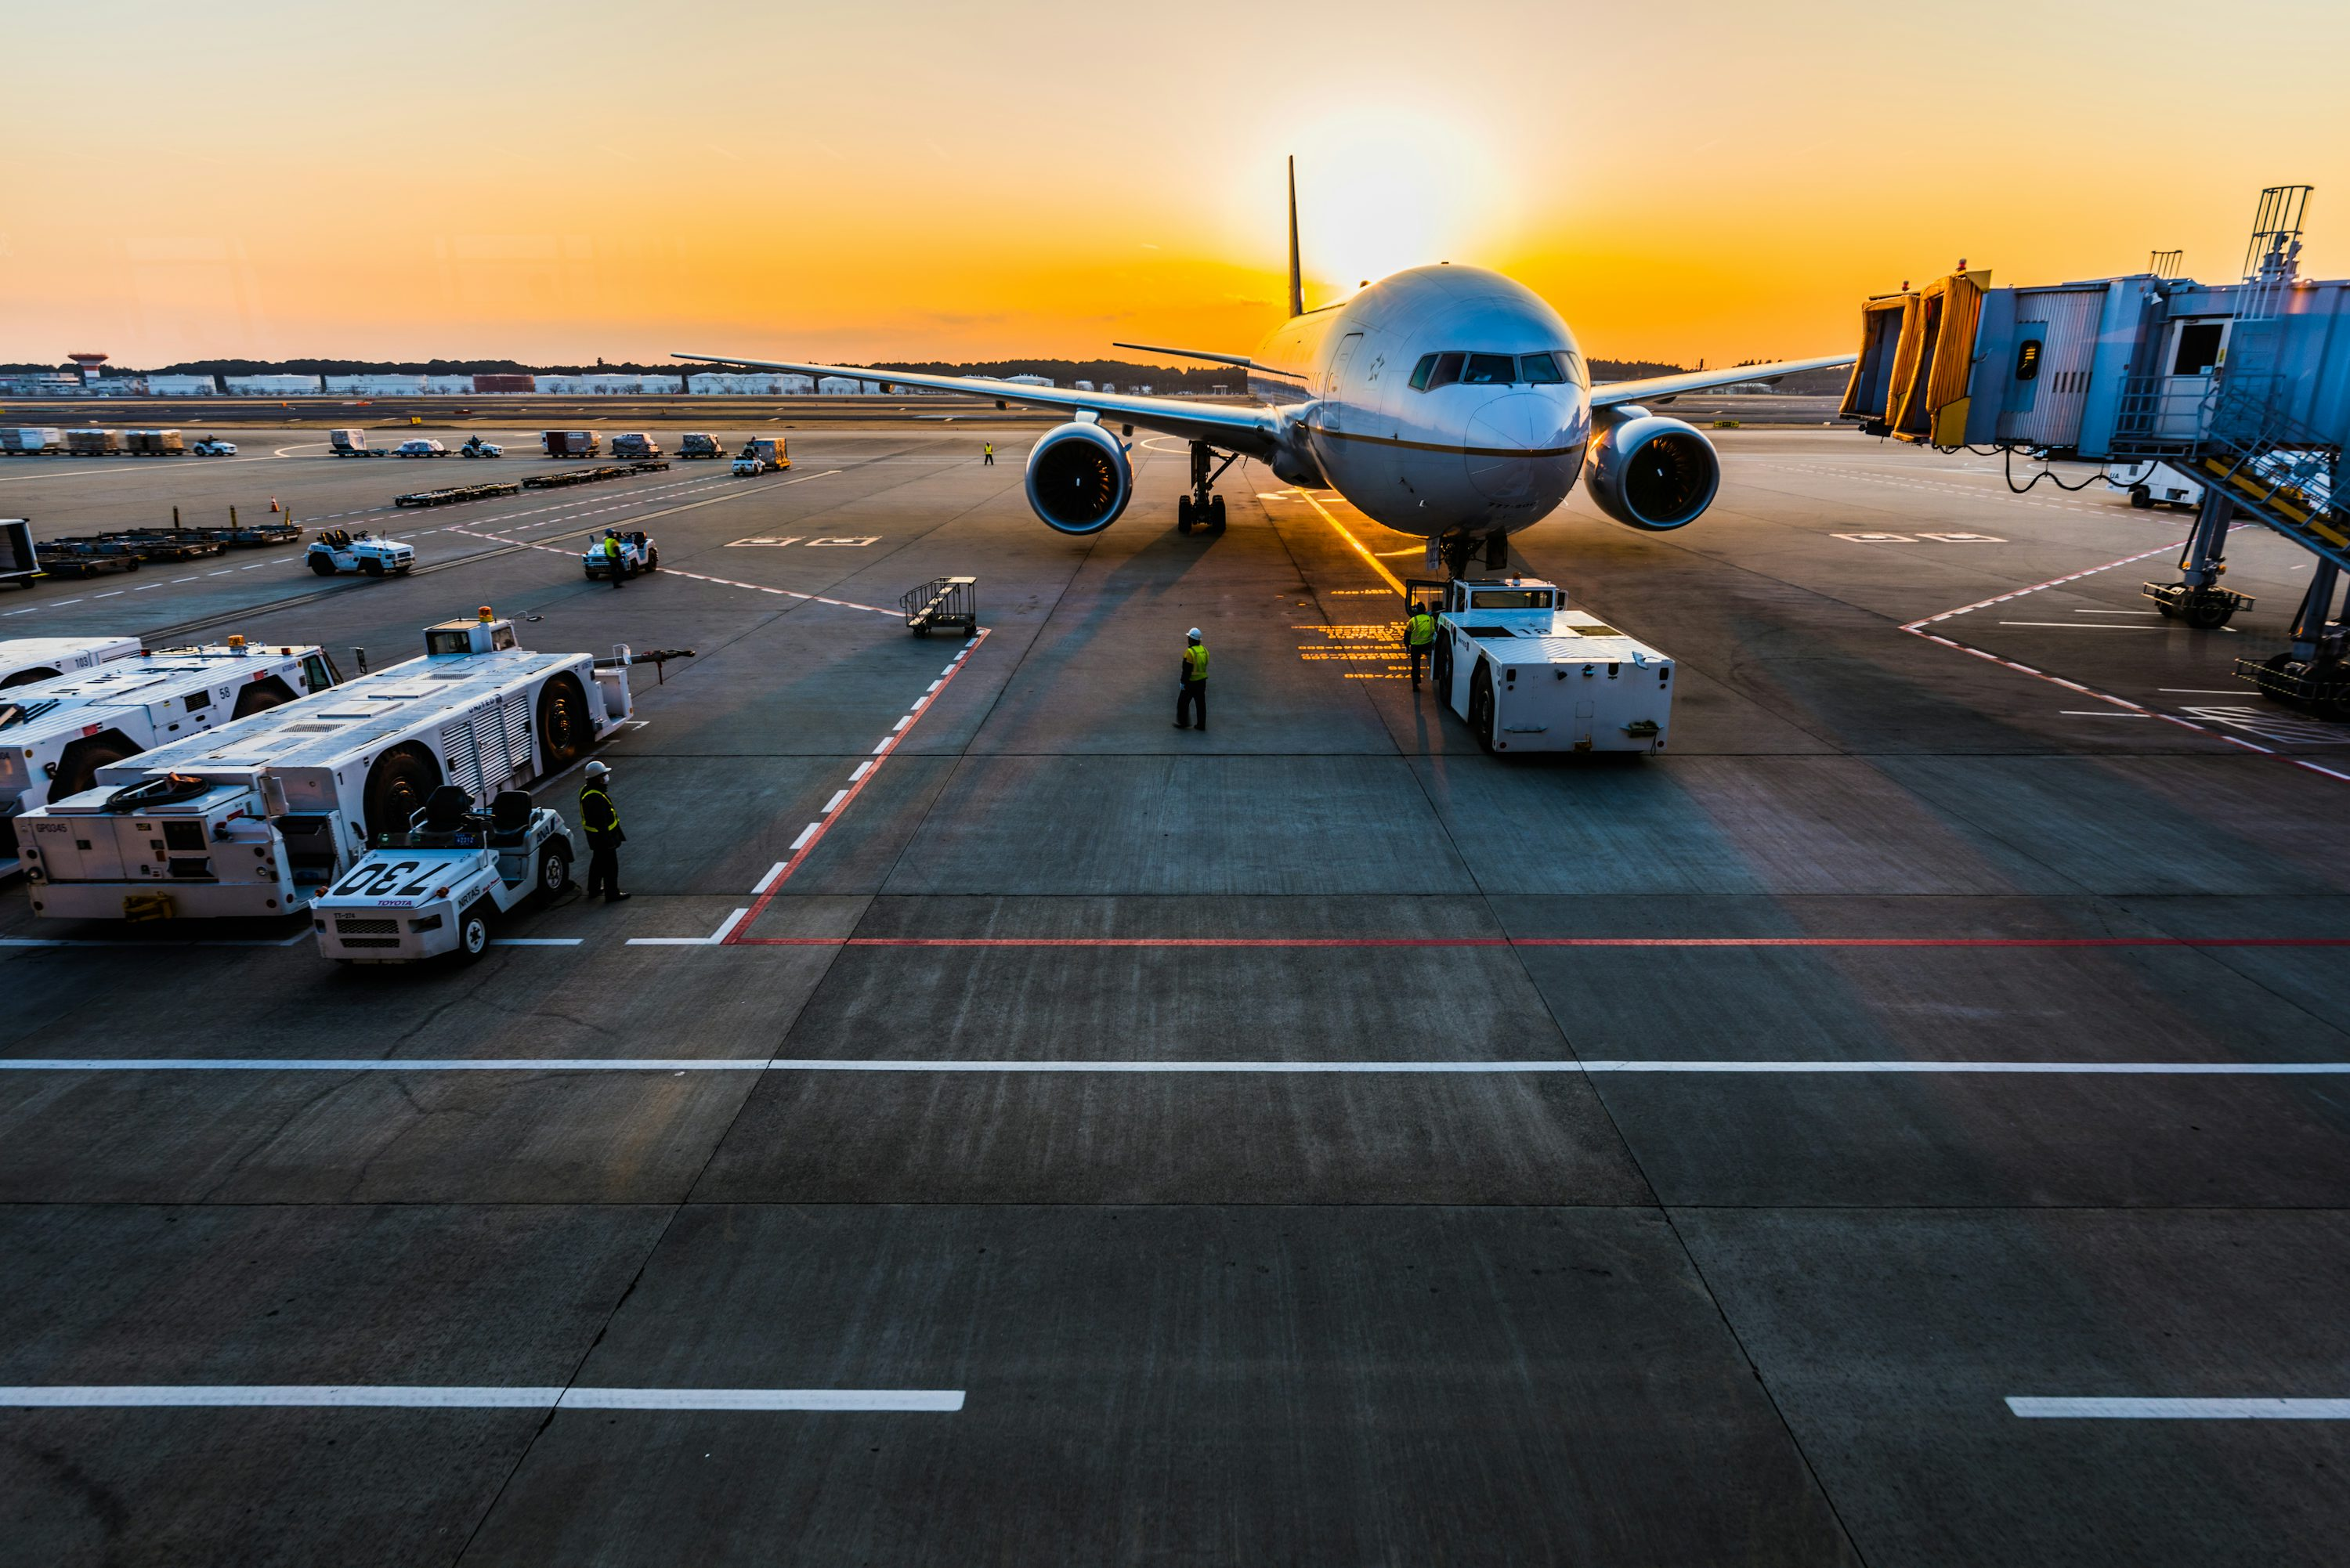
---------------------------------------------------------------------------


## **0- INTRODUCCION**

Según un informe de 2010 elaborado por la Administración Federal de Aviación de Estados Unidos (FAA), el impacto económico de los retrasos en los vuelos nacionales de los Estados Unidos supone un costo anual de 32.900 millones de dólares para los pasajeros, las aerolíneas y otros sectores de la economía.

Más de la mitad de esa cantidad proviene del bolsillo de los pasajeros, que no solo pierden tiempo esperando la salida de sus aviones, sino que también pierden conexiones, gastan dinero en comida y tienen que dormir en hoteles mientras están varados.

El informe, basado en datos de 2007, estimó que los retrasos en el transporte aéreo supusieron una merma de 4.000 millones de dólares en el PBI del país (EEUU) ese año.

Dicho todo lo anterior, debiera ser de interes de todas las partes involucradas (personas/pasajeros, compañias aereas y gobiernos) entender el motivo de eventuales retrasos y hasta intentar predecirlos y/o estimarlos.

Los datos provienen del siguiente dataframe descargado del sigueinte link:

https://www.kaggle.com/code/alperenkaran/visualization-of-flight-delays/notebook?select=_ALL_FLIGHTS_30m.csv

Este tiene 30 millones de registros y 32 columnas.
El mismo, se basa sobre datos de retrasos y cancelaciones de vuelos de aerolíneas dentro de los EEUU, en el periodo de agosto de 2019 - agosto de 2023.

Las fuentes allí citadas son el Departamento de Transporte de EE. UU., Oficina de Estadísticas de Transporte
https://www.transtats.bts.gov .

Por ultimo, se aclara que se utiliza un segundo dataframe con informacion de los aeropuertos de EEUU.

El mismo se denomina airports.csv y se extrae del siguiente link:

https://www.kaggle.com/code/nancyalaswad90/airline-on-time-data-visualization


## **1- PLANTEO DE OBJETIVOS**

Inicialmente, planteamos los siguientes objetivos e hipotesis:

1- Aplicar modelos de regresion para predecir la variable ARR_DELAY.

2- Aplicar modelos de clasificacion para predecir si un vuelo va a estar demorado y a su vez el tipo de demora (en despegue, aterrizaje, los dos o ninguno).

3- Aplicar modelo de clustering para caracteristizar o agrupar aerolineas y aeropuertos.

4- Como objetivo general, y durante todo el analisis, se pretende analizar el sistema estadounidense de aviacion, caracteritizando distribucion de aeropuertos, principales rutas, cantidad de viajes y grado de confiabilidad del mismo.



Como hipotesis, entendemos se trata de una industria muy afectada por multiples imprevistos, lo cual hiciera suponer el grado de probabilidad de incurrir en una demora es elevado. Estas demoras, se suponen mas asociadas a cuestiones climaticas o de alta demanda del sistema, aspecto que debiera agudizarse en las principales rutas.


Por ultimo, la audiencia a la que se encuentra dirigido el presente trabajo es toda aquella persona con conocimientos basicos de analisis de datos y algun grado de curiosidad sobre sistema de aviaciones y vuelos.

## **2- LECTURA INICIAL DE DATOS**






### 2.1 Importacion de librerias principales

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

### 2.2 Conexion con drive

In [ ]:
# Configuramos el entorno de Python en Google Colab
from google.colab import drive
import os

drive.mount("/content/drive")

# Change to the specified directory in Google Drive
os.chdir("/content/drive/MyDrive/Data Science II/PROYECTO FINAL (ENTREGA)")

print(os.getcwd())

### 2.3 Importacion Dataframe principal (DF1)

In [ ]:
# importar archivo flights hasta 30 junio 2019 leyendo el archivo por bloques

# Aclaracion: Por el tamaño del archivo (30 millones de filas y 32 columnas), se pretende analizar solo el año 2019

# Para ello, la lectura de datos se hace por bloques y luego se concatenan en un unico archivo.
# Esto, a su vez, se debe realizar en dos partes, desde el 01/01/2019 hasta el 30/06/2019, y una segunda
# desde 01/07/2019 hasta el 31/12/2019. Luego tambien, se concatenan ambos dataframes.

# Se debe importar de esta forma pues, caso contrario, la ejecucion daba error por exceder memoria RAM.

# Ruta al archivo CSV
archivo = 'flights.csv'

# Tamaño del bloque (segun memoria RAM)
chunk_size= 1_000_000

# Lista para almacenar los datos filtrados
Datos_filtrados_2019_h1 = []

# Leer el archivo por bloques (primer semestre)
for bloque in pd.read_csv(archivo, chunksize = chunk_size):
    # Filtrar por año 2019 y fecha hasta 30 de junio
    filtrado = bloque[
        (bloque['FL_DATE'].str.startswith('2019')) &
        (bloque['FL_DATE'] <= '2019-06-30')
    ]
    Datos_filtrados_2019_h1.append(filtrado)

# Unir todos los datos filtrados
resultado2019_h1 = pd.concat(Datos_filtrados_2019_h1)

del Datos_filtrados_2019_h1

In [ ]:
# Se realiza lo mismo con el segundo semestre, es decir, 01/07/2019 hasta el 31/12/2019

# Ruta al archivo CSV
archivo = 'flights.csv'

# Tamaño del bloque (segun memoria RAM)
chunk_size= 1_000_000

# Lista para almacenar los datos filtrados
Datos_filtrados_2019_h2 = []

# Leer el archivo por bloques
for bloque in pd.read_csv(archivo, chunksize = chunk_size):
    # Filtrar por año 2022 y fecha entre 01 de julio y 31 de diciembre
    filtrado = bloque[
        (bloque['FL_DATE'] >= '2019-07-01') &
        (bloque['FL_DATE'] <= '2019-12-31')
    ]
    Datos_filtrados_2019_h2.append(filtrado)

# Unir todos los datos filtrados
resultado2019_h2 = pd.concat(Datos_filtrados_2019_h2)

del Datos_filtrados_2019_h2

In [ ]:
# concateno resultado 2019 h1 y h2, luego borro ambos

# Concatenar los dos dataframes
resultado2019 = pd.concat([resultado2019_h1, resultado2019_h2])

# Eliminar los dataframes originales para liberar memoria
del resultado2019_h1
del resultado2019_h2

In [ ]:
# Copio el dataframe originado para manipular/modificar.

df1 = resultado2019.copy()

In [ ]:
# Eliminamos el df resultado2019 por problemas de memoria. IDEALMENTE, DEBERIA MANTENERSE EL DF ORIGINAL

del resultado2019

### 2.4 Importacion Dataframe 2 (DF2): Contiene informacion de aeropuertos de EEUU

In [ ]:
# Lectura de dataframe2 (que contiene la latitud y longitud de cada aeropuertode EEUU)

df2 = pd.read_csv('airports.csv')

## **3- INSPECCION INICIAL DE DATAFRAMES**

### 3.1 Dataframe principal DF1

#### 3.1.1 Descripcion de variables:

* **V0- FL_DATE:** "Flight Date" o fecha de vuelo. Es de ***tipo object*** y tiene el siguiente formato: "YYYY-MM-DD".

* **V1- AIRLINE:** Nombre de la aerolinea. Es de ***tipo object***.

* **V2- AIRLINE_DOT:** Se procederá a eliminar dado que es redundante con la variable V1 y V3. Es una concatenacion entre las columnas AIRLINE Y AIRLINE_CODE y es de ***tipo object***.

* **V3- AIRLINE_CODE:** Codigo de la aerolinea. El código de aerolínea (también conocido como código IATA) es una abreviatura de dos letras que identifica a la aerolínea. Este código se utiliza en diversos sistemas de reserva, como billetes de avión e información de embarque, para facilitar la identificación de la aerolínea involucrada en un vuelo. Es de ***tipo object***.

* **V4- DOT_CODE:** Es un codigo o ID (nro entero) de identificación asignado por el Departamento de Transporte de EE. UU. para identificar a una aerolínea (transportista) única. Es de ***tipo integer***.

* **V5- FL_NUMBER:** Es un numero que identifica un servicio en particular, refiriendonos a servicio con un viaje en particular, tomando siempre la misma ciudad de origen y destino (o ruta).

  Cada aerolínea tiene su propio método para asignarlos. Sin embargo, existen algunas reglas generales en la industria:

  - Para empezar, todos los números de vuelo deben estar comprendidos entre el 1 y el 9999. Es de ***tipo integer.***

  - Salvo excepciones, hay un orden interno en la asignación de estas cifras. Los números pares suelen indicar vuelos que salen del norte y del este, y los impares vuelos que salen del sur y del oeste.

  - Los dígitos más bajos indican que se trata de vuelos históricamente importantes o de gran relevancia dentro de la organización interna de las aerolíneas.

  - Los viajes de regreso suelen tener el dígito siguiente al vuelo de ida: es decir, si el BA1 llega a Nueva York, al volver a Londres se convertirá en el BA2. Esto acontece en todas las aerolíneas. Vueling, por ejemplo, cuando vuela de Ibiza a Barcelona usa el VY3515 y de Barcelona a Ibiza, el VY3516.

* **V6- ORIGEN:** Nombre del aeropuerto de origen. Es de ***tipo object***.

* **V7- ORIGIN_CITY:** Nombre de la ciudad donde esta ubicado el aeropuerto de origen. Es de ***tipo object***.

* **V8- DEST:** Nombre del aeropuerto de destino. Es de ***tipo object***.

* **V9- DEST_CITY:** Nombre de la ciudad donde esta ubicado el aeropuerto de destino. Es de ***tipo object***.

* **V10- CRS_DEP_TIME:** Se refiere a la hora de salida programada de la aeronave tal como se indica en el sistema de reservas (CRS - Computer Reservation System). Esta hora es la hora en la que está previsto que el avión salga de la puerta de embarque, no la hora en la que esta previsto que despegue. Es de ***tipo integer***.

* **V11- DEP-TIME:** Se refiere a la hora de salida real de la aeronave. Esta hora es la hora real en la que el avión salió de la puerta de embarque, no la hora en la que realmente despegó (tiene un tiempo de demora entre la la salida de la puerta hasta llegar a la pista y despegar efectivamente). Es de ***tipo float***.

* **V12- DEP-DELAY:** Diferencia en minutos entre la hora de salida programada y la real (V11-V10). Los aviones que salieron de la puerta de embarque antes de lo programado tienen un DEP_DELAY negativo. Es de ***tipo float***.

* **V13- TAXI_OUT:** Tiempo que tarda la aeronave en desplazarse desde el lugar de estacionamiento en la terminal hasta la pista, lista para el despegue. Esta variable esta expresada en minutos. Es de ***tipo float***.

* **V14- WHEELS_OFF :** Es una expresión técnica utilizada para designar el momento/horario en el que el avión despega, es decir, cuando las ruedas se levantan del suelo. Es de ***tipo float***.

* **V15- WHEELS_ON :** Es una expresión técnica utilizada para designar el momento/horario en el que el avión aterriza, es decir, cuando las ruedas de un avión tocan el suelo. Es de ***tipo float***.

* **V16- TAXI_IN:** Tiempo que tarda la aeronave en desplazarse desde la pista hasta el lugar de estacionamiento en la terminal, después del aterrizaje. Esta variable esta expresada en minutos. Es de ***tipo float***.

* **V17- CRS_ARR_TIME:** Se refiere a la hora de llegada programada de la aeronave tal como se indica en el sistema de reservas (CRS - Computer Reservation System). Esta hora es la hora en la que está previsto que el avión llegue a la puerta de desembarque, no la hora en la que esta previsto que aterrice. Es de ***tipo integer***.

* **V18- ARR_TIME:** Se refiere a la hora de llegada real de la aeronave. Esta hora es la hora real en la que el avión llegó a la puerta de desembarque, no la hora en que aterrizó. Es de ***tipo float***.

* **V19- ARR_DELAY:** Diferencia en minutos entre la hora de llegada programada y la real (V18-V17). Los aviones que a la puerta de desembarque antes de lo programado tienen un ARR_DELAY negativo. Es de ***tipo float***.

* **V20- CANCELLED:** Indica si el vuelvo fue o no cancelado (1 = fue cancelado). Es de ***tipo float***.

* **V21- CANCELLATION_CODE:** Código que especifica el motivo de la cancelación del vuelo. Es de ***tipo object***.

  Los códigos de cancelación de vuelo "A", "B" y "C" indican el motivo de la cancelación según la Administración Federal de Aviación (FAA). "A" significa que la cancelación fue causada por la aerolínea, "B" se refiere a las condiciones climáticas y "C" indica un problema con la Administración Nacional de Aviación.

* **V22-DIVERTED:** Variable que indica si un vuelo es desviado o no, es decir, aterriza en un aeropuerto/destino diferente al planificado (1 = fue desviado). Es de ***tipo float***.

  Un vuelo desviado es aquel que, por alguna circunstancia imprevista, se ve obligado a aterrizar en un aeropuerto distinto al de su destino original. Las razones por las que se desvía un vuelo pueden incluir problemas técnicos, emergencias médicas, condiciones climáticas adversas o incluso decisiones de la aerolínea.

* **V23-CRS_ELAPSED_TIME:** Esta variable indica el tiempo esperado de vuelo, incluyendo el tiempo total del avion en vuelo (aire) mas tiempo de maniobras (en suelo) (segun el sistema CRS - Sistema de Reservas Computarizado). La variable esta expresada en minutos. Es de ***tipo float***.

* **V24-ELAPSED_TIME:** Esta variable indica el tiempo real de vuelo en minutos (en el aire mas tiempo de maniobra). Es de ***tipo float***.

* **V25-AIR-TIME:** Esta variable indica el tiempo real de vuelo (solo en el aire). Esta expresada en minutos. Es de ***tipo float***.

* **V26-DISTANCE:** Distancia entre dos aeropuertos (expresado en millas). Es de ***tipo float***.

* **V27-DELAY_DUE_CARRIER:** Se refiere a un retraso de vuelo que resulta de problemas o decisiones de la aerolínea (expresado en minutos).
Esto podría incluir situaciones como problemas de mantenimiento de la aeronave, problemas con la tripulación, retrasos en la limpieza o carga de la aeronave o incluso retrasos en la salida debido a decisiones de la aerolínea. Es de ***tipo float***.

* **V28-DELAY_DUE_WEATHER:** Se refiere a un retraso de vuelo que resulta de problemas o contingencias climáticas (expresado en minutos).

* **V29-DELAY_DUE_NAS:** Los retrasos del Sistema Nacional del Espacio Aéreo (NAS) se refieren a retrasos de vuelos que se atribuyen a problemas dentro del propio sistema, como el volumen de tráfico, fallas de los equipos o las condiciones de la pista, entre otros (expresado en minutos). Es de ***tipo float***.

* **V30-DELAY_DUE_SECURITY:** Un retraso debido a la seguridad de la aerolínea puede ocurrir por diferentes razones, como procedimientos de seguridad intensificados, inspecciones adicionales o problemas con las instalaciones de seguridad del aeropuerto (expresado en minutos). Es de ***tipo float***.

* **V31-DELAY_DUE_LATE_AIRCRAFT:** Un "retraso de aeronave" significa que un vuelo se retrasó porque el avión que lo operaba llegó tarde al aeropuerto. En otras palabras, el vuelo programado se retrasa debido al retraso de un vuelo anterior que utiliza el mismo avión (expresado en minutos). Es de ***tipo float***.


#### 3.1.2 Dimensiones, tipo de datos y estadisticas básicas:

In [ ]:
# No aplicamos el siguiente recurso por el tamaño del dataframe df1.

# !pip install ydata-profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df1, title="YData Profiling Report")
# profile


In [ ]:
# Evaluamos cantidad de filas y columnas del dataframe con la funcion shape (filas,columnas)

df1.shape

Conclusion: El dataframe principal tiene 7.422.037 registros o filas y 32 columnas o variables (inicialmente, luego iremos modificando el dataframe copiado en df1).

In [ ]:
# Reinicio el indice del dataframe copiado para asegurarnos las variables vayan de 0 a n-1

df1 = df1.reset_index(drop=True)
df1.info()

# Nota: Si ejecutamos solo df1.types muestra tambien el tipo de dato de cada columna.
# Dado que ya esta reflejada esa informacion con df1.info() no se ejecuta esa sentencia.


Conclusión: En total tenemos 32 variables, de las cuales 19 son de tipo float, 9 tipo object y 4 integer.

In [ ]:
# imprimimos primeras 20 filas del dataframe ajustando todas las columnas en una sola hoja y seleccionando
# las primeras 20 filas/registros.

# Nota: Si usaramos la sentencia df1.tail(20) mostraria las ultimas 20 filas.
# Si usaramos df1.sample(20) mostraria 20 registros aleatoriamente.

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df1.head(80000)

In [ ]:
# Generamos un describe para variables numericas, colocando los numero con 2 decimales
# (tipo float en lugar de numeracion cientifica).

# Ademas, transponemos la matriz, colocando en las columnas los valores del analisis y en las filas las variables
# Esto ultimo para que sea legible y entre en un solo "renglon"

pd.options.display.float_format = '{:.2f}'.format
print(df1.describe().T.to_string())

Comentario: Si bien aqui se reflejan 23 variables en total las variables que tienen sentido analizar son las asociadas a tiempo o distancia.

Es decir, las siguientes variables no contienen un analisis representativo cuyo motivo se expone a continuacion:

* **DOT_CODE:** Es un entero que identifica la aerolinea. En este dataframe va desde 19393 a a 20452. No brinda informacion valiosa la media, variacion estandar y resto de la informacion.
* **FL_NUMBER:** Es un entero que identifica el vuelo (origen_destino). En este dataframe va desde 1 a 7933. Mismo criterio o explicacion anterior respecto a la informacion disponible.
* **CANCELLED**: Se trata de una variale booleana que es 1 si el vuelo fue cancelado y 0 si no lo fue.
* **DIVERTED**: Se trata de una variale booleana que es 1 si el vuelo fue desviado (aterrizo en una ciudad/aeropuerto no planificado) y 0 si no lo fue.



Las variables que si hacen sentido analizar son,

* **CRS_DEP_TIME, DEP_TIME, WHEEL_OFF, WHEEL_IN, CRS_ARR_TIME y ARR_TIME:** Todas estas variables exprensan un horario y varian entre 1 y 2400 (o 2359).

* **DEP_DELAY**: Es la diferencia entre las variables CRS_DEP_TIME y DEP_TIME. La media esta en torno a 10,92 minutos de demora entre el horario programado y el real de salida. El valor maximo expresa un valor atipico que luego analizaremos.

* **TAXI_OUT**: Es el tiempo desde que el avion sale de la puerta de embarque hasta llegar a la pista de despegue. El promedio fue 17,39 minutos. El valor maximo tambien expresa un valor atipico que luego analizaremos de 227 minutos.

* **TAXI_IN**: Es el tiempo desde que el avion aterriza hasta la puerta de embarque. El promedio fue 7,74 minutos. El valor maximo tambien expresa un valor atipico que luego analizaremos de 316 minutos.

* **ARR_DELAY:** Es la diferencia entre las variables CRS_ARR_TIME y ARR_TIME. La media esta en torno a 5,41 minutos de demora entre el horario progamado y el real de llegada. El valor maximo expresa tambien un valor atipico que luego analizaremos.

* **CRS_ELAPSED_TIME y ELAPSED_TIME:** La primera expresa el tiempo esperado de vuelo (completo) mientras que la segunda expresa el tiempo real. Ambas estan expresadas en minutos. Llama la atencion que el valor esperado es sustancialmente mayor al real (evaluaremos luego si se trata de un error).

* **AIR_TIME y DISTANCE:** Tambien exponen valores maximos muy superiores a la media. En este caso, expresan el valor del vuelo (en aire) en minutos y la distancia (en millas).

* **DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT:** Son todas variables que expresan la demora en minutos (por diferentes motivos). Todas tienen una cantidad de nulos considerable, pero luego evaluaremos si esta asociado a los viajes que no tienen demoras o que no tienen asignado ese motivo en particular (no podemos inferir que se trate de un error). Por otro lado, podemos inferir que tienen valores maximos muy distantes de la media, lo cual podrian tratarse de outliers.

In [ ]:
# Generamos a continuacion un describe para las variables categoricas de df1

pd.options.display.float_format = '{:.2f}'.format
print(df1.describe(include='object').T.to_string())


Aqui podemos concluir que el dataframe tiene en total 17 aerolineas, 360 aeropuertos de origen (en 353 ciudades), con mismas cantidades en destino (aeropuertos y ciudades).

Por otro lado, se exponen 4 codigos que explican el motivo de la cancelacion (en caso de haber sido cancelado el vuelo).

Esta ultima variable tiene varios valores nulos (el count es muy bajo Vs dimension del dataframe), pero esto a priori no supone un problema (solo tiene un valor si el vuelo fue cancelado).

In [ ]:
# Reflejamos a continuacion por columna/variable la cantidad de datos nulos y datos unicos.
# A su vez, se calcula y muestra el % de datos nulos (sobre el total de datos)

print(pd.DataFrame({
    'datos_nulos': df1.isnull().sum(),
    '%_nulos': (df1.isnull().sum() / len(df1) * 100).map('{:.2f}%'.format),
    'datos_unicos': df1.nunique(),
}))

Las variables que mas nulos tienen son aquellas que reflejan la demora (en minutos) por el motivo en particular. A priori no implica un problema considerando no todos los vuelos estan demorados, y de aquellos demorados, no todos tienen el mismo motivo.

De la misma forma, el codigo de cancelacion tiene un porcentaje elevado de valores nulos, pero tampoco implica un inconveniente (es razonable que aquellos vuelos que no fueron cancelados tengan un valor nulo).

Luego, el resto de las variables tienen porcetnaje muy bajos de valores nulos respecto al total (menor al 2.1%). Evaluaremos luego que realizaremos con estos casos.

Respecto a valores unicos, en rangos generales, queda claro que se repiten con frecuencia elevada todos los valores de cada variable. Por ejemplo, tenemos solo 17 aerolineas, 360 ciudades de origen, 360 ciudades de destino, 7089 vuelos unicos, mientras que el dataframe tiene mas de 7,2 millones de registros.

### 3.2 Dataframe secundario DF2

#### 3.2.1 Descripcion de variables:

* **V0-IATA_CODE:** La variable expone el nombre del aeropuerto con el codigo de IATA (Aviacion Americana). Se tratan de 3 letras y es de ***tipo object***. Coincide con la variable V6 ORIGIN del dataframe principal (DF1).  
* **V1-AIRPORT:** Nombre del aeropuerto, de ***tipo object***.
* **V2-CITY:** Nombre de la ciudad donde esta ubicado el aeropuerto, de ***tipo object***.
* **V3-STATE:** Nombre del estado donde esta ubicado el aeropuerto, de ***tipo object***.
* **V4-COUNTRY:** Nombre del pais, de ***tipo object***.
* **V5-LATITUDE:** Latitud (coordenada) del aeropuerto, de ***tipo float***.
* **LONGITUDE:** Longitud (coordenada) del aeropuerto, de ***tipo float***.

#### 3.2.2 Dimensiones, tipo de datos y estadisticas basicas:

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df2, title="YData Profiling Report")
profile

In [ ]:
# Evaluamos cantidad de filas y columnas del dataframe con la funcion shape (filas,columnas)

df2.shape

Este segundo dataframe tiene 7 columnas/variables y 377 registros.

In [ ]:
# Analizamos los tipos de datos y cantidad de nulos de este dataframe.

df2.info()

No tiene datos nulos y existen 5 variables tipo object y 2 variables tipo float.

In [ ]:
# Mostramos primeras 20 filas
df2.head(20)

In [ ]:
# Realizamos un describe de las variables numericas del dataframe airports

pd.options.display.float_format = '{:.2f}'.format
print(df2.describe().T.to_string())

Solo se tienen como variables numericas la latitud y longitud de cada aeropuerto.

In [ ]:
# A continuacion realizamos un describe de las variables no numericas (categoricas) del dataframe airports

print(df2.describe(include='object').T.to_string())


El hecho que existan 377 IATA_CODE y solo 375 unicos nos expone que hay 2 registros repetidos (estos valores debieran ser unicos, pues es un codigo que representa un Aeropuerto en particular).

Por el contrario, si esta correcto que existan menos cantidad de ciudades y estados que cantidad de registros (377), pues esto expone que una ciudad (y un estado) puede tener mas de un aeropuerto. Por eso hay 356 ciudades unicas y 55 estados.

Por ultimo, todas pertenecen a un unico pais en analisis (EEUU), por eso todas las variables country tienen un unico valor.

## **4- DATA WRANGLING**

### 4.1 Dataframe secundario DF2

#### 4.1.1 Eliminar repetidos:

Dado que no tenemos valores nulos ni otro tipo de errores en este dataframe secundario (el cual tiene solo 363 registros), procedemos unicamente a anular los registros repetidos.

Nota: De este Dataframe solo se utilizaran los campos Latitud y Longitud para combinar luego con el Dataframe principal DF1.

In [ ]:
# contamos IATA CODE repetidos

iata_counts = df2['IATA_CODE'].value_counts()
print(iata_counts[iata_counts > 1])


In [ ]:
# Eliminamos filas con IATA_CODE repetidos

# Eliminar filas duplicadas basadas en la columna 'IATA_CODE', manteniendo la primera ocurrencia.
airports = df2.drop_duplicates(subset=['IATA_CODE'], keep='first')

# Verificar si se eliminaron los duplicados
iata_counts_cleaned = airports['IATA_CODE'].value_counts()
print("\nConteo de IATA_CODE después de eliminar duplicados:")
print(iata_counts_cleaned[iata_counts_cleaned > 1])

print("\nInformación del DataFrame después de eliminar duplicados:")
airports.info()

### 4.2 Dataframe principal DF1

#### 4.2.1 Eliminar repetidos:

In [ ]:
# eliminamos registros duplicados (si los hubiera) e imprimimos cuantos fueron eliminados

# Contamos el número de filas antes de eliminar duplicados
filas_antes = df1.shape[0]

# Eliminamos filas duplicadas. `keep=False` marca todos los duplicados como True.
# Luego, negamos esa máscara para mantener solo los no duplicados.
duplicados_mask = df1.duplicated(keep=False)
df1 = df1[~duplicados_mask].copy()

# Contamos el número de filas después de eliminar duplicados
filas_despues = df1.shape[0]

# Calculamos la cantidad de registros eliminados
registros_eliminados = filas_antes - filas_despues

# Imprimimos la cantidad de registros eliminados
print(f"Cantidad de registros duplicados eliminados: {registros_eliminados}")

del filas_antes, filas_despues, registros_eliminados, duplicados_mask

#### 4.2.2 Eliminar columnas redundantes:

In [ ]:
# Eliminamos AIRLINE_DOT, DOT_CODE

# AIRLINE DOT es redundante, pues es la concatenacion de las columnas AIRLINE Y AIRLINE_CODE.
# DOT_CODE es redundante, pues cada aerolinea tiene una forma de identificar univoca mediante la columna AIRLINE_CODE.

df1 = df1.drop(columns=['AIRLINE_DOT', 'DOT_CODE'])

#### 4.2.3 Corrección tipo de datos:

A priori, entendemos que la fecha (variable FL_DATE) esta clasificada como tipo object y debe estar con el tipo de dato datatime.

In [ ]:
# Cambiamos el tipo de dato de FL_DATE de Object a datetime y
# CANCELLED y DIVERTED de float64 a boolean.

df1['FL_DATE'] = pd.to_datetime(df1['FL_DATE'])

df1['CANCELLED'] = df1['CANCELLED'].astype(bool)
df1['DIVERTED'] = df1['DIVERTED'].astype(bool)

df1.info()

#### 4.2.4 Evaluamos si hay errores de tipeo (mayuscula/minuscula) o tipo de datos:

Analizaremos las variables categoricas para entender si hay algun error de tipeo (ej mayuscula o minuscula) o de nombre incorrecto.

In [ ]:
# Inicialmente identificamos las variables categoricas del dataframe df1_final (tipo object)

# Seleccionar las columnas con variables categóricas
categorical_cols = df1.select_dtypes(include='object').columns

# Imprimir los nombres de las columnas categóricas
print("Columnas con variables categóricas:")
for col in categorical_cols:
    print(col)

In [ ]:
# Verificamos si hay errores de tipeo, mayuscula o minusculas en df1 (variables categoricas).

# Iterar sobre las columnas categóricas (excepto FL_DATE) y convertir a minúsculas (si aplica)
for col in ['AIRLINE','AIRLINE_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CANCELLATION_CODE']:
    if col in df1.columns and df1[col].dtype == 'object':
        df1[col] = df1[col].str.lower()
        print(f"\nValores únicos para la columna '{col}' después de convertir a minúsculas:")
        print(df1[col].unique())

No se observan errores de mayuscula/minuscula o tipeo a corregir en variables categoricas.

### 4.3 Join entre DF1 y DF2:

Realizamos un Join entre el dataframe principal DF1 (el cual tiene todos los registros de todos los vuelos nacionales dentro de EEUU) y el dataframe secundario DF2 (el cual tiene las coordenadas de cada aeropuerto).

Esto ultimo se realiza para disponer de las coordenadas de los aeropuertos.

In [ ]:
# Realizamos un join entre df1 y airports, dejando todas las columnas de df1 y agregando las columnas
# State, Latitude y Longitude del dataframe airports.
# La Columna en comun entre ambos dataframes es origin (de df1) y IATA_CODE (de df2)

df1 = pd.merge(df1, df2[['IATA_CODE','STATE', 'LATITUDE', 'LONGITUDE']],
                      left_on='ORIGIN', right_on='IATA_CODE', how='left')

# Renombramos las columnas en el nuevo dataframe df1
df1 = df1.rename(columns={'STATE': 'ORIGIN_STATE',
                                      'LATITUDE': 'ORIGIN_LATITUDE',
                                      'LONGITUDE': 'ORIGIN_LONGITUDE'})

# Realizamos un df1.info para mostrar que ahora el dataframe tiene 36 columnas
df1.info()

### 4.4 Evaluamos datos nulos:

In [ ]:
# generamos una tabla con columnas: nombre de columna del dataframe, tipo de dato,
# cantidad de datos no nulos y cantidad de datos nulos.


def generate_table(df1):

    table_data = []
    for col in df1.columns:
        non_null_count = df1[col].count()
        null_count = df1[col].isnull().sum()
        table_data.append({
            'Nombre de columna': col,
            'Tipo de dato': df1[col].dtype,
            'Datos NO nulos': non_null_count,
            'Datos nulos': null_count
        })
    return pd.DataFrame(table_data)

info_table = generate_table(df1)
info_table

In [ ]:
# Generamos un grafico que refleja el porcentaje de datos nulos por variable en color verde.

fig, ax = plt.subplots(figsize=(12, 8))

# Calcular porcentajes de datos nulos y no nulos

info_table['% Datos NO nulos'] = (info_table['Datos NO nulos'] / (info_table['Datos NO nulos'] + info_table['Datos nulos'])) * 100
info_table['% Datos nulos'] = (info_table['Datos nulos'] / (info_table['Datos NO nulos'] + info_table['Datos nulos'])) * 100

# Graficar datos no nulos (azul)
bars_non_null = ax.barh(info_table['Nombre de columna'], info_table['% Datos NO nulos'], color='skyblue', label='Datos NO nulos')

# Graficar datos nulos (verde) apilados sobre los no nulos
bars_null = ax.barh(info_table['Nombre de columna'], info_table['% Datos nulos'], left=info_table['% Datos NO nulos'], color='green', label='Datos nulos')

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje')
ax.set_ylabel('Columnas')
ax.set_title('Porcentaje de Datos Nulos y No Nulos por Columna (Orden Original)')

# Colocar la leyenda debajo del gráfico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

for bar, percentage in zip(bars_null, info_table['% Datos nulos']):
    width = bar.get_width()
    ax.annotate(f'{percentage:.1f}%',
                xy=(bar.get_x() + width, bar.get_y() + bar.get_height()/2),
                xytext=(5, 0),  # 5 points horizontal offset
                textcoords="offset points",
                ha='left', va='center')

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0.1, 1, 1]) # Ajustar el diseño para evitar que las etiquetas se solapen y dejar espacio para la leyenda
plt.show()

del info_table, bars_non_null, bars_null, generate_table


#### 4.4.1  Cancellation Code

In [ ]:
# Calcularemos cuantos registros tienen el campo 'CANCELLED' = 1 (es decir, el vuelo fue cancelado) y
# y el campo 'CANCELLATION_CODE' = NaN (es decir es nulo)

# Filtrar registros donde 'CANCELLED' es 1 y 'CANCELLATION_CODE' es nulo
canceled_and_null_code = df1[(df1['CANCELLED'] == 1) & (df1['CANCELLATION_CODE'].isnull())]

# Calcular el número de registros que cumplen la condición
num_registros = canceled_and_null_code.shape[0]

print(f"Cantidad de registros con CANCELLED = 1 y CANCELLATION_CODE = NaN: {num_registros}")

del canceled_and_null_code, num_registros

No hay ningun registro que cumpla ambas condiciones (CANCELLED = 1 y CANCELLATION_CODE= NaN), y por lo tanto, no es un problema que el campo CANCELLATION_CODE tenga tan alto porcentaje de nulos, pues siempre que es nulo es porque efectivamente el vuelo no fue cancelado.

#### 4.4.2 Variables hasta un 2,1% de nulos

Las variables:

* DEP_TIME,
* DEP_DELAY,
* ARR_TIME,
* ARR_DELAY,
* TAXI_OUT,
* WHEELS_OFF,
* WHEELS_ON,
* TAXI_IN,
* ELAPSED_TIME, y
* AIR_TIME.

Se tratan de variables expresadas en minutos cuyo valor de nulos totales varia en 1,8% y 2,1% (es decir, porcentages bajos respecto al total).

Para todas estas variables, se analizara el reemplazo mediante la media, mediana y moda y evaluara el impacto en las variables estadisticas descriptivas principales:

##### 4.4.2.1 Arr_delay

In [ ]:
# Configuramos pandas para mostrar dos decimales y evitar notación científica
pd.options.display.float_format = '{:,.2f}'.format

print("Describe del DataFrame con ARR_DELAY sin rellenar los datos NaN (por vuelo y global):")
describe_original = df1['ARR_DELAY'].describe().T

# Reemplazamos los NaN en ARR_DELAY con la media para cada FL_NUMBER
df1_mean = df1.copy()
mean_arr_delay_by_flight = df1_mean.groupby('FL_NUMBER')['ARR_DELAY'].transform('mean')
global_mean_arr_delay = df1_mean['ARR_DELAY'].mean()
df1_mean['ARR_DELAY'] = df1_mean['ARR_DELAY'].fillna(mean_arr_delay_by_flight)
df1_mean['ARR_DELAY'] = df1_mean['ARR_DELAY'].fillna(global_mean_arr_delay)
describe_mean = df1_mean['ARR_DELAY'].describe().T

# Reemplazamos los NaN en ARR_DELAY con la mediana para cada FL_NUMBER
df1_median = df1.copy()
median_arr_delay_by_flight = df1_median.groupby('FL_NUMBER')['ARR_DELAY'].transform('median')
global_median_arr_delay = df1_median['ARR_DELAY'].median()
df1_median['ARR_DELAY'] = df1_median['ARR_DELAY'].fillna(median_arr_delay_by_flight)
df1_median['ARR_DELAY'] = df1_median['ARR_DELAY'].fillna(global_median_arr_delay)
describe_median = df1_median['ARR_DELAY'].describe().T

# Reemplazamos los NaN en ARR_DELAY con la moda para cada FL_NUMBER
df1_mode = df1.copy()
mode_arr_delay_by_flight = df1_mode.groupby('FL_NUMBER')['ARR_DELAY'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
global_mode_arr_delay = df1_mode['ARR_DELAY'].mode()[0] if not df1_mode['ARR_DELAY'].mode().empty else np.nan
df1_mode['ARR_DELAY'] = df1_mode['ARR_DELAY'].fillna(mode_arr_delay_by_flight)
df1_mode['ARR_DELAY'] = df1_mode['ARR_DELAY'].fillna(global_mode_arr_delay)
describe_mode = df1_mode['ARR_DELAY'].describe().T

# Combinar los describe resultados en un solo DataFrame
describe_combined = pd.DataFrame({
    'original': describe_original,
    'Nan por media': describe_mean,
    'Nan por mediana': describe_median,
    'Nan por moda': describe_mode
})

# Imprimir el DataFrame combinado
print("\nDescribe comparativo de ARR_DELAY:")
print(describe_combined.to_string())

del df1_mean, df1_median, df1_mode, mean_arr_delay_by_flight, global_mean_arr_delay, median_arr_delay_by_flight, global_median_arr_delay, mode_arr_delay_by_flight, global_mode_arr_delay, describe_original, describe_mean, describe_median, describe_mode, describe_combined


Se selecciona el dataframe con los ARR_DELAY reemplazados por la media considerando es el que menos distorsionada los valores estadisticos del dataframe una vez reemplazados los datos faltantes.

In [ ]:
# Se procede a reemplazar cada valor nulo de ARR_DELAY por el promedio de cada FL_NUMBER.
# Caso no tenga FL_NUMBER, se reemplaza por el promedio general.

# Se selecciona el dataframe con los ARR_DELAY reemplazados por la media

# Configurar pandas para mostrar dos decimales y evitar notación científica
pd.options.display.float_format = '{:,.2f}'.format

# Calculamos la media de ARR_DELAY para cada FL_NUMBER
mean_arr_delay_by_flight = df1.groupby('FL_NUMBER')['ARR_DELAY'].transform('mean')

# Calculamos la media global de ARR_DELAY
global_mean_arr_delay = df1['ARR_DELAY'].mean()

# Rellenamos los NaN en ARR_DELAY primero con la media por FL_NUMBER
df1['ARR_DELAY'] = df1['ARR_DELAY'].fillna(mean_arr_delay_by_flight)

# Luego, rellenamos los NaN restantes (donde el FL_NUMBER no tenía otros registros) con la media global
df1['ARR_DELAY'] = df1['ARR_DELAY'].fillna(global_mean_arr_delay)

print("\nDescribe del DataFrame final con ARR_DELAY rellenado con la media:")
print(df1['ARR_DELAY'].describe().T.to_string())


##### 4.4.2.2 Resto de las variables

Dado que el porcentaje de nulos sobre el total es reducido, inferimos que el compartiento para el resto de las variables con menos del 2% de nulos y que expresan una unidad de temporalidad (minutos), procedemos a reemplazar dichos nulos por la media (tomando como valido el test anterior).

In [ ]:
# Se reemplaza los valores nulos de las variables 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', , 'TAXI_OUT', 'WHEELS_OFF',
# 'WHEELS_ON', 'TAXI_IN','ELAPSED_TIME' y 'AIR_TIME' por el promedio/media de cada variable con mismo FL_NUMBER.
# En caso de no tener FL_NUMBER se toma promedio de la variable general.

# Configuramos pandas para mostrar dos decimales y evitar notación científica
pd.options.display.float_format = '{:,.2f}'.format

# Lista de columnas a imputar
cols_to_impute = ['DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'TAXI_OUT',
                  'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ELAPSED_TIME','ELAPSED_TIME', 'AIR_TIME']

for col in cols_to_impute:
    print(f"\nProcesando Variable: {col}")

    # Create a dictionary to store the describe results
    describe_results = {
        'Antes imputación': df1[col].describe(),
    }

    # Calcular la media del grupo 'FL_NUMBER' para la columna actual
    mean_by_flight = df1.groupby('FL_NUMBER')[col].transform('mean')

    # Calcular la media global de la columna actual
    global_mean = df1[col].mean()

    # Create a temporary DataFrame for imputation to get the 'Después' describe
    df_temp = df1.copy()
    df_temp[col] = df_temp[col].fillna(mean_by_flight)
    df_temp[col] = df_temp[col].fillna(global_mean)

    describe_results['Después imputación'] = df_temp[col].describe()

    # conversion a df
    describe_df = pd.DataFrame(describe_results)

    # Impresion transpuesta
    print("Describe comparativo:")
    print(describe_df.T.to_string())

    # Aplicamos imputacion de valores a df original (df1)
    df1[col] = df1[col].fillna(mean_by_flight)
    df1[col] = df1[col].fillna(global_mean)

    del df_temp, describe_results, describe_df

print("\nProceso de imputación completado.")

# Verificamos la cantidad de nulos después de la imputación para las columnas
print("\nCantidad de nulos después de la imputación:")
print(df1[cols_to_impute].isnull().sum())

del cols_to_impute, mean_by_flight, global_mean


#### 4.4.3 Delay_due_XXX:

In [ ]:
# Calcularemos cuantos registros tienen:
# ARR_DELAY >= 0 y la suma de los DELAY_DUE_XXX es igual a ARR_DELAY (estaria OK).
# ARR_DELAY >= 0 y la suma de los DELAY_DUE_XXX NO es igual a ARR_DELAY (NO estaria OK).
# ARR_DELAY < 0 y la suma de los DELAY_DUE_XXX es igual a 0 (estaria OK).
# No entra en ninguno de los 3 grupos anteriores.

# Filtrar registros donde ARR_DELAY >= 0 y la suma de los DELAY_DUE_X es igual a ARR_DELAY
condition_equal_delay = (df1['ARR_DELAY'] >= 0) & \
                        (df1['ARR_DELAY'] == df1[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']].sum(axis=1))

# Filtrar registros donde ARR_DELAY >= 0 y la suma de los DELAY_DUE_X es diferente a ARR_DELAY
condition_not_equal_delay = (df1['ARR_DELAY'] >= 0) & \
                            (df1['ARR_DELAY'] != df1[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']].sum(axis=1))

# Filtrar registros donde ARR_DELAY < 0 y la suma de los DELAY_DUE_X es 0 o nulo
# Para verificar si la suma es 0 o nula, primero sumamos y luego verificamos si el resultado es 0 o NaN
delay_due_sum = df1[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']].sum(axis=1)
condition_negative_arr_delay = (df1['ARR_DELAY'] < 0) & \
                               ((delay_due_sum == 0) | (delay_due_sum.isnull()))

# Los restantes son aquellos que no cumplen ninguna de las condiciones anteriores
condition_remaining = ~(condition_equal_delay | condition_not_equal_delay | condition_negative_arr_delay)

# Contar los registros en cada grupo
count_equal_delay = df1[condition_equal_delay].shape[0]
count_not_equal_delay = df1[condition_not_equal_delay].shape[0]
count_negative_arr_delay = df1[condition_negative_arr_delay].shape[0]
count_remaining = df1[condition_remaining].shape[0]

print(f"Registros donde ARR_DELAY >= 0 y ARR_DELAY == Suma de DELAY_DUE_X (OK):  {count_equal_delay}")
print(f"Registros donde ARR_DELAY >= 0 y ARR_DELAY no es igual a Suma de DELAY_DUE_X (NO OK): {count_not_equal_delay}")
print(f"Registros donde ARR_DELAY < 0 y Suma de DELAY_DUE_X es 0 o nula (OK): {count_negative_arr_delay}")
print(f"Registros restantes (no en ningún grupo anterior): {count_remaining}")

# Verificar la suma total de registros
total_counted = count_equal_delay + count_not_equal_delay + count_negative_arr_delay + count_remaining
total_df = df1.shape[0]
print('')
print(f"Total de registros contados en los grupos: {total_counted}")
print(f"Total de registros en el DataFrame: {total_df}")

del count_equal_delay, count_not_equal_delay, count_negative_arr_delay, count_remaining, total_counted

In [ ]:
# Graficamos los OK no nulos en color verde (ARR_DELAY >= 0 y ARR_DELAY == Suma de DELAY_DUE_X (OK)),
# los OK nulos en otro verde (ARR_DELAY < 0 y Suma de DELAY_DUE_X es 0 o nula (OK))
# y el resto NO OK en color salmon.

# Datos para el gráfico de torta
labels = ['OK (ARR_DELAY >= 0, Suma DELAY_DUE_X = ARR_DELAY)',
          'OK (ARR_DELAY = 0, Suma DELAY_DUE_X = 0 o nula)',
          'NO OK (Resto)']
sizes = [df1[condition_equal_delay].shape[0],
         df1[condition_negative_arr_delay].shape[0],
         df1[condition_not_equal_delay].shape[0] + df1[condition_remaining].shape[0]]
colors = ['green', 'lightgreen', 'salmon']  # Verde oscuro, Verde claro, Salmón
explode = (0.05, 0.05, 0.05)  # Separar un poco las secciones

# Función para formatear las etiquetas del pie chart (porcentaje y cantidad)
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:,d})"

# Crear el gráfico de torta
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes),
                                  shadow=True, startangle=140)

# Añadir título
ax.set_title('Distribución de Vuelos por Estado de Coherencia de Retraso')

# Asegurar que el gráfico sea un círculo
ax.axis('equal')

# Mostrar el gráfico
plt.show()

del labels, sizes, colors, explode, func, fig, ax, wedges, texts, autotexts


Si bien en torno al 79,5% de los datos es nulo (verde claro + salmon), solo el 16,9% es nulo incorrectamente. Pues muchos datos son nulos cuando el avion no ha llegado/aterrizado tardiamente ARR_DELAY <= 0.

In [ ]:
# Completamos los NaN de DELAY DUE XX cuando ARR_DELAY > 0 con el promedio, mediana y media de cada variable general.

# Crear un DataFrame provisorio para el análisis
df_provisorio = df1.copy()

# Seleccionar las columnas DELAY_DUE_XX
delay_due_cols = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

print("Describe de las variables DELAY_DUE_XX antes de completar los NaN (en todo el DataFrame):")
print(df_provisorio[delay_due_cols].describe().T.to_string())

# Identificar las filas donde ARR_DELAY > 0
filas_con_demora_llegada = df_provisorio['ARR_DELAY'] > 0

# Calcular la media, mediana y moda general para cada columna DELAY_DUE_XX
# Se excluyen los NaN al calcular estas estadísticas
medias_generales = df_provisorio[delay_due_cols].mean()
medianas_generales = df_provisorio[delay_due_cols].median()
modas_generales = df_provisorio[delay_due_cols].mode().iloc[0] # .mode() puede devolver múltiples, tomamos el primero

# Imputar los NaN en las filas con ARR_DELAY > 0 usando las estadísticas generales
# Usando .loc para asegurarnos de modificar el DataFrame provisorio y solo las filas relevantes
for col in delay_due_cols:

    df_provisorio.loc[filas_con_demora_llegada, col] = df_provisorio.loc[filas_con_demora_llegada, col].fillna(modas_generales[col])

print("\n--- Análisis comparativo de Describe con diferentes imputaciones (DF provisorio) ---")

# Describe con imputación por Media general
df_temp_mean = df1.copy() # Usar copia del df original para cada test
filas_con_demora_llegada_temp = df_temp_mean['ARR_DELAY'] > 0
for col in delay_due_cols:
     df_temp_mean.loc[filas_con_demora_llegada_temp, col] = df_temp_mean.loc[filas_con_demora_llegada_temp, col].fillna(medias_generales[col])
print("\nDescribe con imputación por Media general:")
print(df_temp_mean[delay_due_cols].describe().T.to_string())
del df_temp_mean # Eliminar df temporal

# Describe con imputación por Mediana general
df_temp_median = df1.copy() # Usar copia del df original para cada test
filas_con_demora_llegada_temp = df_temp_median['ARR_DELAY'] > 0
for col in delay_due_cols:
     df_temp_median.loc[filas_con_demora_llegada_temp, col] = df_temp_median.loc[filas_con_demora_llegada_temp, col].fillna(medianas_generales[col])
print("\nDescribe con imputación por Mediana general:")
print(df_temp_median[delay_due_cols].describe().T.to_string())
del df_temp_median # Eliminar df temporal

# Describe con imputación por Moda general
df_temp_mode = df1.copy() # Usar copia del df original para cada test
filas_con_demora_llegada_temp = df_temp_mode['ARR_DELAY'] > 0
for col in delay_due_cols:
     df_temp_mode.loc[filas_con_demora_llegada_temp, col] = df_temp_mode.loc[filas_con_demora_llegada_temp, col].fillna(modas_generales[col])
print("\nDescribe con imputación por Moda general:")
print(df_temp_mode[delay_due_cols].describe().T.to_string())


del df_temp_mode
del df_provisorio
del delay_due_cols, filas_con_demora_llegada, medias_generales, medianas_generales, modas_generales


In [ ]:
# Procedemos a reemplazar entonces por la media en df1.
# Seleccionar las columnas DELAY_DUE_XX
delay_due_cols = [
    'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
]

# Identificar las filas donde ARR_DELAY > 0
filas_con_demora_llegada = df1['ARR_DELAY'] > 0

# Calcular la media general para cada columna (excluyendo NaN)
medias_generales = df1[delay_due_cols].mean()

# Reemplazar NaN por la media en las filas donde ARR_DELAY > 0
for col in delay_due_cols:
    mask = filas_con_demora_llegada & df1[col].isna()
    df1.loc[mask, col] = medias_generales[col]

# Verificar que ya no haya NaN en esas columnas donde ARR_DELAY > 0
nan_counts = df1.loc[filas_con_demora_llegada, delay_due_cols].isna().sum()
print("Cantidad de NaN restantes en filas con ARR_DELAY > 0:")
print(nan_counts)
print("\n")
print(df1[delay_due_cols].describe().T.to_string())

### 4.5 Evaluamos Outliers:

Generamos un resumen de outliers por variables ordenando de mayor a menor.

In [ ]:
# Calculamos outliers por variable numerica ordenando por % de datos outliers.

def detect_outliers_iqr(df, column):
    """Detecta outliers en una columna numérica usando el método IQR."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

# Seleccionar solo las columnas numéricas
numeric_cols = df1.select_dtypes(include=np.number).columns.tolist()

# Columnas numéricas que tienen sentido para el análisis de outliers (excluyendo códigos, booleanos, etc.)
cols_to_check_outliers = [
    'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
    'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
    'ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
    'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
    'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
    'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE'
]

# Asegurarse de que las columnas existen y son numéricas en el DataFrame actual
cols_to_check_outliers = [col for col in cols_to_check_outliers if col in numeric_cols]

outlier_counts = {}
total_records = len(df1)

for col in cols_to_check_outliers:
    count = detect_outliers_iqr(df1, col)
    outlier_counts[col] = count

# Crear un DataFrame con los resultados
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Variable', 'Cantidad_Outliers'])

# Calcular el porcentaje de outliers
outlier_df['Porcentaje_Outliers'] = (outlier_df['Cantidad_Outliers'] / total_records) * 100

# Ordenar por cantidad de outliers descendente
outlier_df = outlier_df.sort_values(by='Cantidad_Outliers', ascending=False)

# Formatear el porcentaje
outlier_df['Porcentaje_Outliers'] = outlier_df['Porcentaje_Outliers'].map('{:.2f}%'.format)

print("Cantidad de Outliers por Variable Numérica y % sobre el Total de Datos:")
print(outlier_df.to_string(index=False))

Procederemos a coninuacion a analizar el comportamiento de valores outliers por cada variable con outliers (15 en total de las 21 variables numericas).

#### 4.5.1 Origin_Latitude y Origin_Longitude

In [ ]:
# Identificaremos los Estados cuya latitud o longitud es un outlier.

# Calculate origin:STATE with latitude and longitude outliers
latitude_outliers = df1[(df1['ORIGIN_LATITUDE'] < (df1['ORIGIN_LATITUDE'].quantile(0.25) - 1.5 * (df1['ORIGIN_LATITUDE'].quantile(0.75) - df1['ORIGIN_LATITUDE'].quantile(0.25)))) |
                        (df1['ORIGIN_LATITUDE'] > (df1['ORIGIN_LATITUDE'].quantile(0.75) + 1.5 * (df1['ORIGIN_LATITUDE'].quantile(0.75) - df1['ORIGIN_LATITUDE'].quantile(0.25))))]

longitude_outliers = df1[(df1['ORIGIN_LONGITUDE'] < (df1['ORIGIN_LONGITUDE'].quantile(0.25) - 1.5 * (df1['ORIGIN_LONGITUDE'].quantile(0.75) - df1['ORIGIN_LONGITUDE'].quantile(0.25)))) |
                         (df1['ORIGIN_LONGITUDE'] > (df1['ORIGIN_LONGITUDE'].quantile(0.75) + 1.5 * (df1['ORIGIN_LONGITUDE'].quantile(0.75) - df1['ORIGIN_LONGITUDE'].quantile(0.25))))]

# States with both latitude and longitude outliers
both_outliers = latitude_outliers.merge(longitude_outliers, on=list(df1.columns))['ORIGIN_STATE'].unique()
print("Estados con (ambos) Latitud y longitud Outliers:")
print(both_outliers)

# States with only latitude outliers
only_latitude_outliers = latitude_outliers[~latitude_outliers['ORIGIN_STATE'].isin(longitude_outliers['ORIGIN_STATE'])]['ORIGIN_STATE'].unique()
print("\Estados con solo Latitud como outlier")
print(only_latitude_outliers)

# States with only longitude outliers
only_longitude_outliers = longitude_outliers[~longitude_outliers['ORIGIN_STATE'].isin(latitude_outliers['ORIGIN_STATE'])]['ORIGIN_STATE'].unique()
print("\nEstados con solo Longitud como outlier")
print(only_longitude_outliers)

# List all states with either latitude or longitude outliers
all_outlier_states = np.unique(np.concatenate((both_outliers, only_latitude_outliers, only_longitude_outliers)))
print("\nEstados con Latitud o longitud Outliers:")
print(all_outlier_states)

del latitude_outliers, longitude_outliers, both_outliers, only_latitude_outliers, only_longitude_outliers, all_outlier_states

Notar que se incluye entre los estados cuya ubicacion constituye un outlier a todos los estados no incorporados a EEUU y aquellos que si fueron incorporados

Incorporados pero geograficamente alejados:

* AK: Alaska.
* HI: Hawaii.

Y no incorporados (tambien son alejados geograficamente):

* AS: Samoa Amerciana.
* GU: Guam.
* PR: Puerto Rico.
* TT: Islas Marianas del Norte.
* VI: Islas Virgenes.

Nota: Los territorios no incorporados de los Estados Unidos son áreas bajo la soberanía estadounidense pero que no forman parte de ningún estado. Estos territorios tienen diferentes grados de autonomía y se dividen en dos categorías: organizados e inorganizados. A grande rasgos, lo que varia son el grado de derechos y obligaciones reconocidos bajo la constitucion norteamericana vigente.

In [ ]:
# prompt: generar hisplot y boxplot de latitude y longitude origin. Colocar los parametros (media, lower bound, upper bound, etc) en el grafico en una leyenda. colocar latitud y longitud en eje x en boxplot. colocar histplot al lado de boxplot de latitude. Abajo, idem para longitude

# Histplot and Boxplot for ORIGIN_LATITUDE
plt.figure(figsize=(16, 6))

# Histplot for ORIGIN_LATITUDE
plt.subplot(1, 2, 1)
sns.histplot(df1['ORIGIN_LATITUDE'].dropna(), kde=True) # Dropna to handle potential NaNs
plt.title('Distribution of Origin Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

# Boxplot for ORIGIN_LATITUDE
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['ORIGIN_LATITUDE'].dropna()) # Dropna to handle potential NaNs
plt.title('Boxplot of Origin Latitude')
plt.xlabel('Latitude')

# Add statistics to the boxplot
mean_lat = df1['ORIGIN_LATITUDE'].mean()
median_lat = df1['ORIGIN_LATITUDE'].median()
q1_lat = df1['ORIGIN_LATITUDE'].quantile(0.25)
q3_lat = df1['ORIGIN_LATITUDE'].quantile(0.75)
iqr_lat = q3_lat - q1_lat
lower_bound_lat = q1_lat - 1.5 * iqr_lat
upper_bound_lat = q3_lat + 1.5 * iqr_lat

stats_text_lat = f'Mean: {mean_lat:.2f}\nMedian: {median_lat:.2f}\nQ1: {q1_lat:.2f}\nQ3: {q3_lat:.2f}\nIQR: {iqr_lat:.2f}\nLower Bound: {lower_bound_lat:.2f}\nUpper Bound: {upper_bound_lat:.2f}'
plt.text(0.02, 0.98, stats_text_lat, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Histplot and Boxplot for ORIGIN_LONGITUDE
plt.figure(figsize=(16, 6))

# Histplot for ORIGIN_LONGITUDE
plt.subplot(1, 2, 1)
sns.histplot(df1['ORIGIN_LONGITUDE'].dropna(), kde=True) # Dropna to handle potential NaNs
plt.title('Distribution of Origin Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

# Boxplot for ORIGIN_LONGITUDE
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['ORIGIN_LONGITUDE'].dropna()) # Dropna to handle potential NaNs
plt.title('Boxplot of Origin Longitude')
plt.xlabel('Longitude')

# Add statistics to the boxplot
mean_lon = df1['ORIGIN_LONGITUDE'].mean()
median_lon = df1['ORIGIN_LONGITUDE'].median()
q1_lon = df1['ORIGIN_LONGITUDE'].quantile(0.25)
q3_lon = df1['ORIGIN_LONGITUDE'].quantile(0.75)
iqr_lon = q3_lon - q1_lon
lower_bound_lon = q1_lon - 1.5 * iqr_lon
upper_bound_lon = q3_lon + 1.5 * iqr_lon

stats_text_lon = f'Mean: {mean_lon:.2f}\nMedian: {median_lon:.2f}\nQ1: {q1_lon:.2f}\nQ3: {q3_lon:.2f}\nIQR: {iqr_lon:.2f}\nLower Bound: {lower_bound_lon:.2f}\nUpper Bound: {upper_bound_lon:.2f}'
plt.text(0.02, 0.98, stats_text_lon, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.tight_layout()
plt.show()

del mean_lat, median_lat, q1_lat, q3_lat, iqr_lat, lower_bound_lat, upper_bound_lat, stats_text_lat
del mean_lon, median_lon, q1_lon, q3_lon, iqr_lon, lower_bound_lon, upper_bound_lon, stats_text_lon


No se procede a analizar ningun tratamiento para estos valores, pues constituyen valores reales de ubicacion geografica. Luego podra analizarse al momento de aplicar los modelos de predicion de machine learning la posibilidad de excluirlos (o no) y el impacto que ello tiene en el resultado.

#### 4.5.2 Distance

In [ ]:
# Calculamos cuantas rutas tienen mas incidencia en outliers de la variable Distance.

# Nota: Una ruta es Origen-destino concatenados. Notar que A_B = B_A, o dicho de otra forma,
# la ruta Bs As _ Santa fe es la misma que Santa fe _ Bs As (se envierte el orden)

# Modificamos la creación de la columna 'ROUTE' para que sea bidireccional
# (origen-destino y destino-origen son la misma ruta). Es decir, A-B = B-A

# Creamos una lista de tuplas (origen, destino) y ordenamos cada tupla alfabéticamente
df1['ROUTE_TUPLE'] = list(zip(df1['ORIGIN'], df1['DEST']))
df1['ROUTE_TUPLE'] = df1['ROUTE_TUPLE'].apply(lambda x: tuple(sorted(x)))
# Convertimos la tupla ordenada de nuevo a un string para la columna ROUTE
df1['ROUTE_BIDIRECCIONAL'] = df1['ROUTE_TUPLE'].apply(lambda x: f"{x[0]}-{x[1]}")

# Eliminamos la columna ROUTE original si ya existía y la ROUTE_TUPLE temporal
if 'ROUTE' in df1.columns:
    df1 = df1.drop(columns=['ROUTE'])
df1 = df1.drop(columns=['ROUTE_TUPLE'])

# Usamos la nueva columna bidireccional para el análisis
route_col = 'ROUTE_BIDIRECCIONAL'

# Recalcula los cuartiles y el IQR para 'DISTANCE' a nivel global (como antes)
Q1_dist = df1['DISTANCE'].quantile(0.25)
Q3_dist = df1['DISTANCE'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
upper_bound_dist = Q3_dist + 1.5 * IQR_dist

# Identifica los outliers en 'DISTANCE' usando el upper bound global para cada ruta
# Agrupa por la nueva ruta bidireccional y filtra las filas donde 'DISTANCE' es un outlier
outliers_per_route = df1[df1['DISTANCE'] > upper_bound_dist].groupby(route_col).size().reset_index(name='Qty_Outliers')

# Ordena las rutas por la cantidad de outliers de forma descendente
outliers_per_route = outliers_per_route.sort_values(by='Qty_Outliers', ascending=False)

# Calcula el porcentaje acumulado
outliers_per_route['%_Acumulado'] = (outliers_per_route['Qty_Outliers'].cumsum() / outliers_per_route['Qty_Outliers'].sum()) * 100

# Creamos un dataframe de los outliers reales en el df original, manteniendo solo las rutas con outliers identificados
outlier_records = df1[df1['DISTANCE'] > upper_bound_dist].copy()

# Añadir el upper bound global para comparación
outlier_records['Upper_Bound'] = upper_bound_dist

# Añadir la diferencia
outlier_records['Diferencia'] = outlier_records['DISTANCE'] - outlier_records['Upper_Bound']

# Para cada ruta con outliers, encontrar un ejemplo de registro outlier para el reporte
# Usamos `drop_duplicates` para quedarnos con un ejemplo por ruta.
# Primero ordenamos para asegurarnos que si hay múltiples outliers por ruta,
# tomamos uno representativo (ej. el primero encontrado)
outlier_records_sample = outlier_records.sort_values(by=route_col).drop_duplicates(subset=[route_col], keep='first')

# Seleccionar solo las columnas relevantes para el reporte de ejemplo de outliers por ruta
outlier_records_sample_report = outlier_records_sample[[route_col, 'DISTANCE', 'Upper_Bound', 'Diferencia']]

# Unir el conteo de outliers por ruta con el ejemplo de registro outlier
outliers_per_route_report = outliers_per_route.merge(outlier_records_sample_report, on=route_col, how='left')

# Mostrar las rutas responsables del 80% de los outliers en Distance
rutas_80_porciento_outliers = outliers_per_route_report[outliers_per_route_report['%_Acumulado'] <= 80]

# Contar el número total de rutas únicas bidireccionales
num_rutas_unicas = df1['ROUTE_BIDIRECCIONAL'].nunique()

print(f"\n\nEl 80% de Outliers en variable DISTANCE es explicado por {len(rutas_80_porciento_outliers)} rutas.")
print(f"\nEl número total de rutas diferentes en total es: {num_rutas_unicas}")
print(f"\nEs decir, el {(len(rutas_80_porciento_outliers)/num_rutas_unicas)*100:.2f}% de las rutas explican el 80% de los outliers en Distance")
print("\n------------------------------------------------------------------------------------------------------------------------------------")
print("\nRutas con Outliers en DISTANCE, ordenadas por cantidad de outliers: \n\n")
print(rutas_80_porciento_outliers.to_string(index=False, float_format="{:.2f}".format))

del Q1_dist, Q3_dist, IQR_dist, upper_bound_dist, outliers_per_route, outlier_records, outlier_records_sample, outlier_records_sample_report, outliers_per_route_report, rutas_80_porciento_outliers, route_col, num_rutas_unicas

In [ ]:
# Se realiza boxplot e histogramas para comparar el comportamiento de outliers con 4 metodos:
# 1) Datos originales, 2) Metodo de suavizacion-winsorizacion (1-99%), 3) Escalado (robusting scaling)
# 4) Reemplazo de outliers por upper bound si es mayor al UB, lower bound si es menor a LB.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# Estilo de gráficos
sns.set(style="whitegrid")

# Extraer datos originales desde df1
original = df1['DISTANCE'].values

# Winsorización (1-99%)
winsorized = np.clip(original, np.percentile(original, 1), np.percentile(original, 99))

# Escalado robusto
scaler = RobustScaler()
robust_scaled = scaler.fit_transform(original.reshape(-1, 1)).flatten()

# Bounded (IQR)
q1 = np.percentile(original, 25)
q3 = np.percentile(original, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
bounded = np.clip(original, lower_bound, upper_bound)

# Crear DataFrame para resumen estadístico
df_summary = pd.DataFrame({
    'Original': original,
    'Winsorized (1-99%)': winsorized,
    'Robust Scaled': robust_scaled,
    'Bounded (IQR)': bounded
})

# Calcular resumen estadístico
summary_stats = df_summary.describe().T
summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
summary_stats = summary_stats.round(2)

# Calcular cantidad de outliers por método usando IQR
outlier_counts = {}
for column in df_summary.columns:
    q1 = np.percentile(df_summary[column], 25)
    q3 = np.percentile(df_summary[column], 75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    outliers = ((df_summary[column] < lb) | (df_summary[column] > ub)).sum()
    outlier_counts[column] = outliers

# Agregar columna de cantidad de outliers
summary_stats['Qty_Outliers'] = summary_stats.index.map(outlier_counts)

# Imprimir resumen estadístico
print("Resumen estadístico de DISTANCE por método:\n")
print(summary_stats.to_string())

# Preparar datos para boxplot
df_melted = df_summary.melt(var_name='Method', value_name='Distance')

# Colores personalizados
palette = {
    'Original': '#1f77b4',
    'Winsorized (1-99%)': 'firebrick',
    'Robust Scaled': 'green',
    'Bounded (IQR)': 'grey'
}

# Boxplot con eje Y secundario para Robust Scaled
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Posiciones para cada método
methods = ['Original', 'Winsorized (1-99%)', 'Robust Scaled', 'Bounded (IQR)']
positions = [1, 2, 3, 4]
data = [original, winsorized, robust_scaled, bounded]

# Dibujar boxplots
for i, method in enumerate(methods):
    color = palette[method]
    ax = ax2 if method == 'Robust Scaled' else ax1
    bp = ax.boxplot(data[i], positions=[positions[i]], widths=0.6, patch_artist=True,
                    boxprops=dict(facecolor=color), medianprops=dict(color='black'),
                    showmeans=True, meanprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black'))

    # Calcular estadísticas
    q1 = np.percentile(data[i], 25)
    q3 = np.percentile(data[i], 75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    mean = np.mean(data[i])
    median = np.median(data[i])

    # Calcular un pequeño desplazamiento vertical (3% del rango del eje Y)
    ymin, ymax = ax.get_ylim()
    spacing = (ymax - ymin) * 0.04

    # Anotar estadísticas al costado derecho de cada caja
    ax.text(positions[i], median + spacing, f"Mediana: {median:.2f}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'), color='magenta')
    ax.text(positions[i], mean - spacing, f"Media: {mean:.2f}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'), color='magenta')
    ax.text(positions[i] + 0.25, ub, f"UB: {ub:.2f}", va='center', fontsize=9)

    # Anotar LB sobre el eje x
    ymin, ymax = ax.get_ylim()
    offset = (ymax - ymin) * 0.1
    ax.text(positions[i] + 0.25, lb + offset, f"LB: {lb:.2f}", va='center', fontsize=9)

# Ajustes finales
print("\n")
ax1.set_xticks(positions)
ax1.set_xticklabels(methods)
ax1.set_ylabel('Distance (Original Scale)')
ax2.set_ylabel('Distance (Robust Scaled)')
plt.title('Boxplot comparativo de variable DISTANCE con diferentes métodos para outliers')
plt.tight_layout()
plt.show()

# Histogramas con anotaciones centradas arriba
print("\n\n")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = [palette[m] for m in methods]

for ax, method, values, color in zip(axes.flatten(), methods, data, colors):
    ax.hist(values, bins=100, color=color, edgecolor='black')
    mean = np.mean(values)
    std = np.std(values)
    ax.set_title(method)
    ax.set_xlabel('Distance')
    ax.set_ylabel('Count')
    # Anotar media y std centrado arriba
    ax.text(0.5, 0.95, f"Media: {mean:.2f}\nStd: {std:.2f}", transform=ax.transAxes,
            ha='center', va='top', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.suptitle('Histogramas de variable DISTANCE por método', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

del df_summary, summary_stats, outlier_counts

In [ ]:
from sklearn.preprocessing import RobustScaler

# Recalcular los describe para cada método en la variable 'DISTANCE'
describe_original = df1['DISTANCE'].describe()

# Para Winsorización
lower_bound_dist_w = df1['DISTANCE'].quantile(0.01)
upper_bound_dist_w = df1['DISTANCE'].quantile(0.99)
distance_winsorized = df1['DISTANCE'].clip(lower=lower_bound_dist_w, upper=upper_bound_dist_w)
describe_winsorized = distance_winsorized.describe()

# Para Robust Scaling (el describe se calcula sobre el dato escalado)
scaler = RobustScaler()
distance_scaled = scaler.fit_transform(df1[['DISTANCE']])
distance_scaled_series = pd.Series(distance_scaled.flatten(), name='DISTANCE_SCALED_ROBUST', index=df1.index)
describe_scaled_robust = distance_scaled_series.describe()

# Para reemplazo por upper/lower bound
Q1_dist_r = df1['DISTANCE'].quantile(0.25)
Q3_dist_r = df1['DISTANCE'].quantile(0.75)
IQR_dist_r = Q3_dist_r - Q1_dist_r
lower_bound_dist_r = Q1_dist_r - 1.5 * IQR_dist_r
upper_bound_dist_r = Q3_dist_r + 1.5 * IQR_dist_r
distance_replaced = df1['DISTANCE'].clip(lower=lower_bound_dist_r, upper=upper_bound_dist_r)
describe_replaced = distance_replaced.describe()

# Crear un DataFrame para facilitar la comparación y graficación
describe_comparison = pd.DataFrame({
    'Original': describe_original,
    'Winsorization': describe_winsorized,
    'Robust Scaling': describe_scaled_robust,
    'Replaced Outliers': describe_replaced
}).T # Transponer para tener los métodos como filas y las estadísticas como columnas

# Seleccionar las estadísticas a graficar
stats_to_plot = ['mean', 'std', 'min', 'max']

# Nombres de los métodos para las etiquetas del gráfico (orden deseado)
method_names = ['Original', 'Winsorization', 'Replaced Outliers', 'Robust Scaling']

# Colores para cada método (en el orden deseado)
colors = ['#1f77b4', 'firebrick', 'grey', 'green']

# Crear los 4 subplots para los gráficos de barras (uno al lado del otro)
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=False)

# Graficar cada estadística en un subplot
for i, stat in enumerate(stats_to_plot):
    ax1 = axes[i]
    ax2 = ax1.twinx() # Crear eje secundario para el Robust Scaling

    # Obtener los valores de la estadística actual para cada método, en el orden deseado
    stat_values_ordered = describe_comparison.loc[method_names, stat]

    # Crear el gráfico de barras en el eje principal (ax1) para los primeros 3 métodos
    bars1 = ax1.bar(method_names[:3], stat_values_ordered[:3], color=colors[:3])

    # Crear el gráfico de barras en el eje secundario (ax2) para Robust Scaling
    bars2 = ax2.bar(method_names[3:], stat_values_ordered[3:], color=colors[3:])

    # Añadir el valor en la parte superior de cada barra (para ax1)
    for bar in bars1:
        height = bar.get_height()
        ax1.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

    # Añadir el valor en la parte superior de la barra (para ax2)
    for bar in bars2:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')


    ax1.set_title(f'{stat.capitalize()} de DISTANCE')
    ax1.set_ylabel(f'{stat.capitalize()} (Original Scale)')
    ax2.set_ylabel(f'{stat.capitalize()} (Robust Scaled)', color=colors[3])
    ax2.tick_params(axis='y', labelcolor=colors[3]) # Color para las etiquetas del eje secundario

    ax1.set_xticks(range(len(method_names))) # Establecer posiciones para todos los métodos
    ax1.set_xticklabels(method_names, rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad

plt.tight_layout()
plt.show()

# Calcular y mostrar la cantidad de outliers para cada método
# Para el original y Replaced Outliers, usamos la definición IQR en la columna DISTANCE.
# Para Winsorization, usamos la definición IQR en la columna DISTANCE_WINSORIZED.
# Para Robust Scaling, usamos la definición IQR en la columna ESCALADA.

def detect_outliers_iqr_count(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = series[(series < lower_bound) | (series > upper_bound)].count()
    return outliers_count

print("\nCantidad de outliers (usando IQR en el dato transformado):")
print(f"  Original: {detect_outliers_iqr_count(df1['DISTANCE'])}")
print(f"  Winsorization: {detect_outliers_iqr_count(distance_winsorized)}")
print(f"  Robust Scaling: {detect_outliers_iqr_count(distance_scaled_series)}")
print(f"  Replaced Outliers: {detect_outliers_iqr_count(distance_replaced)}")

# Limpiar variables temporales creadas para el gráfico
del describe_original, describe_winsorized, describe_scaled_robust, describe_replaced
del distance_winsorized, distance_scaled, distance_scaled_series, distance_replaced
del lower_bound_dist_w, upper_bound_dist_w, scaler, Q1_dist_r, Q3_dist_r, IQR_dist_r, lower_bound_dist_r, upper_bound_dist_r
del describe_comparison, stats_to_plot, method_names, colors, fig, axes, i, stat, ax1, ax2, stat_values_ordered, bars1, bars2
del detect_outliers_iqr_count


Algunas conclusiones que podemos tomar de este primer analisis con los diferentes metodos son:

* El Reemplazo por upper bound: reduce fuertemente el máximo y la desviación estándar, bajando también la media. Es útil si pretende limitar el impacto de valores extremos sin cambiar la escala.

* Winsorización: también reduce el impacto de los outliers, pero de forma más suave. Mantiene la escala original y es menos agresiva que el recorte directo.

* Escalado robusto: transforma los datos a una escala centrada en la mediana y el IQR. No elimina outliers, pero los reduce a una escala comparable, ideal para modelos sensibles a la escala como regresión logística o SVM.

**Escalado robusto (Robust Scaler)** — Mejor opción general.

***Ventajas:***
No elimina ni recorta datos.
Reduce el impacto de los outliers al escalar con la mediana y el IQR.
Ideal para modelos como regresión logística, SVM, redes neuronales.

***Desventajas:***
Los valores siguen presentes, solo están reescalados.

**Winsorización** — Buena si se pretende mantener la escala original

***Ventajas:***
Suaviza los extremos sin eliminarlos.
Mantiene la escala original, útil para interpretabilidad.

***Desventajas:***
Puede distorsionar ligeramente la distribución si hay muchos outliers.

**Reemplazo por upper bound** — Más agresivo

***Ventajas:***
Elimina completamente los valores extremos.

***Desventajas:***
Puede distorsionar la distribución si se aplica de forma arbitraria.
Es la menos recomendable si se pretende preservar la forma natural de los datos.

#### 4.5.3  Crs_elapsed_time, Air_time y Elapsed_time

Analizamos primero la relacion entre Distance (previamente analizada) y las 3 variables. Sospechamos un alto grado de correlacion debido al % similar de outliers (todas rondan entre 5,25% y 5,85%), pero a su vez, todas estan relacionadas con la dimension distancia o tiempo de vuelo de un viaje (cuanto mas lejos, es de esperar, mas tiempo requiera de vuelo).

In [ ]:
# Se calcula la cantidad de registros donde Distance, crs_elapsed_time, air_time y elapsed_time es outlier
# Todos en el mismo registro y luego con un OR (alguno de ellos es outlier)

# Seleccionar las columnas relevantes para el análisis de outliers en conjunto
cols_for_outliers_analysis = ['DISTANCE', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'ELAPSED_TIME']

# Calcular los límites del bigote (IQR) para cada una de estas columnas
outlier_bounds = {}
for col in cols_for_outliers_analysis:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = {'lower': lower_bound, 'upper': upper_bound}

# Contar registros donde CADA UNA de las 4 variables es outlier
outliers_in_all_four = df1.copy()
for col in cols_for_outliers_analysis:
    lower = outlier_bounds[col]['lower']
    upper = outlier_bounds[col]['upper']
    # Creamos una máscara booleana para cada columna donde el valor es un outlier
    outliers_in_all_four = outliers_in_all_four[(outliers_in_all_four[col] < lower) | (outliers_in_all_four[col] > upper)]

count_all_outliers = outliers_in_all_four.shape[0]
percent_all_outliers = (count_all_outliers / len(df1)) * 100

print(f"Cantidad de registros donde DISTANCE, CRS_ELAPSED_TIME, AIR_TIME y ELAPSED_TIME son OUTLIER: {count_all_outliers}")
print(f"Porcentaje sobre el total: {percent_all_outliers:.2f}%")

# Contar registros donde AL MENOS UNA de las 4 variables es outlier
# Creamos una máscara booleana inicial de todos False
any_outlier_mask = pd.Series([False] * len(df1))

for col in cols_for_outliers_analysis:
    lower = outlier_bounds[col]['lower']
    upper = outlier_bounds[col]['upper']
    # Actualizamos la máscara para incluir filas donde la columna actual es outlier
    any_outlier_mask = any_outlier_mask | ((df1[col] < lower) | (df1[col] > upper))

count_any_outlier = df1[any_outlier_mask].shape[0]
percent_any_outlier = (count_any_outlier / len(df1)) * 100

print(f"\nCantidad de registros donde DISTANCE o CRS_ELAPSED_TIME o AIR_TIME o ELAPSED_TIME es OUTLIER: {count_any_outlier}")
print(f"Porcentaje sobre el total: {percent_any_outlier:.2f}%")

# Calcular el heatmap de correlación para estas 4 variables
correlation_matrix = df1[cols_for_outliers_analysis].corr()

# Graficar el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlación: DISTANCE, CRS_ELAPSED_TIME, AIR_TIME, ELAPSED_TIME')
plt.show()

del cols_for_outliers_analysis, outlier_bounds, outliers_in_all_four, count_all_outliers, percent_all_outliers, any_outlier_mask, count_any_outlier, percent_any_outlier, correlation_matrix

La sospecha manifestada se confirma. Las variables presentan altisima correlacion directa. Esto se puede vislumbrar tambien en el siguiente grafico/matriz scatter plot entre las variables mencionadas:

In [ ]:
# Seleccionamos las columnas de interés
cols_to_scatter = ['DISTANCE', 'AIR_TIME', 'ELAPSED_TIME', 'CRS_ELAPSED_TIME']

# Creamos una matriz de scatter plots
sns.pairplot(df1[cols_to_scatter])
plt.suptitle('Scatter plots entre Distance, Air_Time, Elapsed_Time y CRS_Elapsed_Time', y=1.02)
plt.show()

del cols_to_scatter

A continuacion, analizamos nuevamente los metodos propuestos para tratamiento de outliers similares a la variable Distance, graficando los boxplots y histplots para cada metodo:

1- Dataframe original.
2- Winsorizado (1-99%)
3- Escalado (Robust Scaling)
4- Reemplazo de outliers por lower/upper bounds segun corresponda.

In [ ]:
from sklearn.preprocessing import RobustScaler

# Definir una función para el análisis de outliers y resumen
def analyze_outliers_and_plot(df, column_name):
    print(f"\n--- Analizando la variable: {column_name} ---")

    # Extraer datos originales
    original_data = df[column_name].dropna().values # Drop NaNs for consistency

    # --- Tratamientos de Outliers ---

    # 1) Datos Originales
    # Se usa el array original directamente

    # 2) Winsorización (1-99%)
    winsorized_data = np.clip(original_data, np.percentile(original_data, 1), np.percentile(original_data, 99))

    # 3) Robust Scaling
    scaler = RobustScaler()
    # reshape(-1, 1) es necesario porque fit_transform espera un array 2D
    robust_scaled_data = scaler.fit_transform(original_data.reshape(-1, 1)).flatten()

    # 4) Reemplazo por Upper/Lower Bound (IQR)
    q1 = np.percentile(original_data, 25)
    q3 = np.percentile(original_data, 75)
    iqr = q3 - q1
    lower_bound_iqr = q1 - 1.5 * iqr
    upper_bound_iqr = q3 + 1.5 * iqr
    bounded_data = np.clip(original_data, lower_bound_iqr, upper_bound_iqr)

    # Crear un diccionario para almacenar los datos procesados
    processed_data = {
        'Original': original_data,
        'Winsorized (1-99%)': winsorized_data,
        'Robust Scaled': robust_scaled_data,
        'Bounded (IQR)': bounded_data
    }

    # Crear DataFrame para resumen estadístico
    df_summary = pd.DataFrame({key: pd.Series(value) for key, value in processed_data.items()})

    # Calcular resumen estadístico
    summary_stats = df_summary.describe().T
    summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]


    # Calcular cantidad de outliers por método usando IQR (sobre los datos transformados)
    outlier_counts = {}
    for method, data_array in processed_data.items():
        # Calcular Q1, Q3, IQR, LB, UB sobre el array actual
        Q1_method = np.percentile(data_array, 25)
        Q3_method = np.percentile(data_array, 75)
        IQR_method = Q3_method - Q1_method
        lower_bound_method = Q1_method - 1.5 * IQR_method
        upper_bound_method = Q3_method + 1.5 * IQR_method

        # Contar outliers en el array actual
        outliers = ((data_array < lower_bound_method) | (data_array > upper_bound_method)).sum()
        outlier_counts[method] = outliers

    # Agregar columna de cantidad de outliers al resumen estadístico
    summary_stats['Qty_Outliers'] = summary_stats.index.map(outlier_counts)

    # Imprimir resumen estadístico
    print(f"\nResumen estadístico de {column_name} por método (con Qty_Outliers):")
    # Formatear para mejor legibilidad si es necesario
    pd.options.display.float_format = '{:,.2f}'.format
    print(summary_stats.to_string())
    # Restaurar formato original si es necesario
    # pd.options.display.float_format = None


    # --- Boxplots ---

    print(f"\nGenerando Boxplots para {column_name}...")
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx() # Eje secundario para Robust Scaled

    methods = list(processed_data.keys())
    positions = np.arange(1, len(methods) + 1) # Posiciones 1, 2, 3, 4
    colors = ['#1f77b4', 'firebrick', 'green', 'grey'] # Colores consistentes con el análisis de DISTANCE

    for i, method in enumerate(methods):
        data_array = processed_data[method]
        color = colors[i]
        ax = ax2 if method == 'Robust Scaled' else ax1 # Usar ax2 para Robust Scaled

        bp = ax.boxplot(data_array, positions=[positions[i]], widths=0.6, patch_artist=True,
                        boxprops=dict(facecolor=color), medianprops=dict(color='black'),
                        showmeans=True, meanprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black'))

        # Anotar estadísticas (Mediana, Media, UB, LB)
        # Recalcular estadísticas específicas para el array actual
        Q1_local = np.percentile(data_array, 25)
        Q3_local = np.percentile(data_array, 75)
        IQR_local = Q3_local - Q1_local
        lower_bound_local = Q1_local - 1.5 * IQR_local
        upper_bound_local = Q3_local + 1.5 * IQR_local
        mean_local = np.mean(data_array)
        median_local = np.median(data_array)

        # Ajustar posición de las anotaciones
        ymin, ymax = ax.get_ylim()
        yrange = ymax - ymin
        spacing = yrange * 0.03 # 3% del rango vertical como offset

        # Anotar Mediana y Media (texto en blanco para mayor contraste en cajas oscuras)
        ax.text(positions[i],median_local + spacing, f"Mediana: {median_local:.2f}",
                ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'), color='magenta')
        ax.text(positions[i], mean_local - spacing, f"Media: {mean_local:.2f}",
                ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'), color='magenta')

        # Anotar UB y LB (texto en negro)
        # Ajustar posición vertical para UB y LB si están fuera de la vista o cerca del límite
        ub_y_pos = min(upper_bound_local, ymax - spacing*2) # No poner UB annotation above ymax
        lb_y_pos = max(lower_bound_local, ymin + spacing*2) # No poner LB annotation below ymin

        ax.text(positions[i] + 0.25, ub_y_pos, f"UB: {upper_bound_local:.2f}",
                ha='left', va='center', fontsize=9, color='black')
        ax.text(positions[i] + 0.25, lb_y_pos, f"LB: {lower_bound_local:.2f}",
                ha='left', va='center', fontsize=9, color='black')


    ax1.set_xticks(positions)
    ax1.set_xticklabels(methods)
    ax1.set_ylabel(f'{column_name} (Original Scale)')
    ax2.set_ylabel(f'{column_name} (Robust Scaled)', color=colors[methods.index('Robust Scaled')])
    ax2.tick_params(axis='y', labelcolor=colors[methods.index('Robust Scaled')]) # Color para etiquetas eje secundario

    plt.title(f'Boxplot comparativo de variable {column_name} con diferentes métodos para outliers')
    plt.tight_layout()
    plt.show()


    # --- Histogramas ---

    print(f"\nGenerando Histogramas para {column_name}...")
    fig, axes = plt.subplots(2, 2, figsize=(14, 10)) # Subplots 2x2
    axes = axes.flatten() # Aplanar para iterar fácilmente

    for i, method in enumerate(methods):
        ax = axes[i]
        data_array = processed_data[method]
        color = colors[i]

        # Usar bins='auto' o un número adecuado; 100 puede ser demasiado para datos escalados
        bins_count = 50 if method == 'Robust Scaled' else 100
        ax.hist(data_array, bins=bins_count, color=color, edgecolor='black')

        mean_local = np.mean(data_array)
        std_local = np.std(data_array)

        ax.set_title(method)
        ax.set_xlabel(column_name)
        ax.set_ylabel('Count')

        # Anotar media y std centrado arriba
        ax.text(0.5, 0.95, f"Media: {mean_local:.2f}\nStd: {std_local:.2f}", transform=ax.transAxes,
                ha='center', va='top', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

    plt.suptitle(f'Histogramas de variable {column_name} por método', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para título principal
    plt.show()

    print(f"\n--- Análisis de {column_name} completado ---")
    print("-" * 30)


# Columnas a analizar
columns_to_analyze = ['CRS_ELAPSED_TIME', 'AIR_TIME', 'ELAPSED_TIME']

# Aplicar la función a cada columna
for col in columns_to_analyze:
    analyze_outliers_and_plot(df1, col)


In [ ]:
from sklearn.preprocessing import RobustScaler

# Seleccionar las estadísticas a graficar
stats_to_plot = ['mean', 'std', 'min', 'max']

# Columnas a procesar
variables_to_process = ['CRS_ELAPSED_TIME', 'AIR_TIME', 'ELAPSED_TIME']

# Definir la función para calcular outliers usando IQR
def detect_outliers_iqr_count(series):
    """Calcula la cantidad de outliers en una serie usando el método IQR."""
    # Eliminar NaNs para el cálculo
    series_cleaned = series.dropna()
    if series_cleaned.empty:
        return 0
    Q1 = series_cleaned.quantile(0.25)
    Q3 = series_cleaned.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = series_cleaned[(series_cleaned < lower_bound) | (series_cleaned > upper_bound)].count()
    return outliers_count


for col in variables_to_process:
    print(f"\n\n--- Generando gráficos comparativos para la variable: {col} ---")

    # Recalcular describe para el gráfico
    # Usamos dropna() antes de calcular el describe para evitar problemas con valores NaN
    original_data = df1[col].dropna()
    describe_original_g = original_data.describe().drop(['count'], errors='ignore')
    outliers_original_g = detect_outliers_iqr_count(original_data)


    # Winsorizacion
    # Usamos dropna() antes de calcular percentiles para evitar NaNs en los límites
    data_for_winsor = df1[col].dropna()
    lower_bound_winsor_g = data_for_winsor.quantile(0.01)
    upper_bound_winsor_g = data_for_winsor.quantile(0.99)
    distance_winsorized_temp_g = data_for_winsor.clip(lower=lower_bound_winsor_g, upper=upper_bound_winsor_g)
    describe_winsorized_g = distance_winsorized_temp_g.describe().drop(['count'], errors='ignore')
    outliers_winsorized_g = detect_outliers_iqr_count(distance_winsorized_temp_g)

    # Robust Scaling
    # Usamos dropna() antes de escalar
    data_for_scaling = df1[[col]].dropna()
    scaler_g = RobustScaler()
    distance_scaled_temp_g = scaler_g.fit_transform(data_for_scaling)
    distance_scaled_series_temp_g = pd.Series(distance_scaled_temp_g.flatten(), name=f'{col}_SCALED_ROBUST_TEMP', index=data_for_scaling.index)
    describe_scaled_robust_g = distance_scaled_series_temp_g.describe().drop(['count'], errors='ignore')
    outliers_scaled_robust_g = detect_outliers_iqr_count(distance_scaled_series_temp_g)


    # Reemplazo por lower/upper bound (usando 1.5*IQR)
    # Usamos dropna() antes de calcular percentiles para evitar NaNs en los límites
    data_for_replace = df1[col].dropna()
    Q1_g = data_for_replace.quantile(0.25)
    Q3_g = data_for_replace.quantile(0.75)
    IQR_g = Q3_g - Q1_g
    lower_bound_replace_g = Q1_g - 1.5 * IQR_g
    upper_bound_replace_g = Q3_g + 1.5 * IQR_g
    distance_replaced_temp_g = data_for_replace.clip(lower=lower_bound_replace_g, upper=upper_bound_replace_g)
    describe_replaced_g = distance_replaced_temp_g.describe().drop(['count'], errors='ignore')
    outliers_replaced_g = detect_outliers_iqr_count(distance_replaced_temp_g)

    # Combine describe results for plotting
    plot_data = pd.DataFrame({
        'Original': describe_original_g,
        'Winsorized': describe_winsorized_g,
        'Replaced Outliers': describe_replaced_g, # Cambiado el orden
        'Robust Scaled': describe_scaled_robust_g # Cambiado el orden
    })

    # Add outlier counts to plot_data DataFrame for easier display
    outlier_counts_data = pd.Series({
        'Original': outliers_original_g,
        'Winsorized': outliers_winsorized_g,
        'Replaced Outliers': outliers_replaced_g,
        'Robust Scaled': outliers_scaled_robust_g
    }, name='Qty_Outliers')

    # Transpose plot_data and add outlier counts
    describe_and_outliers = plot_data.T
    describe_and_outliers['Qty_Outliers'] = outlier_counts_data
    describe_and_outliers = describe_and_outliers[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Qty_Outliers']] # Define order

    print("\nDescribe comparativo con cantidad de Outliers:")
    # Configurar pandas para mostrar dos decimales y evitar notación científica
    pd.options.display.float_format = '{:,.2f}'.format
    print(describe_and_outliers.to_string())
    # Restaurar formato original si es necesario
    pd.options.display.float_format = None
    print("-" * 30)


    # Nombres de los métodos para las etiquetas del gráfico (orden solicitado)
    method_names = ['Original', 'Winsorized', 'Replaced Outliers', 'Robust Scaled']

    # Colores para cada método (en el orden solicitado)
    colors = ['#1f77b4', 'firebrick', 'grey', 'green'] # Colores solicitados: original azul, winsorized rojo, replaced outliers gris, robust scaled verde

    # Crear los 4 subplots para los gráficos de barras (uno al lado del otro)
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=False) # sharey=False para que cada gráfico tenga su propio rango en el eje Y

    # Graficar cada estadística en un subplot
    for i, stat in enumerate(stats_to_plot):
        ax1 = axes[i] # Eje principal

        # Obtener los valores de la estadística actual para cada método, en el orden deseado
        stat_values_ordered = plot_data.loc[stat, method_names]

        # Separar los métodos para los dos ejes
        methods_ax1 = [m for m in method_names if m != 'Robust Scaled']
        colors_ax1 = [colors[method_names.index(m)] for m in methods_ax1]
        values_ax1 = stat_values_ordered[methods_ax1]

        method_ax2 = 'Robust Scaled'
        color_ax2 = colors[method_names.index(method_ax2)]
        value_ax2 = stat_values_ordered[method_ax2]

        # Determinar si se necesita un eje secundario (Robust Scaled siempre va en ax2)
        ax2_needed = True

        # Crear las barras en el eje principal (Original, Winsorized, Replaced Outliers)
        bars1 = ax1.bar(methods_ax1, values_ax1, color=colors_ax1)

        # Crear el eje secundario y la barra para Robust Scaled
        if ax2_needed:
             ax2 = ax1.twinx()
             bars2 = ax2.bar(method_ax2, value_ax2, color=color_ax2)
             ax2.set_ylabel(f'{stat.capitalize()} (Robust Scaled)', color=color_ax2)
             ax2.tick_params(axis='y', labelcolor=color_ax2)
             # Ajuste de rango del eje secundario si el valor es muy pequeño o muy grande
             if abs(value_ax2) > 1e-9: # Evitar división por cero o rangos diminutos
                 # Ajustar el rango para que el valor máximo del eje Y principal sea X% mayor al valor máximo de las barras
                 # y que el rango incluya el 0 si hay valores negativos.
                 max_abs_ax1 = max(abs(values_ax1.min()), abs(values_ax1.max())) if not values_ax1.empty else 0
                 max_abs_ax2 = abs(value_ax2) if value_ax2 is not None else 0

                 # Calcular el factor de escala entre los dos ejes
                 # Si max_abs_ax1 es cero (ej. todas las barras de ax1 son cero), el factor es 1.
                 scale_factor = (max_abs_ax1 / max_abs_ax2) if max_abs_ax2 > 1e-9 and max_abs_ax1 > 1e-9 else 1
                 # Si solo hay valores en el eje 2 y no en el 1, o viceversa, ajustamos el rango directamente.

                 # Definir el porcentaje extra para el rango del eje Y principal
                 extra_percentage = 0.15 # 15% más grande

                 # Calcular el rango del eje principal (ax1) para incluir el 0 y ser legible
                 min_ax1_plot = min(0, values_ax1.min() * (1 + extra_percentage if values_ax1.min() < 0 else 1 - extra_percentage)) if not values_ax1.empty else 0
                 max_ax1_plot = max(0, values_ax1.max() * (1 + extra_percentage if values_ax1.max() > 0 else 1 - extra_percentage)) if not values_ax1.empty else 0

                 # Ajustar el rango del eje secundario (ax2) usando el mismo factor de escala si es relevante,
                 # o directamente con porcentaje extra si solo ax2 tiene valores significativos
                 min_ax2_plot = min(0, value_ax2 * (1 + extra_percentage if value_ax2 < 0 else 1 - extra_percentage)) if value_ax2 is not None else 0
                 max_ax2_plot = max(0, value_ax2 * (1 + extra_percentage if value_ax2 > 0 else 1 - extra_percentage)) if value_ax2 is not None else 0


                 ax1.set_ylim(min_ax1_plot, max_ax1_plot)
                 ax2.set_ylim(min_ax2_plot, max_ax2_plot)


             else:
                  ax1.set_ylim(-0.1, 0.1) # Rango pequeño centrado en cero si los valores de ax1 son ~0
                  ax2.set_ylim(-0.1, 0.1) # Rango pequeño centrado en cero si el valor es ~0


        # Añadir el valor en la parte superior/inferior de cada barra (para ax1)
        for bar in bars1:
            height = bar.get_height()
            annotation_text = f'{height:.2f}'
            # Ajustar la posición vertical de la anotación
            offset_direction = 1 if height >= 0 else -1 # Offset hacia arriba o abajo
            vertical_offset = 3 # points
            ax1.annotate(annotation_text,
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, vertical_offset * offset_direction),
                         textcoords="offset points",
                         ha='center', va='bottom' if height >= 0 else 'top')


        # Añadir el valor en la parte superior/inferior de la barra (para ax2)
        if ax2_needed and len(bars2) > 0:
            height2 = bars2[0].get_height()
            annotation_text2 = f'{height2:.2f}'
            # Ajustar la posición vertical de la anotación
            offset_direction2 = 1 if height2 >= 0 else -1 # Offset hacia arriba o abajo
            vertical_offset2 = 3 # points
            ax2.annotate(annotation_text2,
                         xy=(bars2[0].get_x() + bars2[0].get_width() / 2, height2),
                         xytext=(0, vertical_offset2 * offset_direction2),
                         textcoords="offset points",
                         ha='center', va='bottom' if height2 >= 0 else 'top', color=color_ax2)


        ax1.set_title(f'{stat.capitalize()} de {col}')
        ax1.set_ylabel(f'{stat.capitalize()} (Original Scale)')

        ax1.set_xticks(range(len(method_names))) # Establecer posiciones para todos los métodos
        ax1.set_xticklabels(method_names, rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad


    plt.tight_layout()
    plt.show()

    # Limpiar variables temporales del gráfico
    del describe_original_g, describe_winsorized_g, describe_scaled_robust_g, describe_replaced_g
    del original_data, data_for_winsor, lower_bound_winsor_g, upper_bound_winsor_g, distance_winsorized_temp_g
    del data_for_scaling, scaler_g, distance_scaled_temp_g, distance_scaled_series_temp_g
    del data_for_replace, Q1_g, Q3_g, IQR_g, lower_bound_replace_g, upper_bound_replace_g, distance_replaced_temp_g
    del plot_data, method_names, colors, fig, axes, i, stat, ax1, stat_values_ordered, methods_ax1, colors_ax1, values_ax1, method_ax2, color_ax2, value_ax2, ax2_needed, bars1
    del outlier_counts_data, describe_and_outliers, outliers_original_g, outliers_winsorized_g, outliers_scaled_robust_g, outliers_replaced_g
    if 'ax2' in locals(): del ax2, bars2, height2, annotation_text2, offset_direction2, vertical_offset2, min_ax2_plot, max_ax2_plot
    if 'height' in locals(): del height, annotation_text, offset_direction, vertical_offset
    if 'yrange_ax1' in locals(): del yrange_ax1, min_val_ax1, max_val_ax1, max_abs_ax1, max_abs_ax2, scale_factor, extra_percentage, min_ax1_plot, max_ax1_plot



Las conclusiones son muy similares a la variable Distance.

A su vez, podemos inferir que tanto el metodo de winsorizacion como escalado (robust scaling), no tienen practicamente incidencia o impacto en la reduccion de outliers. El primer caso si suaviza los extremos y la desviacion de los datos.

#### 4.5.4 Taxi_Out y Taxi_In

Las variables de TAXI_OUT y TAXI_IN indican el tiempo que tiene el avion desde el embarque hasta el despegue, y desde el aterrizaje hasta el desembarque respectivamente.

Tiempos elevados en estas variables son un indicador del grado de eficiencia en el funcionamiento de un aeropuerto en particular.

Valores altos, pueden indicar problemas de congestion en pistas o calles de rodaje, retrasos por control de tráfico aéreo (ej, por condiciones meteorológicas), infraestructura limitada (ej, pocas pistas activas o diseño ineficiente del aeropuerto), retrasos operativos (ej, coordinacion del remolque, falta de personal para asistencia del avion), entre otras variables.

In [ ]:
# agrupamos cantidad de outliers por cantidad de origin/aeropuerto hasta llegar al 80% del total de outliers.
# Ordenamos el resultado de mayor a menor de los outliers en taxi in y taxi out.

# Calculate outliers for TAXI_OUT per Origin
taxi_out_outliers = df1[df1['TAXI_OUT'] > df1['TAXI_OUT'].quantile(0.75) + 1.5 * (df1['TAXI_OUT'].quantile(0.75) - df1['TAXI_OUT'].quantile(0.25))].copy()

# Group by Origin and count outliers
outliers_per_origin_taxi_out = taxi_out_outliers.groupby('ORIGIN').size().reset_index(name='Qty_outlier_Taxi Out')

# Sort by quantity of outliers descending
outliers_per_origin_taxi_out = outliers_per_origin_taxi_out.sort_values(by='Qty_outlier_Taxi Out', ascending=False)

# Calculate cumulative percentage
outliers_per_origin_taxi_out['%_Acumulado'] = (outliers_per_origin_taxi_out['Qty_outlier_Taxi Out'].cumsum() / outliers_per_origin_taxi_out['Qty_outlier_Taxi Out'].sum()) * 100

# Find origins that represent 80% of the outliers
origins_80_percent_taxi_out = outliers_per_origin_taxi_out[outliers_per_origin_taxi_out['%_Acumulado'] <= 80].copy()

# Calculate percentage of origins
total_unique_origins = df1['ORIGIN'].nunique()
num_origins_80_percent_taxi_out = len(origins_80_percent_taxi_out)
percent_origins_80_percent_taxi_out = (num_origins_80_percent_taxi_out / total_unique_origins) * 100

print("TAXI OUT Outliers by Origin (80% Cumulative):")
print(f"Number of origins forming the 80% of TAXI OUT outliers: {num_origins_80_percent_taxi_out}")
print(f"Percentage of total origins forming the 80% of TAXI OUT outliers: {percent_origins_80_percent_taxi_out:.2f}%")
print("\nTable: Origins contributing to 80% of TAXI OUT outliers")
print(origins_80_percent_taxi_out[['ORIGIN', 'Qty_outlier_Taxi Out', '%_Acumulado']].to_string(index=False, float_format="{:.2f}".format))
print("-" * 50)


# Calculate outliers for TAXI_IN per Origin
taxi_in_outliers = df1[df1['TAXI_IN'] > df1['TAXI_IN'].quantile(0.75) + 1.5 * (df1['TAXI_IN'].quantile(0.75) - df1['TAXI_IN'].quantile(0.25))].copy()

# Group by Origin and count outliers
outliers_per_origin_taxi_in = taxi_in_outliers.groupby('ORIGIN').size().reset_index(name='Qty_outlier_Taxi In')

# Sort by quantity of outliers descending
outliers_per_origin_taxi_in = outliers_per_origin_taxi_in.sort_values(by='Qty_outlier_Taxi In', ascending=False)

# Calculate cumulative percentage
outliers_per_origin_taxi_in['%_Acumulado'] = (outliers_per_origin_taxi_in['Qty_outlier_Taxi In'].cumsum() / outliers_per_origin_taxi_in['Qty_outlier_Taxi In'].sum()) * 100

# Find origins that represent 80% of the outliers
origins_80_percent_taxi_in = outliers_per_origin_taxi_in[outliers_per_origin_taxi_in['%_Acumulado'] <= 80].copy()

# Calculate percentage of origins
num_origins_80_percent_taxi_in = len(origins_80_percent_taxi_in)
percent_origins_80_percent_taxi_in = (num_origins_80_percent_taxi_in / total_unique_origins) * 100

print("TAXI IN Outliers by Origin (80% Cumulative):")
print(f"Number of origins forming the 80% of TAXI IN outliers: {num_origins_80_percent_taxi_in}")
print(f"Percentage of total origins forming the 80% of TAXI IN outliers: {percent_origins_80_percent_taxi_in:.2f}%")
print("\nTable: Origins contributing to 80% of TAXI IN outliers")
print(origins_80_percent_taxi_in[['ORIGIN', 'Qty_outlier_Taxi In', '%_Acumulado']].to_string(index=False, float_format="{:.2f}".format))


El problema de outliers en TAXI OUT esta concentrado (el 80%) en solo 26 Aeropuertos, mientras que en la variable TAXI IN esta concentrado en 79, ambas, sobre un total de 360 Aeropuertos en total que contiene el Dataset (como valores unicos).

In [ ]:
# Se genera una tabla para ver el ranking de un aeropuerto en cantidad de outliers en TAXI_OUT y TAXI_IN
# Obtener la lista de orígenes que forman parte de origins_80_percent_taxi_out
origins_list = origins_80_percent_taxi_out['ORIGIN'].tolist()

# Filtrar el DataFrame original para incluir solo los orígenes de la lista
df_filtered = df1[df1['ORIGIN'].isin(origins_list)].copy()

# Calcular outliers para TAXI_OUT en el DataFrame filtrado
taxi_out_outliers_filtered = df_filtered[df_filtered['TAXI_OUT'] > df_filtered['TAXI_OUT'].quantile(0.75) + 1.5 * (df_filtered['TAXI_OUT'].quantile(0.75) - df_filtered['TAXI_OUT'].quantile(0.25))].copy()
outliers_per_origin_taxi_out_filtered = taxi_out_outliers_filtered.groupby('ORIGIN').size().reset_index(name='Qty_outlier_Taxi Out_Filtered')

# Calcular outliers para TAXI_IN en el DataFrame filtrado
taxi_in_outliers_filtered = df_filtered[df_filtered['TAXI_IN'] > df_filtered['TAXI_IN'].quantile(0.75) + 1.5 * (df_filtered['TAXI_IN'].quantile(0.75) - df_filtered['TAXI_IN'].quantile(0.25))].copy()
outliers_per_origin_taxi_in_filtered = taxi_in_outliers_filtered.groupby('ORIGIN').size().reset_index(name='Qty_outlier_Taxi In_Filtered')

# Combinar los conteos de outliers para TAXI_OUT y TAXI_IN en un solo DataFrame
# Usar 'outer' join para incluir orígenes que puedan tener outliers en una columna pero no en la otra
tabla_outliers_ranking = pd.merge(outliers_per_origin_taxi_out_filtered, outliers_per_origin_taxi_in_filtered, on='ORIGIN', how='outer')

# Rellenar NaN con 0 si un origen no tuvo outliers en una de las columnas
tabla_outliers_ranking['Qty_outlier_Taxi Out_Filtered'] = tabla_outliers_ranking['Qty_outlier_Taxi Out_Filtered'].fillna(0).astype(int)
tabla_outliers_ranking['Qty_outlier_Taxi In_Filtered'] = tabla_outliers_ranking['Qty_outlier_Taxi In_Filtered'].fillna(0).astype(int)

# Calcular el ranking para cada columna de outliers
# rank(method='min') asigna el mismo rango a valores iguales
tabla_outliers_ranking['Ranking_Taxi Out'] = tabla_outliers_ranking['Qty_outlier_Taxi Out_Filtered'].rank(method='min', ascending=False)
tabla_outliers_ranking['Ranking_Taxi In'] = tabla_outliers_ranking['Qty_outlier_Taxi In_Filtered'].rank(method='min', ascending=False)

# Ordenar la tabla final por el ranking de TAXI OUT (puedes ajustar esto si prefieres otro criterio de ordenación principal)
tabla_outliers_ranking = tabla_outliers_ranking.sort_values(by='Ranking_Taxi Out')

# Seleccionar y renombrar las columnas finales
tabla_final = tabla_outliers_ranking[['ORIGIN', 'Ranking_Taxi Out', 'Ranking_Taxi In']]

# Imprimir la tabla final
print("Tabla de Orígenes (del 80% de outliers en TAXI OUT) con Ranking de Outliers en TAXI OUT y TAXI IN:")
print(tabla_final.to_string(index=False))

del origins_list, df_filtered, taxi_out_outliers_filtered, outliers_per_origin_taxi_out_filtered, taxi_in_outliers_filtered, outliers_per_origin_taxi_in_filtered, tabla_outliers_ranking, tabla_final

Como primera conclusion, los primeros 26 aeropuertos con mayores tiempos (outliers) en **TAXI OUT**, tambien son los mismos primeros 26 aeropuertos (en otro orden) que representan el 80% de outliers o mayores valores para la variable **TAXI IN**.

Es decir, independientemente de identificar valores que pudieran ser atipicos, podemos inferir que se tratan de aeropuertos con problemas de logistica/movimiento interno, desde la pista a la zona de embarque y visceversa.

In [ ]:
# Analizamos la correlacion entre TAXI_OUT, TAXI_IN y variables de demora (DELAY_DUE_XX)

# Filtrar los outliers de TAXI_IN y TAXI_OUT
Q1_taxi_in = df1['TAXI_IN'].quantile(0.25)
Q3_taxi_in = df1['TAXI_IN'].quantile(0.75)
IQR_taxi_in = Q3_taxi_in - Q1_taxi_in
lower_bound_taxi_in = Q1_taxi_in - 1.5 * IQR_taxi_in
upper_bound_taxi_in = Q3_taxi_in + 1.5 * IQR_taxi_in
outliers_taxi_in_mask = (df1['TAXI_IN'] < lower_bound_taxi_in) | (df1['TAXI_IN'] > upper_bound_taxi_in)

Q1_taxi_out = df1['TAXI_OUT'].quantile(0.25)
Q3_taxi_out = df1['TAXI_OUT'].quantile(0.75)
IQR_taxi_out = Q3_taxi_out - Q1_taxi_out
lower_bound_taxi_out = Q1_taxi_out - 1.5 * IQR_taxi_out
upper_bound_taxi_out = Q3_taxi_out + 1.5 * IQR_taxi_out
outliers_taxi_out_mask = (df1['TAXI_OUT'] < lower_bound_taxi_out) | (df1['TAXI_OUT'] > upper_bound_taxi_out)

# Combinar las máscaras para obtener registros que son outliers en TAXI_IN o TAXI_OUT
combined_outliers_mask = outliers_taxi_in_mask | outliers_taxi_out_mask

# Filtrar el DataFrame para incluir solo los registros que son outliers en alguna de las dos variables
df_outliers = df1[combined_outliers_mask].copy()

# Seleccionar las variables relevantes: TAXI_IN, TAXI_OUT y las variables DELAY_DUE_XX
delay_due_cols = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
correlation_cols = ['TAXI_IN', 'TAXI_OUT'] + delay_due_cols

# Calcular la matriz de correlación solo para el subconjunto de outliers
correlation_matrix_outliers = df_outliers[correlation_cols].corr()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_outliers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlación: Outliers de TAXI_IN/TAXI_OUT con Variables DELAY_DUE_XX')
plt.show()

del Q1_taxi_in, Q3_taxi_in, IQR_taxi_in, lower_bound_taxi_in, upper_bound_taxi_in, outliers_taxi_in_mask
del Q1_taxi_out, Q3_taxi_out, IQR_taxi_out, lower_bound_taxi_out, upper_bound_taxi_out, outliers_taxi_out_mask
del combined_outliers_mask, df_outliers, delay_due_cols, correlation_cols, correlation_matrix_outliers


So observa una baja correlacion entre las variables propuestas. Si tienen una correlacion "media" negativa entre TAXI_OUT y TAXI_IN.

In [ ]:
# Scatter plot entre TAXI_OUT y TAXI_IN
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='TAXI_OUT', y='TAXI_IN', alpha=0.5)
plt.title('Scatter Plot de TAXI OUT vs TAXI IN')
plt.xlabel('TAXI OUT (minutos)')
plt.ylabel('TAXI IN (minutos)')
plt.show()

In [ ]:
# A continuacion realizamos scatterplot entre las variables propuestas.

# Filtrar registros que son outliers en TAXI_OUT
Q1_taxi_out = df1['TAXI_OUT'].quantile(0.25)
Q3_taxi_out = df1['TAXI_OUT'].quantile(0.75)
IQR_taxi_out = Q3_taxi_out - Q1_taxi_out
lower_bound_taxi_out = Q1_taxi_out - 1.5 * IQR_taxi_out
upper_bound_taxi_out = Q3_taxi_out + 1.5 * IQR_taxi_out
outliers_taxi_out = df1[(df1['TAXI_OUT'] < lower_bound_taxi_out) | (df1['TAXI_OUT'] > upper_bound_taxi_out)].copy()

# Filtrar registros que son outliers en TAXI_IN
Q1_taxi_in = df1['TAXI_IN'].quantile(0.25)
Q3_taxi_in = df1['TAXI_IN'].quantile(0.75)
IQR_taxi_in = Q3_taxi_in - Q1_taxi_in
lower_bound_taxi_in = Q1_taxi_in - 1.5 * IQR_taxi_in
upper_bound_taxi_in = Q3_taxi_in + 1.5 * IQR_taxi_in
outliers_taxi_in = df1[(df1['TAXI_IN'] < lower_bound_taxi_in) | (df1['TAXI_IN'] > upper_bound_taxi_in)].copy()

delay_due_cols = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
outliers_taxi_out['SUM_DELAY_DUE_XX'] = outliers_taxi_out[delay_due_cols].sum(axis=1)
outliers_taxi_in['SUM_DELAY_DUE_XX'] = outliers_taxi_in[delay_due_cols].sum(axis=1)


# Plot the two scatter plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=outliers_taxi_out, x='SUM_DELAY_DUE_XX', y='TAXI_OUT', alpha=0.6, s=10, color='blue', ax=axes[0])
axes[0].set_title('Suma de DELAY_DUE_XX vs Outliers de TAXI_OUT (Azul)')
axes[0].set_xlabel('Suma de DELAY_DUE_XX (Minutos)')
axes[0].set_ylabel('TAXI_OUT (Minutos)')
axes[0].grid(True)

sns.scatterplot(data=outliers_taxi_in, x='SUM_DELAY_DUE_XX', y='TAXI_IN', alpha=0.6, s=10, color='green', ax=axes[1])
axes[1].set_title('Suma de DELAY_DUE_XX vs Outliers de TAXI_IN (Verde)')
axes[1].set_xlabel('Suma de DELAY_DUE_XX (Minutos)')
axes[1].set_ylabel('TAXI_IN (Minutos)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Colores para los scatterplots debajo
colors = ['red', 'purple', 'brown', 'magenta', 'grey']


# Generate scatter plots: TAXI_OUT vs DELAY_DUE_XX and TAXI_IN vs DELAY_DUE_XX side by side
for i, col in enumerate(delay_due_cols):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    print("\n\n")
    fig.suptitle(f'Outliers: TAXI_OUT and TAXI_IN vs {col}', fontsize=14)

    sns.scatterplot(data=outliers_taxi_out, x="TAXI_OUT", y=col, ax=axes[0], color=colors[i], alpha=0.6, s=10)
    axes[0].set_title(f"TAXI_OUT vs {col}")
    axes[0].set_xlabel("TAXI_OUT (Minutos)")
    axes[0].set_ylabel(f"{col} (Minutos)")
    axes[0].grid(True)

    sns.scatterplot(data=outliers_taxi_in, x="TAXI_IN", y=col, ax=axes[1], color=colors[i], alpha=0.6, s=10)
    axes[1].set_title(f"TAXI_IN vs {col}")
    axes[1].set_xlabel("TAXI_IN (Minutos)")
    axes[1].set_ylabel(f"{col} (Minutos)")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

del Q1_taxi_in, Q3_taxi_in, IQR_taxi_in, lower_bound_taxi_in, upper_bound_taxi_in, Q1_taxi_out, Q3_taxi_out, IQR_taxi_out, lower_bound_taxi_out, upper_bound_taxi_out
del outliers_taxi_in, outliers_taxi_out, delay_due_cols, fig, axes, i, col, colors,


Se observa en la mayoria de los graficos una dispersión amplia, lo que sugiere que no hay una relación lineal fuerte.

Es posible observar tambien algunos puntos con valores altos de delay, lo que indica que ciertos vuelos con taxi in/out extremos también sufren demoras acumuladas significativas.

DELAY_DUE_NAS y DELAY_DUE_LATE_AIRCRAFT parecen tener más puntos con valores altos, lo que sugiere que podrían ser contribuyentes importantes a los retrasos cuando hay outliers en taxi.

DELAY_DUE_WEATHER y SECURITY muestran menos dispersión, indicando que su impacto es más limitado o menos frecuente.

Aplicamos a continuacion mismos metodos para tratamiento de outliers y graficamos boxplots y histplots:

In [ ]:
from sklearn.preprocessing import RobustScaler

def analyze_outliers_and_plot(df, column_name):
    print(f"\n--- Analizando la variable: {column_name} ---")

    # Extraer datos originales, eliminando NaNs
    original_data = df[column_name].dropna().values

    # --- Tratamientos de Outliers ---

    # 1) Datos Originales
    # Se usa el array original directamente

    # 2) Winsorización (1-99%)
    if len(original_data) > 0: # Ensure there's data to calculate percentiles
        winsorized_data = np.clip(original_data, np.percentile(original_data, 1), np.percentile(original_data, 99))
    else:
        winsorized_data = np.array([])


    # 3) Robust Scaling
    scaler = RobustScaler()
    if len(original_data) > 0:
      # reshape(-1, 1) es necesario porque fit_transform espera un array 2D
      robust_scaled_data = scaler.fit_transform(original_data.reshape(-1, 1)).flatten()
    else:
        robust_scaled_data = np.array([])


    # 4) Reemplazo por Upper/Lower Bound (IQR)
    if len(original_data) > 0:
      q1 = np.percentile(original_data, 25)
      q3 = np.percentile(original_data, 75)
      iqr = q3 - q1
      lower_bound_iqr = q1 - 1.5 * iqr
      upper_bound_iqr = q3 + 1.5 * iqr
      bounded_data = np.clip(original_data, lower_bound_iqr, upper_bound_iqr)
    else:
      bounded_data = np.array([])


    # Crear un diccionario para almacenar los datos procesados
    processed_data = {
        'Original': original_data,
        'Winsorized (1-99%)': winsorized_data,
        'Robust Scaled': robust_scaled_data,
        'Bounded (IQR)': bounded_data
    }

    # Crear DataFrame para resumen estadístico
    # Asegurarse de que todas las series tengan el mismo índice o usar list of arrays
    # Usando pd.Series para manejar posibles longitudes diferentes si dropna() eliminó muchos
    df_summary = pd.DataFrame({key: pd.Series(value) for key, value in processed_data.items()})


    # Calcular resumen estadístico
    # Usar .copy() para evitar SettingWithCopyWarning si se modifica más adelante
    summary_stats = df_summary.describe().T.copy()
    summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]


    # Calcular cantidad de outliers por método usando IQR (sobre los datos transformados)
    outlier_counts = {}
    for method, data_array in processed_data.items():
        if len(data_array) > 0: # Solo calcular si hay datos
            # Calcular Q1, Q3, IQR, LB, UB sobre el array actual
            Q1_method = np.percentile(data_array, 25)
            Q3_method = np.percentile(data_array, 75)
            IQR_method = Q3_method - Q1_method
            lower_bound_method = Q1_method - 1.5 * IQR_method
            upper_bound_method = Q3_method + 1.5 * IQR_method

            # Contar outliers en el array actual
            outliers = ((data_array < lower_bound_method) | (data_array > upper_bound_method)).sum()
            outlier_counts[method] = outliers
        else:
            outlier_counts[method] = 0 # 0 outliers if no data


    # Agregar columna de cantidad de outliers al resumen estadístico
    summary_stats['Qty_Outliers'] = summary_stats.index.map(outlier_counts)

    # Imprimir resumen estadístico
    print(f"\nResumen estadístico de {column_name} por método (con Qty_Outliers):")
    # Configurar pandas para mostrar dos decimales y separador de miles
    pd.options.display.float_format = '{:,.2f}'.format
    print(summary_stats.to_string())
    # Restaurar formato original después de imprimir si es necesario
    # pd.options.display.float_format = None


    # --- Boxplots ---

    print(f"\nGenerando Boxplots para {column_name}...")
    fig, ax1 = plt.subplots(figsize=(12, 6))
    # Crear eje secundario solo si hay datos para escalar robustamente
    ax2_needed = len(processed_data['Robust Scaled']) > 0 and np.any(processed_data['Robust Scaled'] != processed_data['Robust Scaled'][0]) # Check if scaled data is not all the same value
    if ax2_needed:
        ax2 = ax1.twinx()

    methods = list(processed_data.keys())
    positions = np.arange(1, len(methods) + 1) # Posiciones 1, 2, 3, 4
    colors = ['#1f77b4', 'firebrick', 'green', 'grey'] # Colores consistentes con el análisis de DISTANCE

    for i, method in enumerate(methods):
        data_array = processed_data[method]
        color = colors[i]
        ax = ax2 if method == 'Robust Scaled' and ax2_needed else ax1 # Usar ax2 para Robust Scaled si es necesario

        if len(data_array) > 0: # Only plot if there is data
            bp = ax.boxplot(data_array, positions=[positions[i]], widths=0.6, patch_artist=True,
                            boxprops=dict(facecolor=color), medianprops=dict(color='black'),
                            showmeans=True, meanprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black'))

            # Anotar estadísticas (Mediana, Media, UB, LB)
            # Recalcular estadísticas específicas para el array actual (usando np.nanpercentile para manejar NaNs si los hubiera antes de dropna)
            Q1_local = np.nanpercentile(data_array, 25) if data_array.size > 0 else np.nan
            Q3_local = np.nanpercentile(data_array, 75) if data_array.size > 0 else np.nan
            IQR_local = Q3_local - Q1_local if not np.isnan(Q1_local) and not np.isnan(Q3_local) else np.nan
            lower_bound_local = Q1_local - 1.5 * IQR_local if not np.isnan(IQR_local) else np.nan
            upper_bound_local = Q3_local + 1.5 * IQR_local if not np.isnan(IQR_local) else np.nan
            mean_local = np.nanmean(data_array) if data_array.size > 0 else np.nan
            median_local = np.nanmedian(data_array) if data_array.size > 0 else np.nan

            # Ajustar posición de las anotaciones
            ymin, ymax = ax.get_ylim()
            yrange = ymax - ymin
            spacing = yrange * 0.03 # 3% del rango vertical como offset

            # Anotar Mediana y Media (texto en blanco para mayor contraste en cajas oscuras)
            if not np.isnan(median_local):
              ax.text(positions[i],median_local + spacing, f"Mediana: {median_local:,.2f}",
                      ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'), color='magenta')
            if not np.isnan(mean_local):
              ax.text(positions[i], mean_local - spacing, f"Media: {mean_local:,.2f}",
                      ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'), color='magenta')

            # Anotar UB y LB (texto en negro)
            if not np.isnan(upper_bound_local):
              ub_y_pos = min(upper_bound_local, ymax - spacing*2) # No poner UB annotation above ymax
              ax.text(positions[i] + 0.25, ub_y_pos, f"UB: {upper_bound_local:,.2f}",
                      ha='left', va='center', fontsize=9, color='black')
            if not np.isnan(lower_bound_local):
              lb_y_pos = max(lower_bound_local, ymin + spacing*2) # No poner LB annotation below ymin
              ax.text(positions[i] + 0.25, lb_y_pos, f"LB: {lower_bound_local:,.2f}",
                      ha='left', va='center', fontsize=9, color='black')


    ax1.set_xticks(positions)
    ax1.set_xticklabels(methods)
    ax1.set_ylabel(f'{column_name} (Original Scale)')
    if ax2_needed:
        ax2.set_ylabel(f'{column_name} (Robust Scaled)', color=colors[methods.index('Robust Scaled')])
        ax2.tick_params(axis='y', labelcolor=colors[methods.index('Robust Scaled')]) # Color para etiquetas eje secundario

    plt.title(f'Boxplot comparativo de variable {column_name} con diferentes métodos para outliers')
    plt.tight_layout()
    plt.show()


    # --- Histogramas ---

    print(f"\nGenerando Histogramas para {column_name}...")
    fig, axes = plt.subplots(2, 2, figsize=(14, 10)) # Subplots 2x2
    axes = axes.flatten() # Aplanar para iterar fácilmente

    for i, method in enumerate(methods):
        ax = axes[i]
        data_array = processed_data[method]
        color = colors[i]

        if len(data_array) > 0: # Only plot if there is data
          # Usar bins='auto' o un número adecuado; 100 puede ser demasiado para datos escalados
          # Ajustar bins basado en el rango de los datos
          data_range = np.max(data_array) - np.min(data_array) if data_array.size > 0 else 0
          bins_count = 50 if method == 'Robust Scaled' and data_range > 0 else (100 if data_range > 0 else 1) # Ensure bins > 0
          if data_range == 0 and len(data_array) > 0: bins_count = 1 # Handle cases where all values are the same


          ax.hist(data_array, bins=bins_count, color=color, edgecolor='black')

          mean_local = np.nanmean(data_array) if data_array.size > 0 else np.nan
          std_local = np.nanstd(data_array) if data_array.size > 0 else np.nan

          ax.set_title(method)
          ax.set_xlabel(column_name)
          ax.set_ylabel('Count')

          # Anotar media y std centrado arriba
          if not np.isnan(mean_local) and not np.isnan(std_local):
            ax.text(0.5, 0.95, f"Media: {mean_local:,.2f}\nStd: {std_local:,.2f}", transform=ax.transAxes,
                    ha='center', va='top', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))
        else: # Plot an empty histogram if no data
            ax.set_title(f"{method} (No Data)")
            ax.set_xlabel(column_name)
            ax.set_ylabel('Count')
            ax.text(0.5, 0.5, "No data available", transform=ax.transAxes, ha='center', va='center', fontsize=12, color='red')


    plt.suptitle(f'Histogramas de variable {column_name} por método', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para título principal
    plt.show()

    print(f"\n--- Análisis de {column_name} completado ---")
    print("-" * 30)


# Columnas a analizar
columns_to_analyze_taxi = ['TAXI_OUT', 'TAXI_IN']

# Aplicar la función a cada columna
for col in columns_to_analyze_taxi:
    analyze_outliers_and_plot(df1, col)

In [ ]:
from sklearn.preprocessing import RobustScaler

# Seleccionar las estadísticas a graficar
stats_to_plot = ['mean', 'std', 'min', 'max']

# Columnas a procesar
variables_to_process = ['TAXI_OUT', 'TAXI_IN']

# Definir la función para calcular outliers usando IQR
def detect_outliers_iqr_count(series):
    """Calcula la cantidad de outliers en una serie usando el método IQR."""
    # Eliminar NaNs para el cálculo
    series_cleaned = series.dropna()
    if series_cleaned.empty:
        return 0
    Q1 = series_cleaned.quantile(0.25)
    Q3 = series_cleaned.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = series_cleaned[(series_cleaned < lower_bound) | (series_cleaned > upper_bound)].count()
    return outliers_count


for col in variables_to_process:
    print(f"\n\n--- Generando gráficos comparativos para la variable: {col} ---")

    # Recalcular describe para el gráfico
    # Usamos dropna() antes de calcular el describe para evitar problemas con valores NaN
    original_data = df1[col].dropna()
    describe_original_g = original_data.describe().drop(['count'], errors='ignore')
    outliers_original_g = detect_outliers_iqr_count(original_data)


    # Winsorizacion
    # Usamos dropna() antes de calcular percentiles para evitar NaNs en los límites
    data_for_winsor = df1[col].dropna()
    lower_bound_winsor_g = data_for_winsor.quantile(0.01)
    upper_bound_winsor_g = data_for_winsor.quantile(0.99)
    distance_winsorized_temp_g = data_for_winsor.clip(lower=lower_bound_winsor_g, upper=upper_bound_winsor_g)
    describe_winsorized_g = distance_winsorized_temp_g.describe().drop(['count'], errors='ignore')
    outliers_winsorized_g = detect_outliers_iqr_count(distance_winsorized_temp_g)

    # Robust Scaling
    # Usamos dropna() antes de escalar
    data_for_scaling = df1[[col]].dropna()
    scaler_g = RobustScaler()
    distance_scaled_temp_g = scaler_g.fit_transform(data_for_scaling)
    distance_scaled_series_temp_g = pd.Series(distance_scaled_temp_g.flatten(), name=f'{col}_SCALED_ROBUST_TEMP', index=data_for_scaling.index)
    describe_scaled_robust_g = distance_scaled_series_temp_g.describe().drop(['count'], errors='ignore')
    outliers_scaled_robust_g = detect_outliers_iqr_count(distance_scaled_series_temp_g)


    # Reemplazo por lower/upper bound (usando 1.5*IQR)
    # Usamos dropna() antes de calcular percentiles para evitar NaNs en los límites
    data_for_replace = df1[col].dropna()
    Q1_g = data_for_replace.quantile(0.25)
    Q3_g = data_for_replace.quantile(0.75)
    IQR_g = Q3_g - Q1_g
    lower_bound_replace_g = Q1_g - 1.5 * IQR_g
    upper_bound_replace_g = Q3_g + 1.5 * IQR_g
    distance_replaced_temp_g = data_for_replace.clip(lower=lower_bound_replace_g, upper=upper_bound_replace_g)
    describe_replaced_g = distance_replaced_temp_g.describe().drop(['count'], errors='ignore')
    outliers_replaced_g = detect_outliers_iqr_count(distance_replaced_temp_g)

    # Combine describe results for plotting
    plot_data = pd.DataFrame({
        'Original': describe_original_g,
        'Winsorized': describe_winsorized_g,
        'Replaced Outliers': describe_replaced_g, # Cambiado el orden
        'Robust Scaled': describe_scaled_robust_g # Cambiado el orden
    })

    # Add outlier counts to plot_data DataFrame for easier display
    outlier_counts_data = pd.Series({
        'Original': outliers_original_g,
        'Winsorized': outliers_winsorized_g,
        'Replaced Outliers': outliers_replaced_g,
        'Robust Scaled': outliers_scaled_robust_g
    }, name='Qty_Outliers')

    # Transpose plot_data and add outlier counts
    describe_and_outliers = plot_data.T
    describe_and_outliers['Qty_Outliers'] = outlier_counts_data
    describe_and_outliers = describe_and_outliers[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Qty_Outliers']] # Define order

    print("\nDescribe comparativo con cantidad de Outliers:")
    # Configurar pandas para mostrar dos decimales y evitar notación científica
    pd.options.display.float_format = '{:,.2f}'.format
    print(describe_and_outliers.to_string())
    # Restaurar formato original si es necesario
    pd.options.display.float_format = None
    print("-" * 30)


    # Nombres de los métodos para las etiquetas del gráfico (orden solicitado)
    method_names = ['Original', 'Winsorized', 'Replaced Outliers', 'Robust Scaled']

    # Colores para cada método (en el orden solicitado)
    colors = ['#1f77b4', 'firebrick', 'grey', 'green'] # Colores solicitados: original azul, winsorized rojo, replaced outliers gris, robust scaled verde

    # Crear los 4 subplots para los gráficos de barras (uno al lado del otro)
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=False) # sharey=False para que cada gráfico tenga su propio rango en el eje Y

    # Graficar cada estadística en un subplot
    for i, stat in enumerate(stats_to_plot):
        ax1 = axes[i] # Eje principal

        # Obtener los valores de la estadística actual para cada método, en el orden deseado
        stat_values_ordered = plot_data.loc[stat, method_names]

        # Separar los métodos para los dos ejes
        methods_ax1 = [m for m in method_names if m != 'Robust Scaled']
        colors_ax1 = [colors[method_names.index(m)] for m in methods_ax1]
        values_ax1 = stat_values_ordered[methods_ax1]

        method_ax2 = 'Robust Scaled'
        color_ax2 = colors[method_names.index(method_ax2)]
        value_ax2 = stat_values_ordered[method_ax2]

        # Determinar si se necesita un eje secundario (Robust Scaled siempre va en ax2)
        ax2_needed = True

        # Crear las barras en el eje principal (Original, Winsorized, Replaced Outliers)
        bars1 = ax1.bar(methods_ax1, values_ax1, color=colors_ax1)

        # Crear el eje secundario y la barra para Robust Scaled
        if ax2_needed:
             ax2 = ax1.twinx()
             bars2 = ax2.bar(method_ax2, value_ax2, color=color_ax2)
             ax2.set_ylabel(f'{stat.capitalize()} (Robust Scaled)', color=color_ax2)
             ax2.tick_params(axis='y', labelcolor=color_ax2)
             # Ajuste de rango del eje secundario si el valor es muy pequeño o muy grande
             if abs(value_ax2) > 1e-9: # Evitar división por cero o rangos diminutos
                 # Ajustar el rango para que el valor máximo del eje Y principal sea X% mayor al valor máximo de las barras
                 # y que el rango incluya el 0 si hay valores negativos.
                 max_abs_ax1 = max(abs(values_ax1.min()), abs(values_ax1.max())) if not values_ax1.empty else 0
                 max_abs_ax2 = abs(value_ax2) if value_ax2 is not None else 0

                 # Calcular el factor de escala entre los dos ejes
                 # Si max_abs_ax1 es cero (ej. todas las barras de ax1 son cero), el factor es 1.
                 scale_factor = (max_abs_ax1 / max_abs_ax2) if max_abs_ax2 > 1e-9 and max_abs_ax1 > 1e-9 else 1
                 # Si solo hay valores en el eje 2 y no en el 1, o viceversa, ajustamos el rango directamente.

                 # Definir el porcentaje extra para el rango del eje Y principal
                 extra_percentage = 0.15 # 15% más grande

                 # Calcular el rango del eje principal (ax1) para incluir el 0 y ser legible
                 min_ax1_plot = min(0, values_ax1.min() * (1 + extra_percentage if values_ax1.min() < 0 else 1 - extra_percentage)) if not values_ax1.empty else 0
                 max_ax1_plot = max(0, values_ax1.max() * (1 + extra_percentage if values_ax1.max() > 0 else 1 - extra_percentage)) if not values_ax1.empty else 0

                 # Ajustar el rango del eje secundario (ax2) usando el mismo factor de escala si es relevante,
                 # o directamente con porcentaje extra si solo ax2 tiene valores significativos
                 min_ax2_plot = min(0, value_ax2 * (1 + extra_percentage if value_ax2 < 0 else 1 - extra_percentage)) if value_ax2 is not None else 0
                 max_ax2_plot = max(0, value_ax2 * (1 + extra_percentage if value_ax2 > 0 else 1 - extra_percentage)) if value_ax2 is not None else 0


                 ax1.set_ylim(min_ax1_plot, max_ax1_plot)
                 ax2.set_ylim(min_ax2_plot, max_ax2_plot)


             else:
                  ax1.set_ylim(-0.1, 0.1) # Rango pequeño centrado en cero si los valores de ax1 son ~0
                  ax2.set_ylim(-0.1, 0.1) # Rango pequeño centrado en cero si el valor es ~0


        # Añadir el valor en la parte superior/inferior de cada barra (para ax1)
        for bar in bars1:
            height = bar.get_height()
            annotation_text = f'{height:.2f}'
            # Ajustar la posición vertical de la anotación
            offset_direction = 1 if height >= 0 else -1 # Offset hacia arriba o abajo
            vertical_offset = 3 # points
            ax1.annotate(annotation_text,
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, vertical_offset * offset_direction),
                         textcoords="offset points",
                         ha='center', va='bottom' if height >= 0 else 'top')


        # Añadir el valor en la parte superior/inferior de la barra (para ax2)
        if ax2_needed and len(bars2) > 0:
            height2 = bars2[0].get_height()
            annotation_text2 = f'{height2:.2f}'
            # Ajustar la posición vertical de la anotación
            offset_direction2 = 1 if height2 >= 0 else -1 # Offset hacia arriba o abajo
            vertical_offset2 = 3 # points
            ax2.annotate(annotation_text2,
                         xy=(bars2[0].get_x() + bars2[0].get_width() / 2, height2),
                         xytext=(0, vertical_offset2 * offset_direction2),
                         textcoords="offset points",
                         ha='center', va='bottom' if height2 >= 0 else 'top', color=color_ax2)


        ax1.set_title(f'{stat.capitalize()} de {col}')
        ax1.set_ylabel(f'{stat.capitalize()} (Original Scale)')

        ax1.set_xticks(range(len(method_names))) # Establecer posiciones para todos los métodos
        ax1.set_xticklabels(method_names, rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad


    plt.tight_layout()
    plt.show()

    # Limpiar variables temporales del gráfico
    del describe_original_g, describe_winsorized_g, describe_scaled_robust_g, describe_replaced_g
    del original_data, data_for_winsor, lower_bound_winsor_g, upper_bound_winsor_g, distance_winsorized_temp_g
    del data_for_scaling, scaler_g, distance_scaled_temp_g, distance_scaled_series_temp_g
    del data_for_replace, Q1_g, Q3_g, IQR_g, lower_bound_replace_g, upper_bound_replace_g, distance_replaced_temp_g
    del plot_data, method_names, colors, fig, axes, i, stat, ax1, stat_values_ordered, methods_ax1, colors_ax1, values_ax1, method_ax2, color_ax2, value_ax2, ax2_needed, bars1
    del outlier_counts_data, describe_and_outliers, outliers_original_g, outliers_winsorized_g, outliers_scaled_robust_g, outliers_replaced_g
    if 'ax2' in locals(): del ax2, bars2, height2, annotation_text2, offset_direction2, vertical_offset2, min_ax2_plot, max_ax2_plot
    if 'height' in locals(): del height, annotation_text, offset_direction, vertical_offset
    if 'yrange_ax1' in locals(): del yrange_ax1, min_val_ax1, max_val_ax1, max_abs_ax1, max_abs_ax2, scale_factor, extra_percentage, min_ax1_plot, max_ax1_plot


Las conclusiones que podemos obtener de cada metodo son similares a las de variables anteriores.

#### 4.5.5 Dep_delay y Arr_delay

Se tratan de las dos variables con mas % de outliers (demora en despegue o DEP_DELAY y demora en aterrizaje o ARR_DELAY).

Se sospecha una fuerte correlacion entre ambas variables, pues es de esperar que un avion que partio demorado de origen, llegue a destino tambien demorado.

In [ ]:
# Calculamos cantidad de origenes con outliers, ordenando de mayor a menor hasta llegar al 80% del total de los outliers.
# Los realizamos para las variables DEP_DELAY y ARR_DELAY

# Calculate outliers for DEP_DELAY per Origin
dep_delay_outliers = df1[df1['DEP_DELAY'] > df1['DEP_DELAY'].quantile(0.75) + 1.5 * (df1['DEP_DELAY'].quantile(0.75) - df1['DEP_DELAY'].quantile(0.25))].copy()

# Group by Origin and count outliers
outliers_per_origin_dep_delay = dep_delay_outliers.groupby('ORIGIN').size().reset_index(name='Qty_outlier_Dep Delay')

# Sort by quantity of outliers descending
outliers_per_origin_dep_delay = outliers_per_origin_dep_delay.sort_values(by='Qty_outlier_Dep Delay', ascending=False)

# Calculate cumulative percentage
outliers_per_origin_dep_delay['%_Acumulado'] = (outliers_per_origin_dep_delay['Qty_outlier_Dep Delay'].cumsum() / outliers_per_origin_dep_delay['Qty_outlier_Dep Delay'].sum()) * 100

# Find origins that represent 80% of the outliers
origins_80_percent_dep_delay = outliers_per_origin_dep_delay[outliers_per_origin_dep_delay['%_Acumulado'] <= 80].copy()

# Calculate percentage of origins
total_unique_origins = df1['ORIGIN'].nunique()
num_origins_80_percent_dep_delay = len(origins_80_percent_dep_delay)
percent_origins_80_percent_dep_delay = (num_origins_80_percent_dep_delay / total_unique_origins) * 100

print("DEP_DELAY Outliers by Origin (80% Cumulative):")
print(f"Number of origins forming the 80% of DEP_DELAY outliers: {num_origins_80_percent_dep_delay}")
print(f"Percentage of total origins forming the 80% of DEP_DELAY outliers: {percent_origins_80_percent_dep_delay:.2f}%")
print("\nTable: Origins contributing to 80% of DEP_DELAY outliers")
print(origins_80_percent_dep_delay[['ORIGIN', 'Qty_outlier_Dep Delay', '%_Acumulado']].to_string(index=False, float_format="{:.2f}".format))
print("-" * 50)


# Calculate outliers for ARR_DELAY per Origin
arr_delay_outliers = df1[df1['ARR_DELAY'] > df1['ARR_DELAY'].quantile(0.75) + 1.5 * (df1['ARR_DELAY'].quantile(0.75) - df1['ARR_DELAY'].quantile(0.25))].copy()

# Group by Origin and count outliers
outliers_per_origin_arr_delay = arr_delay_outliers.groupby('ORIGIN').size().reset_index(name='Qty_outlier_Arr Delay')

# Sort by quantity of outliers descending
outliers_per_origin_arr_delay = outliers_per_origin_arr_delay.sort_values(by='Qty_outlier_Arr Delay', ascending=False)

# Calculate cumulative percentage
outliers_per_origin_arr_delay['%_Acumulado'] = (outliers_per_origin_arr_delay['Qty_outlier_Arr Delay'].cumsum() / outliers_per_origin_arr_delay['Qty_outlier_Arr Delay'].sum()) * 100

# Find origins that represent 80% of the outliers
origins_80_percent_arr_delay = outliers_per_origin_arr_delay[outliers_per_origin_arr_delay['%_Acumulado'] <= 80].copy()

# Calculate percentage of origins
num_origins_80_percent_arr_delay = len(origins_80_percent_arr_delay)
percent_origins_80_percent_arr_delay = (num_origins_80_percent_arr_delay / total_unique_origins) * 100

print("ARR_DELAY Outliers by Origin (80% Cumulative):")
print(f"Number of origins forming the 80% of ARR_DELAY outliers: {num_origins_80_percent_arr_delay}")
print(f"Percentage of total origins forming the 80% of ARR_DELAY outliers: {percent_origins_80_percent_arr_delay:.2f}%")
print("\nTable: Origins contributing to 80% of ARR_DELAY outliers")
print(origins_80_percent_arr_delay[['ORIGIN', 'Qty_outlier_Arr Delay', '%_Acumulado']].to_string(index=False, float_format="{:.2f}".format))

In [ ]:
del dep_delay_outliers, outliers_per_origin_dep_delay, origins_80_percent_dep_delay, num_origins_80_percent_dep_delay, percent_origins_80_percent_dep_delay
del arr_delay_outliers, outliers_per_origin_arr_delay, origins_80_percent_arr_delay, num_origins_80_percent_arr_delay, percent_origins_80_percent_arr_delay, total_unique_origins

En torno a 48/50 aeropuertos explican el 80% de los outliers en ambas variables. Comparamos a continuacion el ranking en nro de outliers para cada variables para los aeropuertos que conforman el 80% de outliers en la suma de ambas variables:

In [ ]:
# Combine the outlier counts for DEP_DELAY and ARR_DELAY
# Use 'outer' join to include origins that may have outliers in one but not the other
outliers_combined = origins_80_percent_dep_delay.merge(origins_80_percent_arr_delay, on='ORIGIN', how='outer', suffixes=('_dep', '_arr'))

# Fill NaN with 0 if an origin didn't have outliers for a delay type
outliers_combined['Qty_outlier_Dep Delay'] = outliers_combined['Qty_outlier_Dep Delay'].fillna(0).astype(int)
outliers_combined['Qty_outlier_Arr Delay'] = outliers_combined['Qty_outlier_Arr Delay'].fillna(0).astype(int)

# Calculate the sum of outliers for both delays
outliers_combined['Total_Outliers'] = outliers_combined['Qty_outlier_Dep Delay'] + outliers_combined['Qty_outlier_Arr Delay']

# Sort by the total number of outliers in descending order
outliers_combined_sorted = outliers_combined.sort_values(by='Total_Outliers', ascending=False).reset_index(drop=True)

# Calculate the cumulative sum and percentage of total outliers (sum of both)
outliers_combined_sorted['Total_Outliers_Cumsum'] = outliers_combined_sorted['Total_Outliers'].cumsum()
outliers_combined_sorted['%_Acumulado'] = (outliers_combined_sorted['Total_Outliers_Cumsum'] / outliers_combined_sorted['Total_Outliers'].sum()) * 100

# Calculate the rank for DEP_DELAY outliers and ARR_DELAY outliers separately
outliers_combined_sorted['Ranking_Dep Delay'] = outliers_combined_sorted['Qty_outlier_Dep Delay'].rank(method='min', ascending=False).astype(int)
outliers_combined_sorted['Ranking_Arr Delay'] = outliers_combined_sorted['Qty_outlier_Arr Delay'].rank(method='min', ascending=False).astype(int)

# Filter for origins that represent the top 80% of the TOTAL outliers (DEP_DELAY + ARR_DELAY)
origins_80_percent_total_outliers = outliers_combined_sorted[outliers_combined_sorted['%_Acumulado'] <= 80].copy()

# Select and reorder columns for the final output table
output_cols = ['ORIGIN', 'Qty_outlier_Dep Delay', 'Qty_outlier_Arr Delay', 'Total_Outliers',
               'Ranking_Dep Delay', 'Ranking_Arr Delay', '%_Acumulado']
final_table = origins_80_percent_total_outliers[output_cols]

# Calculate the number of origins representing 80% of total outliers
num_origins_80_percent_total = len(final_table)

print("\n--- Análisis de Outliers de DEP_DELAY + ARR_DELAY por ORIGIN ---")
print(f"El 80% del total de outliers (DEP_DELAY + ARR_DELAY) es explicado por {num_origins_80_percent_total} orígenes.")
print("\nTabla: Orígenes que representan el 80% del total de outliers (DEP_DELAY + ARR_DELAY)\n")
print(final_table.to_string(index=False, float_format="{:,.0f}".format))

del outliers_combined, outliers_combined_sorted, origins_80_percent_total_outliers, output_cols, final_table, num_origins_80_percent_total
del dep_delay_outliers, outliers_per_origin_dep_delay, origins_80_percent_dep_delay, num_origins_80_percent_dep_delay, percent_origins_80_percent_dep_delay
del arr_delay_outliers, outliers_per_origin_arr_delay, origins_80_percent_arr_delay, num_origins_80_percent_arr_delay, percent_origins_80_percent_arr_delay, total_unique_origins

Se observa que solo 25 aeropuertos explican el 80% de valores outliers. El ranking es bastante similar para ambas variables. Por ejemplo, el aeropuerto ORD es el que mas outlier tiene en la variable DEP_DELAY (Ranking 1) y tambien en ARR_DELAY (Ranking 1). Esto sucede cuando el origen es el aeropuerto ORD.

In [ ]:
# Analizamos correlacion de ambas en un scatterplot

# Crear el scatter plot entre DEP_DELAY y ARR_DELAY
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='DEP_DELAY', y='ARR_DELAY', alpha=0.6, s=10)
plt.title('Relación entre Demora en la Salida (DEP_DELAY) y Demora en la Llegada (ARR_DELAY)')
plt.xlabel('DEP_DELAY (Minutos)')
plt.ylabel('ARR_DELAY (Minutos)')
plt.grid(True)
plt.show()

Queda claramente evidenciada la linealidad entre ambas variables.

In [ ]:
from sklearn.preprocessing import RobustScaler

def analyze_outliers_and_plot(df, column_name):
    print(f"\n--- Analizando la variable: {column_name} ---")

    # Extraer datos originales, eliminando NaNs
    original_data = df[column_name].dropna().values

    # --- Tratamientos de Outliers ---

    # 1) Datos Originales
    # Se usa el array original directamente

    # 2) Winsorización (1-99%)
    if len(original_data) > 0: # Ensure there's data to calculate percentiles
        winsorized_data = np.clip(original_data, np.percentile(original_data, 1), np.percentile(original_data, 99))
    else:
        winsorized_data = np.array([])


    # 3) Robust Scaling
    scaler = RobustScaler()
    if len(original_data) > 0:
      # reshape(-1, 1) es necesario porque fit_transform espera un array 2D
      robust_scaled_data = scaler.fit_transform(original_data.reshape(-1, 1)).flatten()
    else:
        robust_scaled_data = np.array([])


    # 4) Reemplazo por Upper/Lower Bound (IQR)
    if len(original_data) > 0:
      q1 = np.percentile(original_data, 25)
      q3 = np.percentile(original_data, 75)
      iqr = q3 - q1
      lower_bound_iqr = q1 - 1.5 * iqr
      upper_bound_iqr = q3 + 1.5 * iqr
      bounded_data = np.clip(original_data, lower_bound_iqr, upper_bound_iqr)
    else:
      bounded_data = np.array([])


    # Crear un diccionario para almacenar los datos procesados
    processed_data = {
        'Original': original_data,
        'Winsorized (1-99%)': winsorized_data,
        'Robust Scaled': robust_scaled_data,
        'Bounded (IQR)': bounded_data
    }

    # Crear DataFrame para resumen estadístico
    # Asegurarse de que todas las series tengan el mismo índice o usar list of arrays
    # Usando pd.Series para manejar posibles longitudes diferentes si dropna() eliminó muchos
    df_summary = pd.DataFrame({key: pd.Series(value) for key, value in processed_data.items()})


    # Calcular resumen estadístico
    # Usar .copy() para evitar SettingWithCopyWarning si se modifica más adelante
    summary_stats = df_summary.describe().T.copy()
    summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]


    # Calcular cantidad de outliers por método usando IQR (sobre los datos transformados)
    outlier_counts = {}
    for method, data_array in processed_data.items():
        if len(data_array) > 0: # Solo calcular si hay datos
            # Calcular Q1, Q3, IQR, LB, UB sobre el array actual
            Q1_method = np.percentile(data_array, 25)
            Q3_method = np.percentile(data_array, 75)
            IQR_method = Q3_method - Q1_method
            lower_bound_method = Q1_method - 1.5 * IQR_method
            upper_bound_method = Q3_method + 1.5 * IQR_method

            # Contar outliers en el array actual
            outliers = ((data_array < lower_bound_method) | (data_array > upper_bound_method)).sum()
            outlier_counts[method] = outliers
        else:
            outlier_counts[method] = 0 # 0 outliers if no data


    # Agregar columna de cantidad de outliers al resumen estadístico
    summary_stats['Qty_Outliers'] = summary_stats.index.map(outlier_counts)

    # Imprimir resumen estadístico
    print(f"\nResumen estadístico de {column_name} por método (con Qty_Outliers):")
    # Configurar pandas para mostrar dos decimales y separador de miles
    pd.options.display.float_format = '{:,.2f}'.format
    print(summary_stats.to_string())
    # Restaurar formato original después de imprimir si es necesario
    # pd.options.display.float_format = None


    # --- Boxplots ---

    print(f"\nGenerando Boxplots para {column_name}...")
    fig, ax1 = plt.subplots(figsize=(12, 6))
    # Crear eje secundario solo si hay datos para escalar robustamente
    ax2_needed = len(processed_data['Robust Scaled']) > 0 and np.any(processed_data['Robust Scaled'] != processed_data['Robust Scaled'][0]) # Check if scaled data is not all the same value
    if ax2_needed:
        ax2 = ax1.twinx()

    methods = list(processed_data.keys())
    positions = np.arange(1, len(methods) + 1) # Posiciones 1, 2, 3, 4
    colors = ['#1f77b4', 'firebrick', 'green', 'grey'] # Colores consistentes con el análisis de DISTANCE

    for i, method in enumerate(methods):
        data_array = processed_data[method]
        color = colors[i]
        ax = ax2 if method == 'Robust Scaled' and ax2_needed else ax1 # Usar ax2 para Robust Scaled si es necesario

        if len(data_array) > 0: # Only plot if there is data
            bp = ax.boxplot(data_array, positions=[positions[i]], widths=0.6, patch_artist=True,
                            boxprops=dict(facecolor=color), medianprops=dict(color='black'),
                            showmeans=True, meanprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black'))

            # Anotar estadísticas (Mediana, Media, UB, LB)
            # Recalcular estadísticas específicas para el array actual (usando np.nanpercentile para manejar NaNs si los hubiera antes de dropna)
            Q1_local = np.nanpercentile(data_array, 25) if data_array.size > 0 else np.nan
            Q3_local = np.nanpercentile(data_array, 75) if data_array.size > 0 else np.nan
            IQR_local = Q3_local - Q1_local if not np.isnan(Q1_local) and not np.isnan(Q3_local) else np.nan
            lower_bound_local = Q1_local - 1.5 * IQR_local if not np.isnan(IQR_local) else np.nan
            upper_bound_local = Q3_local + 1.5 * IQR_local if not np.isnan(IQR_local) else np.nan
            mean_local = np.nanmean(data_array) if data_array.size > 0 else np.nan
            median_local = np.nanmedian(data_array) if data_array.size > 0 else np.nan

            # Ajustar posición de las anotaciones
            ymin, ymax = ax.get_ylim()
            yrange = ymax - ymin
            spacing = yrange * 0.03 # 3% del rango vertical como offset

            # Anotar Mediana y Media (texto en blanco para mayor contraste en cajas oscuras)
            if not np.isnan(median_local):
              ax.text(positions[i],median_local + spacing, f"Mediana: {median_local:,.2f}",
                      ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'), color='magenta')
            if not np.isnan(mean_local):
              ax.text(positions[i], mean_local - spacing, f"Media: {mean_local:,.2f}",
                      ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'), color='magenta')

            # Anotar UB y LB (texto en negro)
            if not np.isnan(upper_bound_local):
              ub_y_pos = min(upper_bound_local, ymax - spacing*2) # No poner UB annotation above ymax
              ax.text(positions[i] + 0.25, ub_y_pos, f"UB: {upper_bound_local:,.2f}",
                      ha='left', va='center', fontsize=9, color='black')
            if not np.isnan(lower_bound_local):
              lb_y_pos = max(lower_bound_local, ymin + spacing*2) # No poner LB annotation below ymin
              ax.text(positions[i] + 0.25, lb_y_pos, f"LB: {lower_bound_local:,.2f}",
                      ha='left', va='center', fontsize=9, color='black')


    ax1.set_xticks(positions)
    ax1.set_xticklabels(methods)
    ax1.set_ylabel(f'{column_name} (Original Scale)')
    if ax2_needed:
        ax2.set_ylabel(f'{column_name} (Robust Scaled)', color=colors[methods.index('Robust Scaled')])
        ax2.tick_params(axis='y', labelcolor=colors[methods.index('Robust Scaled')]) # Color para etiquetas eje secundario

    plt.title(f'Boxplot comparativo de variable {column_name} con diferentes métodos para outliers')
    plt.tight_layout()
    plt.show()


    # --- Histogramas ---

    print(f"\nGenerando Histogramas para {column_name}...")
    fig, axes = plt.subplots(2, 2, figsize=(14, 10)) # Subplots 2x2
    axes = axes.flatten() # Aplanar para iterar fácilmente

    for i, method in enumerate(methods):
        ax = axes[i]
        data_array = processed_data[method]
        color = colors[i]

        if len(data_array) > 0: # Only plot if there is data
          # Usar bins='auto' o un número adecuado; 100 puede ser demasiado para datos escalados
          # Ajustar bins basado en el rango de los datos
          data_range = np.max(data_array) - np.min(data_array) if data_array.size > 0 else 0
          bins_count = 50 if method == 'Robust Scaled' and data_range > 0 else (100 if data_range > 0 else 1) # Ensure bins > 0
          if data_range == 0 and len(data_array) > 0: bins_count = 1 # Handle cases where all values are the same


          ax.hist(data_array, bins=bins_count, color=color, edgecolor='black')

          mean_local = np.nanmean(data_array) if data_array.size > 0 else np.nan
          std_local = np.nanstd(data_array) if data_array.size > 0 else np.nan

          ax.set_title(method)
          ax.set_xlabel(column_name)
          ax.set_ylabel('Count')

          # Anotar media y std centrado arriba
          if not np.isnan(mean_local) and not np.isnan(std_local):
            ax.text(0.5, 0.95, f"Media: {mean_local:,.2f}\nStd: {std_local:,.2f}", transform=ax.transAxes,
                    ha='center', va='top', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))
        else: # Plot an empty histogram if no data
            ax.set_title(f"{method} (No Data)")
            ax.set_xlabel(column_name)
            ax.set_ylabel('Count')
            ax.text(0.5, 0.5, "No data available", transform=ax.transAxes, ha='center', va='center', fontsize=12, color='red')


    plt.suptitle(f'Histogramas de variable {column_name} por método', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para título principal
    plt.show()

    print(f"\n--- Análisis de {column_name} completado ---")
    print("-" * 30)


# Columnas a analizar
columns_to_analyze_taxi = ['DEP_DELAY', 'ARR_DELAY']

# Aplicar la función a cada columna
for col in columns_to_analyze_taxi:
    analyze_outliers_and_plot(df1, col)

En este ultimo analisis, tomamos las mismas conclusiones que en variables anteriores respecto a los metodos aplicados para tratamiento de outliers y su impacto en el comportamiento de cada variable.

#### 4.5.6 Delay_due_XXX

In [ ]:
# Definir las columnas de interés para el total de outliers de delay_due
delay_due_outlier_cols = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Crear un DataFrame para almacenar las máscaras de outliers para cada tipo de delay
outlier_masks = pd.DataFrame(index=df1.index)

for col in delay_due_outlier_cols:
    # Asegurarse de que la columna existe y no es completamente NaN o vacía
    if col in df1.columns and not df1[col].dropna().empty:
        # Considerar solo valores mayores a 0, ya que los retrasos negativos no tienen sentido
        positive_delays = df1[col][df1[col] > 0].dropna()

        if not positive_delays.empty:
            Q1 = positive_delays.quantile(0.25)
            Q3 = positive_delays.quantile(0.75)
            IQR = Q3 - Q1
            upper_bound = Q3 + 1.5 * IQR

            # Identificar outliers (valores > upper_bound)
            outlier_masks[f'{col}_is_outlier'] = df1[col] > upper_bound
        else:
             # Si no hay valores positivos, nadie puede ser un outlier
             outlier_masks[f'{col}_is_outlier'] = False
    else:
        # Si la columna no existe o está vacía/NaN, nadie puede ser un outlier
        outlier_masks[f'{col}_is_outlier'] = False

# Identificar los registros que son outliers en AL MENOS UNO de los tipos de delay_due
total_delay_outliers_mask = outlier_masks.any(axis=1)

# Filtrar el DataFrame original para incluir solo los registros identificados como outliers de delay_due
df_delay_outliers = df1[total_delay_outliers_mask].copy()

# Contar cuántas veces cada ORIGIN aparece en los registros que son outliers de delay_due
total_outliers_per_origin = df_delay_outliers['ORIGIN'].value_counts().reset_index()
total_outliers_per_origin.columns = ['ORIGIN', 'Total_Outliers_Delay_Due']

# Calcular la cantidad de outliers por tipo de delay_due para cada ORIGIN
outliers_by_type_per_origin = df_delay_outliers.groupby('ORIGIN')[delay_due_outlier_cols].apply(
    lambda x: (x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))).sum()

)
outliers_by_type_per_origin = outliers_by_type_per_origin.reset_index()
outliers_by_type_per_origin.rename(columns=lambda x: f'Qty_Outliers_{x}' if x in delay_due_outlier_cols else x, inplace=True)

# Combinar el total de outliers por origin con el conteo por tipo de delay
# Asegurar que todos los ORIGIN del dataframe original estén considerados, aunque tengan 0 outliers.
all_origins = df1[['ORIGIN']].drop_duplicates()
origin_outlier_summary = all_origins.merge(total_outliers_per_origin, on='ORIGIN', how='left').fillna(0)
origin_outlier_summary = origin_outlier_summary.merge(outliers_by_type_per_origin, on='ORIGIN', how='left').fillna(0)


# Ordenar los orígenes por la cantidad total de outliers de delay_due de forma descendente
origin_outlier_summary = origin_outlier_summary.sort_values(by='Total_Outliers_Delay_Due', ascending=False)

# Calcular el porcentaje acumulado del Total_Outliers_Delay_Due
origin_outlier_summary['%_Acumulado_Total_Outliers'] = (origin_outlier_summary['Total_Outliers_Delay_Due'].cumsum() / origin_outlier_summary['Total_Outliers_Delay_Due'].sum()) * 100

# Identificar los orígenes que conforman el 80% de los outliers totales
origins_80_percent_total_delay_outliers = origin_outlier_summary[origin_outlier_summary['%_Acumulado_Total_Outliers'] <= 80].copy()

# Indicar cuántos orígenes representan ese total
num_origins_80_percent = len(origins_80_percent_total_delay_outliers)

# Calcular el porcentaje de esa cantidad de orígenes sobre el total de orígenes únicos
total_unique_origins = df1['ORIGIN'].nunique()
percent_origins_of_total = (num_origins_80_percent / total_unique_origins) * 100 if total_unique_origins > 0 else 0

# Mostrar la tabla final
print("\n--- Análisis de Outliers de DELAY_DUE_XX por ORIGIN ---")
print(f"El 80% del total de outliers de DELAY_DUE_XX es explicado por {num_origins_80_percent} orígenes.")
print(f"Estos {num_origins_80_percent} orígenes representan el {percent_origins_of_total:.2f}% del total de orígenes ({total_unique_origins}).")
print("\nTabla: Orígenes que representan el 80% del total de outliers de DELAY_DUE_XX\n")

# Seleccionar y reordenar las columnas para la salida final
output_cols = ['ORIGIN', 'Total_Outliers_Delay_Due'] + [f'Qty_Outliers_{col}' for col in delay_due_outlier_cols] + ['%_Acumulado_Total_Outliers']
final_table = origins_80_percent_total_delay_outliers[output_cols]

# Mostrar la tabla formateada
pd.options.display.float_format = '{:,.2f}'.format
print(final_table.to_string(index=False))
pd.options.display.float_format = None # Reset float format


# Limpiar variables temporales
del delay_due_outlier_cols, outlier_masks, total_delay_outliers_mask, df_delay_outliers
del total_outliers_per_origin, outliers_by_type_per_origin, all_origins, origin_outlier_summary
del origins_80_percent_total_delay_outliers, num_origins_80_percent, total_unique_origins, percent_origins_of_total
del output_cols, final_table


In [ ]:
# calculamos cantidad de outliers por delay_due_xx, el % sobre el total  de outliers delay_due_xx y cantidad total de delay_due_xx.
# Ordenamos de mayor a menor segun cantidad de outliers

# Definir las columnas de interés para el análisis de outliers en delay_due
delay_due_cols = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Calcular la cantidad total de registros
total_registros = len(df1)

# Lista para almacenar los resultados de cada columna delay_due
results = []

# Iterar sobre cada columna de delay_due
for col in delay_due_cols:
    # Calcular la cantidad de outliers para la columna actual
    # Usamos solo valores > 0 para calcular los límites IQR, ya que los retrasos no son negativos.
    positive_delays = df1[col][df1[col] > 0].dropna()

    outliers_count = 0
    if not positive_delays.empty:
        Q1 = positive_delays.quantile(0.25)
        Q3 = positive_delays.quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        # Contar outliers (valores > upper_bound) en la columna original (incluyendo 0s si existen)
        outliers_count = df1[df1[col] > upper_bound].shape[0]
    # Si no hay valores positivos o la columna está vacía/NaN, el count de outliers es 0.


    # Calcular el porcentaje de outliers sobre el total de *outliers totales* de delay_due (esto se calculará después)
    # Por ahora, solo guardamos la cantidad de outliers por columna.

    # Calcular la cantidad total de registros donde la columna tiene un valor (no NaN)
    total_count_col = df1[col].dropna().shape[0]

    # Guardar los resultados para la columna actual
    results.append({
        'Variable': col,
        'Cantidad_Outliers': outliers_count,
        'Cantidad_Total_Variable': total_count_col # Cantidad total de registros para esta variable (no NaN)
    })

# Convertir los resultados a un DataFrame
outliers_summary = pd.DataFrame(results)

# Calcular la cantidad total de outliers sumando los outliers de cada columna DELAY_DUE_XX
total_outliers_delay_due = outliers_summary['Cantidad_Outliers'].sum()

# Calcular el porcentaje de outliers de cada variable sobre el total de outliers de delay_due
if total_outliers_delay_due > 0:
    outliers_summary['%_sobre_Total_Outliers_Delay_Due'] = (outliers_summary['Cantidad_Outliers'] / total_outliers_delay_due) * 100
else:
    outliers_summary['%_sobre_Total_Outliers_Delay_Due'] = 0

# Ordenar el DataFrame por la cantidad de outliers de forma descendente
outliers_summary_sorted = outliers_summary.sort_values(by='Cantidad_Outliers', ascending=False)

# Mostrar la tabla final
print("Análisis de Outliers para Variables DELAY_DUE_XX:")
print("\nCantidad de Outliers y Porcentaje sobre el Total de Outliers de DELAY_DUE_XX\n")

# Formatear para mejor lectura
pd.options.display.float_format = '{:,.0f}'.format # Cantidades sin decimales
outliers_summary_sorted['%_sobre_Total_Outliers_Delay_Due'] = outliers_summary_sorted['%_sobre_Total_Outliers_Delay_Due'].map('{:,.2f}%'.format) # Porcentaje con 2 decimales

print(outliers_summary_sorted.to_string(index=False))

# Restaurar formato original si es necesario
pd.options.display.float_format = None

print(f"\nCantidad Total de Outliers en todas las variables DELAY_DUE_XX: {total_outliers_delay_due:,.0f}")
print(f"Cantidad Total de Registros en el DataFrame: {total_registros:,.0f}")


# Limpiar variables temporales
del delay_due_cols, total_registros, results, col, positive_delays, Q1, Q3, IQR, upper_bound, outliers_count, total_count_col, outliers_summary, total_outliers_delay_due, outliers_summary_sorted



In [ ]:
from sklearn.preprocessing import RobustScaler


def analyze_outliers_and_plot(df, column_name):
    print(f"\n--- Analizando la variable: {column_name} ---")

    # Extraer datos originales, eliminando NaNs
    original_data = df[column_name].dropna().values

    # --- Tratamientos de Outliers ---

    # 1) Datos Originales
    # Se usa el array original directamente

    # 2) Winsorización (1-99%)
    if len(original_data) > 0: # Ensure there's data to calculate percentiles
        winsorized_data = np.clip(original_data, np.percentile(original_data, 1), np.percentile(original_data, 99))
    else:
        winsorized_data = np.array([])


    # 3) Robust Scaling
    scaler = RobustScaler()
    if len(original_data) > 0:
      # reshape(-1, 1) es necesario porque fit_transform espera un array 2D
      robust_scaled_data = scaler.fit_transform(original_data.reshape(-1, 1)).flatten()
    else:
        robust_scaled_data = np.array([])


    # 4) Reemplazo por Upper/Lower Bound (IQR)
    if len(original_data) > 0:
      q1 = np.percentile(original_data, 25)
      q3 = np.percentile(original_data, 75)
      iqr = q3 - q1
      lower_bound_iqr = q1 - 1.5 * iqr
      upper_bound_iqr = q3 + 1.5 * iqr
      bounded_data = np.clip(original_data, lower_bound_iqr, upper_bound_iqr)
    else:
      bounded_data = np.array([])


    # Crear un diccionario para almacenar los datos procesados
    processed_data = {
        'Original': original_data,
        'Winsorized (1-99%)': winsorized_data,
        'Robust Scaled': robust_scaled_data,
        'Bounded (IQR)': bounded_data
    }

    # Crear DataFrame para resumen estadístico
    df_summary = pd.DataFrame({key: pd.Series(value) for key, value in processed_data.items()})


    # Calcular resumen estadístico
    # Usar .copy() para evitar SettingWithCopyWarning si se modifica más adelante
    summary_stats = df_summary.describe().T.copy()
    summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]


    # Calcular cantidad de outliers por método usando IQR (sobre los datos transformados)
    outlier_counts = {}
    for method, data_array in processed_data.items():
        if len(data_array) > 0: # Solo calcular si hay datos
            # Calcular Q1, Q3, IQR, LB, UB sobre el array actual
            Q1_method = np.percentile(data_array, 25)
            Q3_method = np.percentile(data_array, 75)
            IQR_method = Q3_method - Q1_method
            lower_bound_method = Q1_method - 1.5 * IQR_method
            upper_bound_method = Q3_method + 1.5 * IQR_method

            # Contar outliers en el array actual
            outliers = ((data_array < lower_bound_method) | (data_array > upper_bound_method)).sum()
            outlier_counts[method] = outliers
        else:
            outlier_counts[method] = 0 # 0 outliers if no data


    # Agregar columna de cantidad de outliers al resumen estadístico
    summary_stats['Qty_Outliers'] = summary_stats.index.map(outlier_counts)

    # Imprimir resumen estadístico
    print(f"\nResumen estadístico de {column_name} por método (con Qty_Outliers):")
    # Configurar pandas para mostrar dos decimales y separador de miles
    pd.options.display.float_format = '{:,.2f}'.format
    print(summary_stats.to_string())
    # Restaurar formato original después de imprimir si es necesario
    # pd.options.display.float_format = None


    # --- Histogramas ---

    print(f"\nGenerando Histogramas para {column_name}...")
    fig, axes = plt.subplots(2, 2, figsize=(14, 10)) # Subplots 2x2
    axes = axes.flatten() # Aplanar para iterar fácilmente

    methods = list(processed_data.keys())
    colors = ['#1f77b4', 'firebrick', 'green', 'grey'] # Colores consistentes

    for i, method in enumerate(methods):
        ax = axes[i]
        data_array = processed_data[method]
        color = colors[i]

        if len(data_array) > 0: # Only plot if there is data
          # Usar bins='auto' o un número adecuado; 100 puede ser demasiado para datos escalados
          # Ajustar bins basado en el rango de los datos
          data_range = np.max(data_array) - np.min(data_array) if data_array.size > 0 else 0
          bins_count = 50 if method == 'Robust Scaled' and data_range > 0 else (100 if data_range > 0 else 1) # Ensure bins > 0
          if data_range == 0 and len(data_array) > 0: bins_count = 1 # Handle cases where all values are the same


          ax.hist(data_array, bins=bins_count, color=color, edgecolor='black')

          mean_local = np.nanmean(data_array) if data_array.size > 0 else np.nan
          std_local = np.nanstd(data_array) if data_array.size > 0 else np.nan

          ax.set_title(method)
          ax.set_xlabel(column_name)
          ax.set_ylabel('Count')

          # Anotar media y std centrado arriba
          if not np.isnan(mean_local) and not np.isnan(std_local):
            ax.text(0.5, 0.95, f"Media: {mean_local:,.2f}\nStd: {std_local:,.2f}", transform=ax.transAxes,
                    ha='center', va='top', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))
        else: # Plot an empty histogram if no data
            ax.set_title(f"{method} (No Data)")
            ax.set_xlabel(column_name)
            ax.set_ylabel('Count')
            ax.text(0.5, 0.5, "No data available", transform=ax.transAxes, ha='center', va='center', fontsize=12, color='red')


    plt.suptitle(f'Histogramas de variable {column_name} por método', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para título principal
    plt.show()

    print(f"\n--- Análisis de {column_name} completado ---")
    print("-" * 30)

# Columnas a analizar
columns_to_analyze_distance = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Aplicar la función a cada columna
for col in columns_to_analyze_distance:
    analyze_outliers_and_plot(df1, col)


#### 4.5.7 Resumen

In [ ]:
from sklearn.preprocessing import RobustScaler

# definicion de funcion a utilizar luego
def detect_outliers_iqr_count(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

variables_for_summary = [
    'DISTANCE', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'ELAPSED_TIME',
    'TAXI_OUT', 'TAXI_IN', 'DEP_DELAY', 'ARR_DELAY',
    'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
]

all_variables_summary = {}

for col_name in variables_for_summary:
    print(f"Processing variable: {col_name}")
    original_data = df1[col_name].dropna()

    if original_data.empty:
        print(f"No valid data for {col_name}, skipping.")
        empty_summary = pd.DataFrame(index=['Original', 'Winsorized (1-99%)', 'Robust Scaled', 'Bounded (IQR)'],
                                     columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Qty_Outliers'])
        all_variables_summary[col_name] = empty_summary.fillna(0)
        continue

    # Original
    describe_original = original_data.describe().drop(['count'], errors='ignore')
    outliers_original = detect_outliers_iqr_count(original_data)

    # Winsorized
    data_for_winsor = df1[col_name].dropna()
    if data_for_winsor.nunique() > 1:
        lower = data_for_winsor.quantile(0.01)
        upper = data_for_winsor.quantile(0.99)
        winsorized_data = data_for_winsor.clip(lower=lower, upper=upper)
    else:
        winsorized_data = data_for_winsor.copy()

    describe_winsorized = winsorized_data.describe().drop(['count'], errors='ignore')
    outliers_winsorized = detect_outliers_iqr_count(winsorized_data)

    # Robust Scaled
    data_for_scaling = df1[[col_name]].dropna()
    if data_for_scaling[col_name].nunique() > 1:
        scaler = RobustScaler()
        scaled_data = scaler.fit_transform(data_for_scaling)
        scaled_series = pd.Series(scaled_data.flatten(), name=f'{col_name}_SCALED_ROBUST', index=data_for_scaling.index)
    else:
        scaled_series = pd.Series(np.zeros(len(data_for_scaling)), index=data_for_scaling.index)

    describe_scaled_robust = scaled_series.describe().drop(['count'], errors='ignore')
    outliers_scaled_robust = detect_outliers_iqr_count(scaled_series)

    # Bounded (IQR)
    data_for_replace = df1[col_name].dropna()
    if data_for_replace.nunique() > 1:
        Q1 = data_for_replace.quantile(0.25)
        Q3 = data_for_replace.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        replaced_data = data_for_replace.clip(lower=lower, upper=upper)
    else:
        replaced_data = data_for_replace.copy()

    describe_replaced = replaced_data.describe().drop(['count'], errors='ignore')
    outliers_replaced = detect_outliers_iqr_count(replaced_data)

    # Combine summaries
    variable_summary = pd.DataFrame({
        'Original': describe_original,
        'Winsorized (1-99%)': describe_winsorized,
        'Robust Scaled': describe_scaled_robust,
        'Bounded (IQR)': describe_replaced,
    }).T

    variable_summary['Qty_Outliers'] = pd.Series({
        'Original': outliers_original,
        'Winsorized (1-99%)': outliers_winsorized,
        'Robust Scaled': outliers_scaled_robust,
        'Bounded (IQR)': outliers_replaced
    })

    all_variables_summary[col_name] = variable_summary

# Final summary
final_summary_rows = []
for var_name, summary_df in all_variables_summary.items():
    summary_df['Variable'] = var_name
    required_cols = ['Variable', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Qty_Outliers']
    for method in summary_df.index:
        row_data = summary_df.loc[method].to_dict()
        row_data['Method'] = method
        row_data_ordered = {col: row_data.get(col, np.nan) for col in required_cols}
        row_data_ordered['Method'] = method
        final_summary_rows.append(row_data_ordered)

final_summary_df = pd.DataFrame(final_summary_rows)
final_summary_df = final_summary_df[['Variable', 'Method'] + [col for col in final_summary_df.columns if col not in ['Variable', 'Method']]]

# Ordenar por cantidad de outliers en método Original
original_outlier_counts = final_summary_df[final_summary_df['Method'] == 'Original'].set_index('Variable')['Qty_Outliers']
final_summary_df['Sort_Key'] = final_summary_df['Variable'].map(original_outlier_counts).fillna(0)
final_summary_df_sorted = final_summary_df.sort_values(by=['Sort_Key', 'Variable', 'Method'], ascending=[False, True, True]).drop(columns='Sort_Key')

## Generacion de salida

print("\n--- Summary Table: Describe and Outlier Counts by Variable and Method ---\n")

# Orden deseado de los métodos
method_order = ['Original', 'Winsorized (1-99%)', 'Robust Scaled', 'Bounded (IQR)']

# Calcular el ancho máximo por columna (considerando formato con 2 decimales para números)
col_widths = {}
for col in final_summary_df_sorted.columns:
    if pd.api.types.is_numeric_dtype(final_summary_df_sorted[col]):
        formatted_values = final_summary_df_sorted[col].apply(lambda x: f"{x:,.2f}")
        max_width = max(formatted_values.astype(str).map(len).max(), len(col))
    else:
        max_width = max(final_summary_df_sorted[col].astype(str).map(len).max(), len(col))
    col_widths[col] = max_width

# Crear formato de fila
row_format = "  ".join([f"{{:{col_widths[col]}}}" for col in final_summary_df_sorted.columns])

# Imprimir encabezado
print(row_format.format(*final_summary_df_sorted.columns))
print("-" * (sum(col_widths.values()) + 2 * (len(col_widths) - 1)))

# Imprimir cada grupo con línea en blanco entre variables y orden fijo de métodos
for variable, group in final_summary_df_sorted.groupby('Variable'):
    group = group.set_index('Method').reindex(method_order).reset_index()
    for _, row in group.iterrows():
        formatted_row = []
        for col in final_summary_df_sorted.columns:
            val = row[col]
            if pd.api.types.is_numeric_dtype(final_summary_df_sorted[col]):
                formatted_row.append(f"{val:,.2f}")
            else:
                formatted_row.append(str(val))
        print(row_format.format(*formatted_row))
    print()  # Línea en blanco entre variables


del variables_for_summary, all_variables_summary, col_name, original_data


En resumen, tenemos la siguiente situacion respecto a outliers.

Las variables que expresan un horario, no presentan outliers **(6 en total)**:

* CRS_DEP_TIME           
* DEP_TIME                 
* WHEELS_OFF                 
* CRS_ARR_TIME               
* ARR_TIME               
* WHEELS_ON

Las variables que expresan una ubicacion geografica, los cuales no constituyen valores erroneos, sino que se tratan de outliers por tratarse de lugares "alejados" geograficamente **(2 en total)**. Ambas tienen menos de un 2,6% de outliers:

* ORIGIN_LATITUDE
* ORIGIN_LONGITUDE

Las variables relacionadas con distancia o tiempos de vuelo **(4 en total)**, las cuales presentan entre un 5 y 6,2% de outliers. Observamos que los outliers se deben a distancias entre destino y origen grandes, no constituyendo valores erroneos pero si outliers:

* DISTANCE
* AIR-TIME
* CRS_ELAPSED_TIME
* ELAPSED_TIME

Variables que explican las demoras **(5 en total)**. Las cuales tienen valores de outliers muy bajos, que oscilan entre el 2,6 y 0,6%:

* DELAY_DUE_CARRIER
* DELAY_DUE_NAS
* DELAY_DUE_WEATHER
* DELAY_DUE_LATE_AIRCRAFT
* DELAY_DUE_SECURITY




Variables que si presentan valores fuera del comportamiento y que seran importantes seguramente en la prediccion de vuelos demorados **(4 en total)**:

* TAXI_IN
* TAXI_OUT
* DEP_DELAY
* ARR_DELAY

Se propondra al aplicar los modelos las 3 alternativas analizadas para el tratamiento de outliers, pretendiendo analizar cuan diferente es la performance de los modelos segun el dataframe afectado a cada metodo. Estos metodos son:

1- Dataframe original (sin tratar outliers).

2- Winsorizado (1-99%).

3- Acotado (IQR). Reemplazo de outliers por limites (lower outbound y upper outbound segun corresponda).

Nota: No se analizara el tratamiento con escalado (robusting scaling), pues se observo que no afecta al comportamiento de outliers Vs dataframe original. Solamente modifica la escala.

### 4.6 Columnas Auxiliares

Se proceden a generar nuevas columnas que pudieran facilitarnos el posterior analisis y/o ser de mayor utilidad en pasos posteriores (analisis de variables y aplicacion de modelos de machine learning).

**Variable FL_DATE:** Generamos columnas nuevas que nos indiquen dia, mes, estacion del año

In [ ]:
# Creamos columnas derivadas de FL_DATE

df1["WEEK_DAY"] = df1["FL_DATE"].dt.weekday
df1["MONTH"] = df1["FL_DATE"].dt.month_name()

# Función para determinar la estación del año
def get_season(date):
    y = date.year
    if pd.Timestamp(f"{y}-3-20") <= date < pd.Timestamp(f"{y}-6-21"):
        return "spring"
    elif pd.Timestamp(f"{y}-6-21") <= date < pd.Timestamp(f"{y}-9-22"):
        return "summer"
    elif pd.Timestamp(f"{y}-9-22") <= date < pd.Timestamp(f"{y}-12-21"):
        return "autumn"
    else:
        return "winter"

df1["SEASON"] = df1["FL_DATE"].apply(get_season) # llamo a la funcion get_season con el campo fecha

**Variables de demora:** Se genera una columna auxiliar que indica si un vuelo fue demorado en la salida, llegada o ambos.

* 1 si DEP_DELAY es >= a 15 pero ARR_DELAY es < que 15,
* 2 si DEP_DELAY es < a 15 pero ARR_DELAY es >= que 15, y
* 3 si ambos son >= a 15.

In [ ]:
# Creamos columna TIPO_DEMORA

# Definimos las condiciones
condiciones = [
    (df1['DEP_DELAY'] >= 15) & (df1['ARR_DELAY'] < 15),
    (df1['DEP_DELAY'] < 15) & (df1['ARR_DELAY'] >= 15),
    (df1['DEP_DELAY'] >= 15) & (df1['ARR_DELAY'] >= 15)
]

# Valores correspondientes a cada condición
valores = [1, 2, 3]

# Aplicamos las condiciones, y si ninguna se cumple, se asigna 0
df1['TIPO_DEMORA'] = np.select(condiciones, valores, default=0)

### 4.7 Dataframe Df1 Resultante

In [ ]:
# Analizamos nulos de df1 por cada variable

# Reflejamos a continuacion por columna/variable la cantidad de datos nulos y datos unicos.
# A su vez, se calcula y muestra el % de datos nulos (sobre el total de datos)

print(pd.DataFrame({
    'datos_nulos': df1.isnull().sum(),
    '%_nulos': (df1.isnull().sum() / len(df1) * 100).map('{:.2f}%'.format),
    'datos_unicos': df1.nunique(),
}))


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print(df1.describe().T.to_string())

In [ ]:
# Generamos a continuacion un describe para las variables categoricas de df1

pd.options.display.float_format = '{:.2f}'.format
print(df1.describe(include='object').T.to_string())

## **5- ANALISIS UNIVARIADO, BIVARIADO y MULTIVARIADO:**

#### 5.1 Analisis de demoras


La Administración Federal de Aviación (FAA) de Estados Unidos, en conjunto con el Departamento de Transporte (DOT), considera que un vuelo está demorado cuando Despega o aterriza con **15 minutos o más de retraso** respecto al horario programado

Categorías habitualmente definidas de Demora segun los Minutos de Retraso:
* Leve	15 a 29 minutos
* Moderada	30 a 59 minutos
* Significativa	60 a 119 minutos
* Grave	120 minutos o más
* Cancelado	Vuelo no realizado
* Desviado	Vuelo no llegó al destino previsto

In [ ]:
# Generamos graficos de torta con cantidad de registros con despegue demorado.
# Realizamos lo mismo con aterrizajes demorados.

# Contar los registros de vuelos no demorados en despegue.
count_dep_le = df1[df1['DEP_DELAY'] < 15].shape[0]

# Contar los registros de vuelos demorados en despegue
count_dep_gt = df1[df1['DEP_DELAY'] >= 15].shape[0]

# Contar los registros de vuelos no demorados en aterrizaje
count_arr_le = df1[df1['ARR_DELAY'] < 15].shape[0]

# Contar los registros de vuelos demorados en aterrizaje
count_arr_gt = df1[df1['ARR_DELAY'] >= 15].shape[0]

# Datos para el primer gráfico de torta (Salida)
labels_dep = ['despegue NO demorado', 'despegue demorado']
sizes_dep = [count_dep_le, count_dep_gt]
colors_dep = ['lightgreen', 'salmon']
explode_dep = (0, 0.1) # Explota el slice de demorados

# Datos para el segundo gráfico de torta (Llegada)
labels_arr = ['aterrizaje NO demorado', 'aterrizaje demorado']
sizes_arr = [count_arr_le, count_arr_gt]
colors_arr = ['lightgreen', 'salmon']
explode_arr = (0, 0.1) # Explota el slice de demorados

# Crear la figura y los subplots (dos gráficos de torta uno al lado del otro)
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # 1 fila, 2 columnas

# Primer gráfico de torta (Salida)
wedges1, texts1, autotexts1 = axes[0].pie(sizes_dep, explode=explode_dep, labels=labels_dep, colors=colors_dep, autopct='%1.1f%%',
        shadow=True, startangle=140)
axes[0].set_title('Despegue demorado',fontsize = 18)
axes[0].axis('equal')  # Asegura que el círculo sea dibujado como un círculo.


# Segundo gráfico de torta (Llegada)
wedges2, texts2, autotexts2 = axes[1].pie(sizes_arr, explode=explode_arr, labels=labels_arr, colors=colors_arr, autopct='%1.1f%%',
        shadow=True, startangle=140)
axes[1].set_title('Aterrizaje demorado', fontsize = 18)
axes[1].axis('equal') # Asegura que el círculo sea dibujado como un círculo.


# Mostrar los gráficos
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para que encajen en el área de la figura.
plt.show()

del count_dep_le, count_dep_gt, count_arr_le, count_arr_gt, labels_dep, sizes_dep, colors_dep, explode_dep, labels_arr, sizes_arr, colors_arr, explode_arr

Se puede concluir que alrededor 1 cada 5 vuelos tiene despegue o aterrizaje demorado (considerando la demora mayor o igual a 15 minutos).

In [ ]:
# Generamos grafico de torta con cantidad total de vuelos y vuelos con despegue o aterrizaje (o ambos) demorados

# Crear la columna binaria 'DEMORADO' (1 si DEP_DELAY >= 15 o ARR_DELAY >= 15, 0 en otro caso)
df1['DEMORADO'] = ((df1['DEP_DELAY'] >= 15) | (df1['ARR_DELAY'] >= 15)).astype(int)

# Contar los registros totales
total_registros = df1.shape[0]

# Contar los registros demorados
registros_demorados = df1['DEMORADO'].sum()

# Contar los registros no demorados
registros_no_demorados = total_registros - registros_demorados

# Datos para el gráfico de torta
labels = ['No Demorados', 'Demorados']
sizes = [registros_no_demorados, registros_demorados]
colors = ['lightgreen', 'salmon']
explode = (0, 0.1) # Explota el slice de demorados

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Porcentaje de Registros Demorados vs. Totales')
plt.axis('equal')  # Asegura que el círculo sea dibujado como un círculo.

plt.show()

del total_registros, registros_demorados, registros_no_demorados, labels, sizes, colors, explode

Aqui la conclusion es similar, subiendo un 2,7%. Es decir, practicamente 1 cada 4 aviones (casi 25%) tienen demora o en el despegue o en el aterrizaje (o ambos).

In [ ]:
# Calcular la cantidad total de registros por día de la semana
df1['FL_DATE'] = pd.to_datetime(df1['FL_DATE'])
df1['DIA_SEMANA'] = df1['FL_DATE'].dt.dayofweek  # 0 para lunes, 6 para domingo

registros_por_dia = df1['DIA_SEMANA'].value_counts().sort_index()

# Mapear números de día a nombres de día
dias_semana = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

# Calcular la cantidad total de registros con DEP_DELAY o ARR_DELAY >= 15 (partida/arribo demorado)
df1['DEP_DELAY'] = pd.to_numeric(df1['DEP_DELAY'], errors='coerce').fillna(0)
df1['ARR_DELAY'] = pd.to_numeric(df1['ARR_DELAY'], errors='coerce').fillna(0)

df1['PARTIDA_ARRIBO_DEMORADO'] = ((df1['DEP_DELAY'] >= 15) | (df1['ARR_DELAY'] >= 15)).astype(int)
partida_arribo_demorado_por_dia = df1.groupby('DIA_SEMANA')['PARTIDA_ARRIBO_DEMORADO'].sum().sort_index()

# Calcular la cantidad total de DEP_DELAY >= 15
dep_delay_por_dia = df1[df1['DEP_DELAY'] >= 15]['DIA_SEMANA'].value_counts().sort_index()

# Calcular la cantidad total de ARR_DELAY >= 15
arr_delay_por_dia = df1[df1['ARR_DELAY'] >= 15]['DIA_SEMANA'].value_counts().sort_index()

# Asegurarse de que todos los días de la semana estén presentes en los conteos
dias_completos = pd.Series(index=range(7), dtype='int').fillna(0)
registros_por_dia = dias_completos.add(registros_por_dia, fill_value=0).astype(int)
partida_arribo_demorado_por_dia = dias_completos.add(partida_arribo_demorado_por_dia, fill_value=0).astype(int)
dep_delay_por_dia = dias_completos.add(dep_delay_por_dia, fill_value=0).astype(int)
arr_delay_por_dia = dias_completos.add(arr_delay_por_dia, fill_value=0).astype(int)


# Calcular los porcentajes sobre la cantidad total de registros para cada día
# Evitar división por cero si un día no tiene registros
porcentaje_partida_arribo_demorado = (partida_arribo_demorado_por_dia / registros_por_dia).replace([np.inf, -np.inf], 0).fillna(0) * 100
porcentaje_dep_delay = (dep_delay_por_dia / registros_por_dia).replace([np.inf, -np.inf], 0).fillna(0) * 100
porcentaje_arr_delay = (arr_delay_por_dia / registros_por_dia).replace([np.inf, -np.inf], 0).fillna(0) * 100


# Crear el gráfico con dos ejes Y
fig, ax1 = plt.subplots(figsize=(18, 9)) # Aumentamos el tamaño de la figura para mayor ancho

# Ancho de las barras
bar_width = 0.2
x = np.arange(len(dias_semana))

# --- Graficar las barras en el eje Y principal (cantidad) ---
# Aumentamos ligeramente la separación entre barras para mayor claridad
bar_total = ax1.bar(x - bar_width * 2, registros_por_dia, bar_width, label='Total Registros', color='skyblue')
bar_partida_arribo = ax1.bar(x - bar_width, partida_arribo_demorado_por_dia, bar_width, label='Partida/Arribo Demorado', color='green')
bar_dep_delay = ax1.bar(x, dep_delay_por_dia, bar_width, label='DEP_DELAY >= 15', color='gray') # Color gris claro
bar_arr_delay = ax1.bar(x + bar_width, arr_delay_por_dia, bar_width, label='ARR_DELAY >= 15', color='peru') # Color beige más claro

# Configurar eje Y principal (cantidad)
ax1.set_ylabel('Cantidad de Registros', fontsize=14) # Tamaño de fuente aumentado
ax1.tick_params(axis='y', labelcolor='black', labelsize=12) # Tamaño de fuente de ticks aumentado
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax1.set_ylim(0, registros_por_dia.max() * 1.1) # Ajustar límite Y principal basado en el total de registros


# --- Crear un segundo eje Y para los porcentajes ---
ax2 = ax1.twinx()

# Graficar las líneas de porcentaje en el eje Y secundario
# Aseguramos que las líneas se grafiquen sobre los mismos puntos X que las barras centrales correspondientes
line_partida_arribo = ax2.plot(x - bar_width, porcentaje_partida_arribo_demorado, color='green', marker='o', linestyle='--', label='% Partida/Arribo Demorado', zorder=5) # Línea punteada
line_dep_delay = ax2.plot(x, porcentaje_dep_delay, color='gray', marker='o', linestyle='--', label='% DEP_DELAY >= 15', zorder=5) # Línea punteada
line_arr_delay = ax2.plot(x + bar_width, porcentaje_arr_delay, color='peru', marker='o', linestyle='--', label='% ARR_DELAY >= 15', zorder=5) # Línea punteada


# Configurar eje Y secundario (porcentaje)
ax2.set_ylabel('Porcentaje (%)', fontsize=14) # Tamaño de fuente aumentado
ax2.tick_params(axis='y', labelcolor='black', labelsize=12) # Tamaño de fuente de ticks aumentado
ax2.set_ylim(0, porcentaje_partida_arribo_demorado.max() * 1.1 if porcentaje_partida_arribo_demorado.max() > 0 else 100) # Ajustar límite Y secundario basado en el porcentaje máximo de retraso


ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}%'.format(y)))


# Etiquetas del eje X (días de la semana)
ax1.set_xticks(x)
ax1.set_xticklabels(dias_semana.values(), fontsize=12) # Tamaño de fuente de etiquetas X aumentado
ax1.set_xlabel('Día de la Semana', fontsize=14) # Tamaño de fuente de label X aumentado

# Título del gráfico
plt.title(f'Cantidad y Porcentaje de Retrasos por Día de la Semana para año 2019)', fontsize=16)

# Añadir las cantidades/rótulos dentro de las barras (en el eje Y principal)
def add_value_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        if height > 0: # Evitar mostrar 0s innecesariamente
            ax.annotate(f'{height:,.0f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height / 2), # Centro de la barra
                        xytext=(0, 0),  # No offset
                        textcoords="offset points",
                        ha='center', va='center', # Centrado horizontal y vertical
                        rotation=90, # Rotar 90 grados
                        fontsize=12, # Tamaño de fuente aumentado
                        color='black', # Color del texto negro
                        bbox=dict(boxstyle='square,pad=0.2', fc='white', ec='none', alpha=0.8)) # Fondo blanco semi-transparente, padding reducido

add_value_labels(bar_total, ax1)
add_value_labels(bar_partida_arribo, ax1)
add_value_labels(bar_dep_delay, ax1)
add_value_labels(bar_arr_delay, ax1)


# Añadir las etiquetas de porcentaje a las líneas (en el eje Y secundario)
def add_percentage_labels(line, ax, position='above'):
    for i, txt in enumerate(line[0].get_ydata()):
        if not np.isnan(txt): # Evitar anotar NaN valores (aunque fillna(0) debería manejar esto)
            # Definir offset vertical basado en la position deseada
            if position == 'above':
                xytext = (0, 5) # 5 points vertical offset above the point
                va = 'bottom'
            elif position == 'below':
                xytext = (0, -15) # 15 points vertical offset below the point
                va = 'top'
            else: # default to above
                xytext = (0, 5)
                va = 'bottom'

            ax.annotate(f'{txt:.1f}%',
                        (line[0].get_xdata()[i], txt),
                        textcoords="offset points",
                        xytext=xytext,
                        ha='left', va=va, # Alineación
                        fontsize=12, # Tamaño de fuente aumentado
                        color=line[0].get_color(), # Mismo color que la línea
                        bbox=dict(boxstyle='square,pad=0.2', fc='none', ec='none', alpha=0.8)) # Fondo blanco semi-transparente, padding reducido

# Aplicar la función de etiquetas con posiciones específicas
# Ajustamos las posiciones para evitar solapamientos si es necesario
add_percentage_labels(line_arr_delay, ax2, position='below')
add_percentage_labels(line_dep_delay, ax2, position='above')
add_percentage_labels(line_partida_arribo, ax2, position='above')


# Unir las leyendas de ambos ejes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           fancybox=True, shadow=True, ncol=4, fontsize=12) # Tamaño de fuente de leyenda aumentado

# Configurar el grid
ax1.grid(axis='y', linestyle='--', alpha=0.6, color='lightgray', zorder=0)
ax2.grid(axis='y', linestyle='--', alpha=0.6, color='lightgray', zorder=0) # Añadir grid para el segundo eje también

# Asegurar que el layout sea correcto
plt.tight_layout(rect=[0, 0.18, 1, 1]) # Ajusta el espacio para la leyenda y etiquetas debajo

# Mostrar el gráfico
plt.show()

del dias_semana, registros_por_dia, partida_arribo_demorado_por_dia, dep_delay_por_dia, arr_delay_por_dia


En este grafico, observamos que los dias jueves y viernes son los dias con mayor proporcion de demoras (sobre el total de vuelos), ya sea en despegue o aterrizaje (o ambos), con un porcentaje casi del 25% (24,3% los jueves y 23,7% los viernes).

A continuacion, resumimos los graficos de torta anteriores en un grafico de barra que muestra total de registros Vs total demorados.

In [ ]:
# Generamos grafico de barra que muestra total de registros, cantidad total de registros o vuelos con despegue demorado,
# Cantidad con aterrizaje demorado


# Datos para el gráfico de barras
categorias = ['Total Vuelos', 'despegue/aterrizaje demorado', 'Despegue demorado', 'Aterrizaje demorado']
cantidad_total_registros = df1.shape[0]
cantidad_partida_arribo_demorado = df1['PARTIDA_ARRIBO_DEMORADO'].sum()
cantidad_dep_delay = df1[df1['DEP_DELAY'] >= 15].shape[0]
cantidad_arr_delay = df1[df1['ARR_DELAY'] >= 15].shape[0]

cantidades = [cantidad_total_registros, cantidad_partida_arribo_demorado, cantidad_dep_delay, cantidad_arr_delay]

# Calcular porcentajes
total_general = cantidad_total_registros
porcentajes = [(cantidad / total_general) * 100 for cantidad in cantidades]

# Crear el gráfico de barras
plt.figure(figsize=(10, 7))
bars = plt.bar(categorias, cantidades, color=['skyblue', 'green', 'gray', 'peru'])

# Añadir etiquetas y título
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad y Porcentaje de Vuelos Demorados vs Total')
plt.xticks(rotation=0) # Mantener etiquetas horizontales

# Añadir los valores de cantidad y porcentaje en el centro de cada barra
for bar, cantidad, porcentaje in zip(bars, cantidades, porcentajes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height / 2,
             f'{cantidad:,.0f}\n({porcentaje:.1f}%)', # Formato: cantidad\n(porcentaje%)
             ha='center', va='center', # Centrado horizontal y vertical
             color='black', # Color del texto
             fontsize=12, # Tamaño de fuente
             bbox=dict(boxstyle='square,pad=0.3', fc='white', ec='none', alpha=0.8)) # Fondo blanco con padding y transparencia

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Analizamos las demoras clasificando las demoras.

def classify_delay(delay):
    if delay < 15:
        return 'NO demorado'
    elif 15 <= delay <= 30: # Asumiendo que "entre 15 y 29" significa hasta 29.99... usamos <=30 como un aproximado
        return 'Leve (15-29 min)'
    elif 30 < delay <= 60: # Asumiendo que "entre 30 y 59,59" significa hasta 59.99... usamos <=60 como un aproximado
        return 'Moderada (30-59 min)'
    elif 60 < delay <= 120: # Asumiendo que "entre 60 y 199,99" significa hasta 119.99... usamos <=120 como un aproximado
        return 'Significativa (60-119 min)'
    elif delay > 120:
        return 'Grave (120+ min)'
    else: # Manejar NaNs o otros casos
        return 'Sin dato'

# Calcular demoras
df1['DEP_DELAY_MIN'] = df1['DEP_DELAY']
df1['ARR_DELAY_MIN'] = df1['ARR_DELAY']
df1['TOTAL_DELAY_MIN'] = df1[['DEP_DELAY_MIN', 'ARR_DELAY_MIN']].max(axis=1)

# Clasificar
df1['DEP_DELAY_CATEGORY'] = df1['DEP_DELAY_MIN'].apply(classify_delay)
df1['ARR_DELAY_CATEGORY'] = df1['ARR_DELAY_MIN'].apply(classify_delay)
df1['TOTAL_DELAY_CATEGORY'] = df1['TOTAL_DELAY_MIN'].apply(classify_delay)

# Contar categorías
delay_category_order = ['NO demorado', 'Leve (15-29 min)', 'Moderada (30-59 min)', 'Significativa (60-119 min)', 'Grave (120+ min)', 'Sin dato']
dep_delay_counts = df1['DEP_DELAY_CATEGORY'].value_counts().reindex(delay_category_order, fill_value=0)
arr_delay_counts = df1['ARR_DELAY_CATEGORY'].value_counts().reindex(delay_category_order, fill_value=0)
total_delay_counts = df1['TOTAL_DELAY_CATEGORY'].value_counts().reindex(delay_category_order, fill_value=0)

# Eliminar categorías vacías
for counts in [dep_delay_counts, arr_delay_counts, total_delay_counts]:
    if 'Sin dato' in counts and counts['Sin dato'] == 0:
        counts.drop('Sin dato', inplace=True)
    counts.drop(counts[counts == 0].index, inplace=True)


# Crear figura con 3 gráficos de torta en vertical
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Función para agregar gráfico y tabla
def plot_pie_with_table(ax, counts, title):
    wedges, texts, autotexts = ax.pie(
        counts.values,
        labels=None,
        autopct='%1.1f%%',
        startangle=140,
        textprops=dict(color="black", fontsize=8),
        pctdistance=0.8
    )
    ax.legend(wedges, counts.index, title="Categoría", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8, title_fontsize=9)
    ax.set_title(title, fontsize=16, pad=20)
    ax.axis('equal')


    # Formatear los valores con separadores de miles
    table_data = pd.DataFrame({
    'Categoría': counts.index,
    'Cantidad': [f"{val:,}".replace(",", ".") for val in counts.values]  # Usa punto como separador de miles
    })

    # Crear la tabla
    table_ax = ax.inset_axes([0, -0.4, 1, 0.3])
    table_ax.axis('off')
    table = table_ax.table(
    cellText=table_data.values,
    colLabels=table_data.columns,
    cellLoc='center',
    loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1, 1.5)

# Graficar cada uno
plot_pie_with_table(axes[0], dep_delay_counts, 'Distribución de Demora en Despegue')
plot_pie_with_table(axes[1], arr_delay_counts, 'Distribución de Demora en Aterrizaje')
plot_pie_with_table(axes[2], total_delay_counts, 'Distribución de Demora Total (Despegue + Aterrizaje)')

plt.tight_layout()
plt.show()

# Limpiar columnas temporales
df1.drop(columns=['DEP_DELAY_MIN', 'ARR_DELAY_MIN', 'TOTAL_DELAY_MIN', 'DEP_DELAY_CATEGORY', 'ARR_DELAY_CATEGORY', 'TOTAL_DELAY_CATEGORY'], inplace=True, errors='ignore')


A continuacion, se procede a analizar los motivos de demora en aterrizaje (no se disponen los motivos de demora en despegue).

In [ ]:
# Se analiza los motivos de demora (delay_due_xx)

import matplotlib.ticker as ticker

# Definir las columnas de tipo de demora
delay_due_cols = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Calcular el total de minutos de demora para cada tipo
# Asegurarse de que los valores NaN se traten como 0 para la suma total de minutos
total_minutes_per_type = df1[delay_due_cols].sum(axis=0)

# Calcular la cantidad de registros (vuelos) que tienen un valor > 0 para cada tipo de demora
# (Un registro se considera afectado por un tipo de demora si el valor es > 0)
count_records_per_type = (df1[delay_due_cols] > 0).sum(axis=0)

# Calcular el total general de minutos de demora sumando todos los tipos
total_overall_minutes = total_minutes_per_type.sum()

# Crear un DataFrame con los resultados
summary_delay_due = pd.DataFrame({
    'Total_Min': total_minutes_per_type,
    'Qty_Registros': count_records_per_type
})

# Calcular el porcentaje de minutos de cada tipo sobre el total general de minutos
if total_overall_minutes > 0:
    summary_delay_due['%_sobre_Tot_Min'] = (summary_delay_due['Total_Min'] / total_overall_minutes) * 100
else:
    summary_delay_due['%_sobre_Tot_Min'] = 0 # Si no hay minutos totales, el porcentaje es 0

# Ordenar por Total_Minutos de mayor a menor
summary_delay_due_sorted = summary_delay_due.sort_values(by='Total_Min', ascending=False)

# Mostrar tabla con separador de miles
print("Tabla Resumen: Minutos, Registros y Porcentaje por Tipo de Demora (DELAY_DUE_XX)")
print("-" * 80)
pd.options.display.float_format = '{:,.2f}'.format
print(summary_delay_due_sorted)
pd.options.display.float_format = '{:,.2f}'.format
print("-" * 80)

# Preparar datos para gráficos
delay_types_ordered = summary_delay_due_sorted.index
minutes_ordered = summary_delay_due_sorted['Total_Min']
records_ordered = summary_delay_due_sorted['Qty_Registros']
percentage_ordered = summary_delay_due_sorted['%_sobre_Tot_Min']

# Nueva paleta de colores
colors = plt.cm.tab10(np.linspace(0, 1, len(delay_types_ordered)))

# Gráficos de barras lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


bars1 = axes[0].bar(delay_types_ordered, minutes_ordered, color=colors)
axes[0].set_title('Total de Minutos de Demora por Tipo')
axes[0].set_ylabel('Total Minutos')
axes[0].set_xticks(range(len(delay_types_ordered)))
axes[0].set_xticklabels(delay_types_ordered, rotation=45, ha='right')
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.0f}', va='bottom', ha='center', fontsize=9)

bars2 = axes[1].bar(delay_types_ordered, records_ordered, color=colors)
axes[1].set_title('Cantidad de Registros Afectados por Tipo de Demora')
axes[1].set_ylabel('Cantidad de Registros')
axes[1].set_xticklabels(delay_types_ordered, rotation=45, ha='right')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.0f}', va='bottom', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Gráfico horizontal centrado
fig, ax = plt.subplots(figsize=(10, 6))
bars3 = ax.barh(delay_types_ordered, percentage_ordered, color=colors)
ax.set_title('Porcentaje de Minutos por Tipo de Demora (sobre el Total de Minutos de DELAY_DUE_XX)', loc='center')
ax.set_xlabel('Porcentaje (%)')
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars3:
    xval = bar.get_width()
    ax.text(xval, bar.get_y() + bar.get_height()/2.0, f'{xval:.2f}%', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

# Limpiar variables temporales
del delay_due_cols, total_minutes_per_type, count_records_per_type, total_overall_minutes, summary_delay_due, summary_delay_due_sorted
del delay_types_ordered, minutes_ordered, records_ordered, percentage_ordered, colors, fig, axes, bars1, bars2, bar, yval
if 'bars3' in locals(): del bars3, xval


Teniendo en cuenta la NAS (Sistema Nacional del Espacio Aéreo de Estados unidos), define a las demoras por equipaje, en el avion o por el sistema propio de aviacion como demoras evitables, y las demoras por aspectos de seguridad o climaticas como no evitables, calculamos a continuacion cual es la proporcion de demoras evitables y no evitables (considerando el 100% los minutos totales demorados):

In [ ]:
# Definir las demoras evitables y no evitables
evitable_delays = ['DELAY_DUE_CARRIER', 'DELAY_DUE_NAS', 'DELAY_DUE_LATE_AIRCRAFT']
no_evitable_delays = ['DELAY_DUE_SECURITY', 'DELAY_DUE_WEATHER']

# Calcular el total de minutos para demoras evitables
total_evitable_minutes = df1[evitable_delays].sum().sum()

# Calcular el total de minutos para demoras no evitables
total_no_evitable_minutes = df1[no_evitable_delays].sum().sum()

# Calcular el total general de minutos de demora solo para estas variables
total_minutes = total_evitable_minutes + total_no_evitable_minutes

# Datos para el gráfico de torta
labels = ['Demoras Evitables', 'Demoras No Evitables']
sizes = [total_evitable_minutes, total_no_evitable_minutes]
colors = ['lightblue', 'lightcoral']
explode = (0, 0.1) # Explota el slice de no evitables si es mayor o igual al de evitables

# Asegurarse de que el slice que se explota es el que representa el mayor porcentaje, o elegir uno fijo
if total_no_evitable_minutes > total_evitable_minutes:
    explode = (0.1, 0) # Explota evitables
else:
    explode = (0, 0.1) # Explota no evitables

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Distribución de Minutos de Demora: Evitables vs. No Evitables')
plt.axis('equal')  # Asegura que el círculo sea dibujado como un círculo.

# Añadir la cantidad total de minutos como texto en el centro si hay minutos
if total_minutes > 0:
    plt.text(0, 0, f'Total: {total_minutes:,.0f} min',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))


plt.show()

# Limpiar variables temporales
del evitable_delays, no_evitable_delays, total_evitable_minutes, total_no_evitable_minutes, total_minutes
del labels, sizes, colors, explode


In [ ]:
# Convertir columnas a numérico y filtrar filas válidas
for col in ['CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME']:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

df1.dropna(subset=['CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME'], inplace=True)

df1 = df1[
    df1['CRS_DEP_TIME'].between(0, 2359) &
    df1['DEP_TIME'].between(0, 2359) &
    df1['CRS_ARR_TIME'].between(0, 2359) &
    df1['ARR_TIME'].between(0, 2359)
]

# Crear columnas auxiliares
df1['DEP_TIME_MAYOR'] = df1['DEP_TIME'] >= (df1['CRS_DEP_TIME'] + 15)
df1['ARR_TIME_MAYOR'] = df1['ARR_TIME'] >= (df1['CRS_ARR_TIME'] + 15)
df1['CRS_DEP_HOUR'] = (df1['CRS_DEP_TIME'] // 100).astype(int)
df1['CRS_ARR_HOUR'] = (df1['CRS_ARR_TIME'] // 100).astype(int)

# Función para preparar datos de gráfico
def preparar_datos(df, hora_col, flag_col):
    total = df[hora_col].value_counts().sort_index()
    mayores = df[df[flag_col]][hora_col].value_counts().sort_index()
    df_plot = pd.DataFrame({
        'Total Registros': total,
        f'{flag_col}': mayores
    }).fillna(0)
    df_plot['Porcentaje'] = (df_plot[flag_col] / df_plot['Total Registros'] * 100).fillna(0)
    return df_plot

# Preparar datos
plot_data_dep = preparar_datos(df1, 'CRS_DEP_HOUR', 'DEP_TIME_MAYOR')
plot_data_arr = preparar_datos(df1, 'CRS_ARR_HOUR', 'ARR_TIME_MAYOR')

# Función para graficar con etiquetas rotadas 0° fuera de las barras azules
def graficar(ax, data, titulo, xlabel, fontsize=10):
    sns.barplot(x=data.index, y='Total Registros', data=data, color='skyblue', ax=ax, label='Total Registros')
    sns.barplot(x=data.index, y=data.columns[1], data=data, color='salmon', ax=ax, label='Con Demora')

    for index, row in data.iterrows():
        if row['Total Registros'] > 0:
            y_pos = row['Total Registros'] + max(data['Total Registros']) * 0.02
            ax.annotate(f"{row['Porcentaje']:.1f}%",
                        xy=(index, y_pos),
                        ha='center', va='bottom',
                        fontsize=8,
                        rotation= 0,
                        clip_on=True)

    promedio = data[data.columns[1]].mean()
    ax.axhline(promedio, color='purple', linestyle='--', label=f'Promedio Conteo: {promedio:.0f}')

    ax.set_title(titulo, fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel('Cantidad de registros', fontsize=fontsize)
    ax.set_xticks(np.arange(0, 24))
    ax.grid(axis='y', linestyle='--')
    ax.legend()
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Crear figura y graficar con espacio vertical entre gráficos
fig, axes = plt.subplots(2, 1, figsize=(15, 14), gridspec_kw={'hspace': 0.4})
graficar(axes[0], plot_data_dep, 'Registros por hora de salida (CRS_DEP_TIME)', 'Hora del día (00-24)', fontsize=18)
graficar(axes[1], plot_data_arr, 'Registros por hora de llegada (CRS_ARR_TIME)', 'Hora del día (00-24)', fontsize=18)

plt.tight_layout()
plt.show()

Tanto para el caso de los despegues como aterrizajes se observa una actividad reducida en la madrugada (de 0 a 6 horas), siendo constante luego a lo largo del dia y disminuyendo hacia el final del dia.

A continuacion, analizamos la cantidad de demorados (despegue+aterrizaje) segun franja horario del despegue y del aterrizaje:

In [ ]:
# Define the delay threshold
delay_threshold = 15

# Classify time slots based on time (assuming HHMM format)
def get_time_slot(time_hhmm):
    if pd.isna(time_hhmm):
        return 'Unknown'
    try:
        time_int = int(time_hhmm)
        if 0 <= time_int < 600:
            return 'Madrugada (0h-6h)'
        elif 600 <= time_int < 1200:
            return 'Mañana (6h-12h)'
        elif 1200 <= time_int < 1800:
            return 'Tarde (12h-18h)'
        elif 1800 <= time_int <= 2400:
            return 'Noche (18h-24h)'
        else:
            return 'Other'
    except (ValueError, TypeError):
        return 'Unknown'

# Create DEMORADO_DEP and DEMORADO_ARR columns
df1['DEMORADO_DEP'] = (df1['DEP_DELAY'] >= delay_threshold).astype(int)
df1['DEMORADO_ARR'] = (df1['ARR_DELAY'] >= delay_threshold).astype(int)

# Classify time slots
df1['CRS_DEP_TIME_SLOT'] = df1['CRS_DEP_TIME'].apply(get_time_slot)
df1['CRS_ARR_TIME_SLOT'] = df1['CRS_ARR_TIME'].apply(get_time_slot)

# Define desired order
time_slot_order = ['Madrugada (0h-6h)', 'Mañana (6h-12h)', 'Tarde (12h-18h)', 'Noche (18h-24h)']

# Group by time slot for departure delays
dep_delay_counts_by_slot = (
    df1.groupby('CRS_DEP_TIME_SLOT')['DEMORADO_DEP']
    .sum()
    .reset_index(name='Demorados_Count')
)
dep_delay_counts_by_slot = dep_delay_counts_by_slot[dep_delay_counts_by_slot['Demorados_Count'] > 0]
dep_delay_counts_by_slot['CRS_DEP_TIME_SLOT'] = pd.Categorical(dep_delay_counts_by_slot['CRS_DEP_TIME_SLOT'], categories=time_slot_order, ordered=True)
dep_delay_counts_by_slot = dep_delay_counts_by_slot.sort_values('CRS_DEP_TIME_SLOT')

# Group by time slot for arrival delays
arr_delay_counts_by_slot = (
    df1.groupby('CRS_ARR_TIME_SLOT')['DEMORADO_ARR']
    .sum()
    .reset_index(name='Demorados_Count')
)
arr_delay_counts_by_slot = arr_delay_counts_by_slot[arr_delay_counts_by_slot['Demorados_Count'] > 0]
arr_delay_counts_by_slot['CRS_ARR_TIME_SLOT'] = pd.Categorical(arr_delay_counts_by_slot['CRS_ARR_TIME_SLOT'], categories=time_slot_order, ordered=True)
arr_delay_counts_by_slot = arr_delay_counts_by_slot.sort_values('CRS_ARR_TIME_SLOT')

# Calculate total delayed flights for percentage labels
total_dep_delays = dep_delay_counts_by_slot['Demorados_Count'].sum()
total_arr_delays = arr_delay_counts_by_slot['Demorados_Count'].sum()

# Create plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Departure plot
sns.barplot(x='CRS_DEP_TIME_SLOT', y='Demorados_Count', data=dep_delay_counts_by_slot, ax=axes[0], palette='viridis')
axes[0].set_title(f'Demoras en Salida por Franja Horaria (≥ {delay_threshold} min)', fontsize=12)
axes[0].set_xlabel('Franja Horaria de Salida', fontsize=10)
axes[0].set_ylabel('Cantidad de Vuelos Demorados', fontsize=10)
axes[0].tick_params(axis='x', rotation=30)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
for container in axes[0].containers:
    labels = [f'{(v / total_dep_delays * 100):.1f}%' if v > 0 else '' for v in container.datavalues]
    axes[0].bar_label(container, labels=labels, label_type='edge', fontsize=9)

# Arrival plot
sns.barplot(x='CRS_ARR_TIME_SLOT', y='Demorados_Count', data=arr_delay_counts_by_slot, ax=axes[1], palette='viridis')
axes[1].set_title(f'Demoras en Llegada por Franja Horaria (≥ {delay_threshold} min)', fontsize=12)
axes[1].set_xlabel('Franja Horaria de Llegada', fontsize=10)
axes[1].set_ylabel('Cantidad de Vuelos Demorados', fontsize=10)
axes[1].tick_params(axis='x', rotation=30)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
for container in axes[1].containers:
    labels = [f'{(v / total_arr_delays * 100):.1f}%' if v > 0 else '' for v in container.datavalues]
    axes[1].bar_label(container, labels=labels, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

# Clean up temporary variables
del delay_threshold, dep_delay_counts_by_slot, arr_delay_counts_by_slot, fig, axes



A continuacion, evaluamos la cantidad de demorados (despegue + aterrizaje) por estacion del año:

In [ ]:
# Definimos a partir de qué tiempo se considera demorado (15 minutos)
delay_threshold = 15

# Función para definir estación del año según la fecha de vuelo FL_DATE
def get_season(date):
    y = date.year
    if pd.Timestamp(f"{y}-3-20") <= date < pd.Timestamp(f"{y}-6-21"):
        return "Primavera"
    elif pd.Timestamp(f"{y}-6-21") <= date < pd.Timestamp(f"{y}-9-22"):
        return "Verano"
    elif pd.Timestamp(f"{y}-9-22") <= date < pd.Timestamp(f"{y}-12-21"):
        return "Otoño"
    else:
        return "Invierno"

# Suponiendo que df1 ya está definido y contiene las columnas necesarias
# Calcular la columna 'DEMORADO'
df1['DEMORADO'] = ((df1['DEP_DELAY'] >= delay_threshold) | (df1['ARR_DELAY'] >= delay_threshold)).astype(int)

# Clasificar por estación
df1['SEASON'] = df1['FL_DATE'].apply(get_season)

# Agrupar por estación y eliminar categorías con cero
season_delay_counts = (
    df1.groupby('SEASON')['DEMORADO']
    .sum()
    .reset_index(name='Demorados_Count')
)
season_order = ['Primavera', 'Verano', 'Otoño', 'Invierno']
season_delay_counts = season_delay_counts[season_delay_counts['Demorados_Count'] > 0]
season_delay_counts['SEASON'] = pd.Categorical(season_delay_counts['SEASON'], categories=season_order, ordered=True)
season_delay_counts = season_delay_counts.sort_values('SEASON')

# Calcular porcentaje sobre el total
total_demorados = season_delay_counts['Demorados_Count'].sum()
season_delay_counts['Porcentaje'] = season_delay_counts['Demorados_Count'] / total_demorados * 100

# Crear gráfico
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
barplot = sns.barplot(x='SEASON', y='Demorados_Count', data=season_delay_counts, palette='viridis', ax=ax)
ax.set_title(f'Vuelos Demorados por Estación (≥ {delay_threshold} min)', fontsize=12)
ax.set_xlabel('Estación del Año', fontsize=10)
ax.set_ylabel('Cantidad de Vuelos Demorados', fontsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Agregar etiquetas con porcentaje centradas y cerca del borde superior de cada barra
for bar, porcentaje in zip(barplot.patches, season_delay_counts['Porcentaje']):
    height = bar.get_height()
    barplot.text(
        bar.get_x() + bar.get_width() / 2,
        height + total_demorados * 0.005,  # pequeño desplazamiento hacia arriba
        f"{porcentaje:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

# Limpiar variables temporales
del delay_threshold, season_delay_counts, season_order

In [ ]:
# Asegurar formato de fecha
df1['FL_DATE'] = pd.to_datetime(df1['FL_DATE'], errors='coerce')
df1 = df1.dropna(subset=['FL_DATE'])

# Extraer hora desde CRS_DEP_TIME (int64 en formato HHMM)
df1['CRS_DEP_TIME'] = df1['CRS_DEP_TIME'].fillna(0).astype(int)
df1['HOUR'] = df1['CRS_DEP_TIME'] // 100  # Extraer la hora (HH)

# Crear columnas auxiliares
df1['DAY_OF_WEEK'] = df1['FL_DATE'].dt.dayofweek  # 0=Lunes, 6=Domingo
df1['WEEK'] = df1['FL_DATE'].dt.isocalendar().week.astype(int)
df1['MONTH'] = df1['FL_DATE'].dt.month

# Crear columna de demorado
df1['DEMORADO'] = ((df1['ARR_DELAY'] >= 15) | (df1['DEP_DELAY'] >= 15)).astype(int)

# Nombres de días y meses
day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Gráfico 1: Horas vs Días
heatmap_hour_day = df1.groupby(['DAY_OF_WEEK', 'HOUR'])['DEMORADO'].sum().unstack(fill_value=0)
heatmap_hour_day.index = [day_names[d] for d in heatmap_hour_day.index]

# Gráfico 2: Semanas vs Días
heatmap_week_day = df1.groupby(['DAY_OF_WEEK', 'WEEK'])['DEMORADO'].sum().unstack(fill_value=0)
heatmap_week_day.index = [day_names[d] for d in heatmap_week_day.index]

# Gráfico 3: Meses vs Días
heatmap_month_day = df1.groupby(['DAY_OF_WEEK', 'MONTH'])['DEMORADO'].sum().unstack(fill_value=0)
heatmap_month_day.index = [day_names[d] for d in heatmap_month_day.index]
heatmap_month_day.columns = [month_names[m-1] for m in heatmap_month_day.columns]

# Crear anotaciones con separador de miles
annotations = heatmap_month_day.applymap(lambda x: f"{x:,}")

# Crear figura con 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(18, 18), constrained_layout=True)

sns.heatmap(heatmap_hour_day, cmap='YlOrRd', ax=axes[0], linewidths=.5, cbar_kws={'label': 'Demoras'})
axes[0].set_title('Demoras por Hora y Día de la Semana', fontsize=18)
axes[0].set_xlabel('Hora del Día', fontsize=14)
axes[0].set_ylabel('Día de la Semana', fontsize=14)

sns.heatmap(heatmap_week_day, cmap='YlOrRd', ax=axes[1], linewidths=.5, cbar_kws={'label': 'Demoras'})
axes[1].set_title('Demoras por Semana y Día de la Semana', fontsize=18)
axes[1].set_xlabel('Semana del Año', fontsize=14)
axes[1].set_ylabel('Día de la Semana', fontsize=14)

sns.heatmap(heatmap_month_day, cmap='YlOrRd', annot=annotations, fmt='', ax=axes[2], linewidths=.5, cbar_kws={'label': 'Cantidad de Vuelos'})
axes[2].set_title('Demoras por Mes y Día de la Semana', fontsize=18)
axes[2].set_xlabel('Mes', fontsize=14)
axes[2].set_ylabel('Día de la Semana', fontsize=14)

# plt.tight_layout()
plt.show()

# Relación entre número de semana y meses
month_week_mapping = df1[['MONTH', 'WEEK']].drop_duplicates().sort_values(by=['MONTH', 'WEEK']).reset_index(drop=True)
month_week_mapping.columns = ['Mes', 'Semana']

# Mapear número de mes a nombre
month_names_table = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
month_week_mapping['Mes'] = month_week_mapping['Mes'].map(month_names_table)

# Imprimir tabla en formato paralelo
print("\nTabla de Relación entre Meses y Semanas:\n")
rows = month_week_mapping.values.tolist()
cols_per_row = 4
num_rows = (len(rows) + cols_per_row - 1) // cols_per_row

for i in range(num_rows):
    row_str = ""
    for j in range(cols_per_row):
        idx = i + j * num_rows
        if idx < len(rows):
            mes, semana = rows[idx]
            row_str += f"{mes:<12}  {semana:<6}  "
    print(row_str.strip())

print("-" * 50)

# Tabla 1: Cantidad de demorados por hora
demorados_por_hora = df1.groupby('HOUR')['DEMORADO'].sum().reset_index()
demorados_por_hora.columns = ['Hora', 'Cantidad_Demorados']
total_demorados = demorados_por_hora['Cantidad_Demorados'].sum()
demorados_por_hora['%_sobre_Total'] = (demorados_por_hora['Cantidad_Demorados'] / total_demorados * 100)
demorados_por_hora = demorados_por_hora.sort_values(by='Cantidad_Demorados', ascending=False)
demorados_por_hora['%_Acumulado'] = demorados_por_hora['Cantidad_Demorados'].cumsum() / total_demorados * 100


print("\n--- Cantidad de Demorados por Hora ---")
print(demorados_por_hora.to_string(index=False, formatters={'Cantidad_Demorados': '{:,.0f}'.format, '%_sobre_Total': '{:.2f}%'.format, '%_Acumulado': '{:.2f}%'.format}))
print("-" * 50)

# Tabla 2: Cantidad de demorados por semana
demorados_por_semana = df1.groupby('WEEK')['DEMORADO'].sum().reset_index()
demorados_por_semana.columns = ['Semana', 'Cantidad_Demorados']
total_demorados = demorados_por_semana['Cantidad_Demorados'].sum()
demorados_por_semana['%_sobre_Total'] = (demorados_por_semana['Cantidad_Demorados'] / total_demorados * 100)
demorados_por_semana = demorados_por_semana.sort_values(by='Cantidad_Demorados', ascending=False)
demorados_por_semana['%_Acumulado'] = demorados_por_semana['Cantidad_Demorados'].cumsum() / total_demorados * 100

print("\n--- Cantidad de Demorados por Semana ---")
print(demorados_por_semana.to_string(index=False, formatters={'Cantidad_Demorados': '{:,.0f}'.format, '%_sobre_Total': '{:.2f}%'.format, '%_Acumulado': '{:.2f}%'.format}))
print("-" * 50)

# Tabla 3: Cantidad de demorados por mes
demorados_por_mes = df1.groupby('MONTH')['DEMORADO'].sum().reset_index()
demorados_por_mes.columns = ['Mes_Num', 'Cantidad_Demorados']
total_demorados = demorados_por_mes['Cantidad_Demorados'].sum()
demorados_por_mes['%_sobre_Total'] = (demorados_por_mes['Cantidad_Demorados'] / total_demorados * 100)
demorados_por_mes = demorados_por_mes.sort_values(by='Cantidad_Demorados', ascending=False)
demorados_por_mes['%_Acumulado'] = demorados_por_mes['Cantidad_Demorados'].cumsum() / total_demorados * 100

# Mapear número de mes a nombre
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
demorados_por_mes['Mes'] = demorados_por_mes['Mes_Num'].map(lambda x: month_names[x-1])
demorados_por_mes = demorados_por_mes[['Mes', 'Cantidad_Demorados', '%_sobre_Total', '%_Acumulado']]

print("\n--- Cantidad de Demorados por Mes ---")
print(demorados_por_mes.to_string(index=False, formatters={'Cantidad_Demorados': '{:,.0f}'.format, '%_sobre_Total': '{:.2f}%'.format, '%_Acumulado': '{:.2f}%'.format}))
print("-" * 50)

# Tabla 4: Cantidad de demorados por día de la semana
demorados_por_dia = df1.groupby('DAY_OF_WEEK')['DEMORADO'].sum().reset_index()
demorados_por_dia.columns = ['Dia_Num', 'Cantidad_Demorados']
total_demorados = demorados_por_dia['Cantidad_Demorados'].sum()
demorados_por_dia['%_sobre_Total'] = (demorados_por_dia['Cantidad_Demorados'] / total_demorados * 100)

# Mapear número de día a nombre
day_names_full = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
demorados_por_dia['Dia_Semana'] = demorados_por_dia['Dia_Num'].map(lambda x: day_names_full[x])

# Ordenar por cantidad de demorados de mayor a menor
demorados_por_dia = demorados_por_dia.sort_values(by='Cantidad_Demorados', ascending=False)

demorados_por_dia['%_Acumulado'] = demorados_por_dia['Cantidad_Demorados'].cumsum() / total_demorados * 100

demorados_por_dia = demorados_por_dia[['Dia_Semana', 'Cantidad_Demorados', '%_sobre_Total', '%_Acumulado']]

print("\n--- Cantidad de Demorados por Día de la Semana (Ordenado por Cantidad de Mayor a Menor) ---")
print(demorados_por_dia.to_string(index=False, formatters={'Cantidad_Demorados': '{:,.0f}'.format, '%_sobre_Total': '{:.2f}%'.format, '%_Acumulado': '{:.2f}%'.format}))
print("-" * 50)

del heatmap_hour_day, heatmap_week_day, heatmap_month_day, annotations, fig, axes, month_week_mapping, month_names_table

In [ ]:
# Paleta de colores personalizada
colors = ['#1f77b4', '#2ca02c', '#8c564b', '#7f7f7f']

# Asegurar formato de fecha y extraer componentes de tiempo
df1['FL_DATE'] = pd.to_datetime(df1['FL_DATE'], errors='coerce')
df1 = df1.dropna(subset=['FL_DATE'])

df1['CRS_DEP_TIME'] = pd.to_numeric(df1['CRS_DEP_TIME'], errors='coerce').fillna(0).astype(int)
df1['HOUR'] = df1['CRS_DEP_TIME'] // 100

df1['DAY_OF_WEEK'] = df1['FL_DATE'].dt.dayofweek
df1['WEEK'] = df1['FL_DATE'].dt.isocalendar().week.astype(int)
df1['MONTH'] = df1['FL_DATE'].dt.month

df1['ARR_DELAY'] = pd.to_numeric(df1['ARR_DELAY'], errors='coerce').fillna(0)
df1['DEP_DELAY'] = pd.to_numeric(df1['DEP_DELAY'], errors='coerce').fillna(0)
df1['DEMORADO'] = ((df1['DEP_DELAY'] >= 15) | (df1['ARR_DELAY'] >= 15)).astype(int)

# Agrupaciones
demorados_por_hora = df1.groupby('HOUR')['DEMORADO'].sum().reset_index()
demorados_por_dia_semana = df1.groupby('DAY_OF_WEEK')['DEMORADO'].sum().reset_index()
demorados_por_semana = df1.groupby('WEEK')['DEMORADO'].sum().reset_index()
demorados_por_mes = df1.groupby('MONTH')['DEMORADO'].sum().reset_index()

day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
               'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear figura
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Gráfico 1: Hora
sns.barplot(x='HOUR', y='DEMORADO', data=demorados_por_hora, ax=axes[0], color=colors[0])
axes[0].set_title('Cantidad de Demora por Hora del Día')
axes[0].set_xlabel('Hora del Día')
axes[0].set_ylabel('Cantidad de Vuelos Demorados')
axes[0].set_xticks(np.arange(0, 24))
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Gráfico 2: Día de la semana
sns.barplot(x='DAY_OF_WEEK', y='DEMORADO', data=demorados_por_dia_semana, ax=axes[1], color=colors[1])
axes[1].set_title('Cantidad de Demora por Día de la Semana')
axes[1].set_xlabel('Día de la Semana')
axes[1].set_ylabel('Cantidad de Vuelos Demorados')
axes[1].set_xticks(np.arange(0, 7))
axes[1].set_xticklabels(day_names)
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Gráfico 3: Semana
xticks = demorados_por_semana['WEEK'].unique()
num_weeks = len(xticks)
if num_weeks > 20:
    step = max(1, num_weeks // 10)
    xticks = xticks[::step]

sns.barplot(x='WEEK', y='DEMORADO', data=demorados_por_semana, ax=axes[2], color=colors[2])
axes[2].set_title('Cantidad de Demora por Semana del Año')
axes[2].set_xlabel('Semana del Año')
axes[2].set_ylabel('Cantidad de Vuelos Demorados')
axes[2].set_xticks(xticks)
axes[2].set_xticklabels(xticks)
axes[2].tick_params(axis='x', rotation=90)
axes[2].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Gráfico 4: Mes
sns.barplot(x='MONTH', y='DEMORADO', data=demorados_por_mes, ax=axes[3], color=colors[3])
axes[3].set_title('Cantidad de Demora por Mes')
axes[3].set_xlabel('Mes')
axes[3].set_ylabel('Cantidad de Vuelos Demorados')
axes[3].set_xticks(np.arange(0, 12))
axes[3].set_xticklabels(month_names, rotation= 90, ha='right')
axes[3].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

plt.tight_layout()
plt.show()

del colors, day_names, month_names, demorados_por_hora, demorados_por_dia_semana, demorados_por_semana, demorados_por_mes

**CONCLUSIONES:**

1- Relacion entre Despegue/Salida demorada y Aterrizaje/Llegada demorada:

 Ya se observo en el punto 4.5.5 DEP_DELAY y ARR_DELAY que la correlacion entre ambas variables es considerablemente "fuerte", siendo esta lineal y positiva (cuando una aumenta la otra tambien).

2- Porcentaje de vuelos demorados:

* Practicamente 1 cada 4 aviones tiene demora en despegue o aterrizaje (casi un 25%).

* Del 22,8% de demoras en despegue+aterrizaje, 9% es considerada leve (15 a 29 minutos), 6,5% moderada (30 a 59 minutos), 4,4% significativa (60 a 119 minutos) y 2,9% demoras graves (mas de 120 minutos).

* De las demoras, practicamente el 95% se trata de demoras "evitables", al tratarse de demoras por gestion de equipaje, restraso en la llegada de vuelos o sistema de aviacion nacional (congestion, etc.). En cambio, solo el 5% son demoras consideradas no evitables producto de cuestiones climaticas o de seguridad.


3- Distribucion de demoras:

**Demoras por hora del dia**

Pico entre las 14:00 y 20:00 hs: Este es el horario con mayor cantidad de vuelos demorados. Las razones incluyen:

* Acumulación de retrasos: Los vuelos que se demoran por la mañana generan un efecto dominó en los vuelos de la tarde.

* Mayor tráfico aéreo: Es el horario pico de operaciones en la mayoría de los aeropuertos.

* Condiciones meteorológicas: Las tormentas de verano suelen desarrollarse por la tarde, afectando vuelos.

* Menos demoras entre la medianoche y las 5:00 hs: Hay menos vuelos programados, por lo tanto, menos posibilidades de demoras.

**Demoras por franja del dia**

Se evidencia que las demoras en los despegues tienen su pico a la tarde (de 12 a 18 hs), siendo la segunda franja en importancia la noche (de 18 a 24 hs).

En cambio, las demoras en aterrizaje tiene su pico en la franja de noche (18 a 24 hs), y en menor medida, por la tarde (de 12 a 18 hs).

Por la madrugada es la franja horaria con menor actividad y demoras.

**Demoras por dias de la semana**

Jueves y Viernes: Son los días con más demoras, lo cual es consistente con:

* Mayor volumen de viajes de negocios y escapadas de fin de semana.

* Congestión acumulada durante la semana.

Sábado es el día con menos demoras, ya que hay menos vuelos programados y menos tráfico en general.

**Demoras por mes**

Junio, Julio y Agosto: Son los meses con más demoras. Esto se debe a:

* Alta demanda por vacaciones de verano.
* Mayor congestión aérea.
* Tormentas eléctricas frecuentes en EE.UU. durante el verano.

Diciembre también tiene muchas demoras por:

* Viajes de fin de año.
* Clima invernal severo (nieve, hielo, niebla).

Septiembre y noviembre tienen menos demoras, probablemente por menor volumen de viajes.

**Demoras por estacion**

* Verano

Hay una alta demanda por vacaciones (mayor volumen y probabilidad de demoras). El factor climatico es un factor tambien importante debido a tormentas electricas frecuentes.

* Primavera

Es una estacion de transicion climatica (invierno a verano). Esto genera tormentas, nieblas y cambios bruscos de temperaturas, los cuales repercuten en las posibles demoras.
A su vez, existe un aumento progresivo de trafico aereo hacia el verano.


* Invierno

Clima hostil y severo en algunas regiones (nieve, hielo, visibilidad reducida). Esto torna algunas operaciones mas lentas por seguridad y por ende, mas demoras (fundamentalmente en norte del pais).

* Otoño

Se trata de un clima mas estable en general. Esto, sumado a un volumen de viaje menor al resto de las estaciones, constituye la estacion con demoras mas reducida.
Clima más estable en general.

#### 5.2 Heatmap

In [ ]:
# Realizamos heatmap para evaluar correlaciones.

# Seleccionar solo las columnas numéricas del DataFrame
df_numeric = df1.select_dtypes(include=np.number)

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr().fillna(0) # Rellenar NaNs (para pares sin correlación) con 0

# Crear el heatmap
plt.figure(figsize=(12, 10)) # Ajusta el tamaño para mejor legibilidad
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1,
            linewidths=.5, annot_kws={"size": 8}) # Ajusta el tamaño de fuente de los números

# Configurar el título
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)

# Asegurar que las etiquetas de los ejes sean legibles
plt.xticks(rotation=90, ha='center', fontsize=10) # Eje x a 90 grados, tamaño 10
plt.yticks(rotation=0, fontsize=10) # Eje y a 0 grados, tamaño 10

# Ajustar el diseño para evitar que las etiquetas se corten
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Cuanto mas cerca de 1 o -1 mas fuerte es la correlacion entre las variables comparadas. En la diagonal, al compararse a si mismo siempre da como resultado 1.

Se observa una fuerte correlacion en varias variables, somo ser CRS_ELAPSED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, entre otras.

Otra posible conclusion es que no existen variables con una correlacion inversa importante (casi ninguna tiene un valor menor a -0,39, es decir, muy lejano al -1).

#### 5.3 Principales aeropuertos y ubicaciones

In [ ]:
# Ubicamos los aeropuertos en el mapa de EEUU.

!pip install folium
!pip install folium.plugins

import folium
from folium.plugins import MarkerCluster

# Limpiamos los datos para asegurarnos de tener latitud y longitud válidas
# Nos centramos en los aeropuertos de origen ya que el pedido es generar un mapa de EEUU con aeropuertos.
# Asumimos que los aeropuertos de origen están dentro de EEUU para este mapa.
aeropuertos_mapa = df1.dropna(subset=['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'ORIGIN']).copy()

# Eliminamos duplicados basados en el código IATA del aeropuerto de origen para no tener múltiples marcadores por el mismo aeropuerto
aeropuertos_mapa = aeropuertos_mapa.drop_duplicates(subset=['ORIGIN'])

# Crear un mapa de EE. UU. (coordenadas aproximadas del centro)
# Ajustamos el nivel de zoom inicial para que muestre EE. UU.
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Crear un grupo de marcadores para agruparlos
marker_cluster = MarkerCluster().add_to(m)

# Añadir marcadores para cada aeropuerto
for index, row in aeropuertos_mapa.iterrows():
    # Usar Origin_Latitude y Origin_Longitude
    lat = row['ORIGIN_LATITUDE']
    lon = row['ORIGIN_LONGITUDE']
    airport_code = row['ORIGIN']
    airport_city = row['ORIGIN'] # Si no borramos ORIGIN_CITY y usamos aqui, aparecera el nombre de la ciudad de origen
    # Creamos un popup simple con información del aeropuerto
    popup_html = f"<b>Airport:</b> {airport_code}<br><b>City:</b> {airport_city}"

    # Añadir el marcador al cluster en lugar directamente al mapa
    folium.Marker(
        location=[lat, lon],
        popup=popup_html,
        tooltip=airport_code # Mostrar el código IATA al pasar el ratón
    ).add_to(marker_cluster)

# Mostrar el mapa
m

Si bien tiene una cantidad importante de aeropuertos, se visualiza una mayor concentracion en las ciudades del Este.

In [ ]:
# Generamos mapa de calor ubicando los aeropuertos. Los colores representan intensidad de trafico aereo.

!pip install folium
!pip install folium.plugins

import folium
from folium.plugins import MarkerCluster

# Contar la cantidad de registros por ciudad de origen
city_counts = df1['ORIGIN'].value_counts().reset_index()
city_counts.columns = ['ORIGIN', 'Cantidad_Registros']

# Unir la información de latitud/longitud a los conteos por ciudad.
# Usaremos la información de latitud/longitud del primer aeropuerto encontrado para cada ciudad.
city_location = df1[['ORIGIN', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']].drop_duplicates(subset=['ORIGIN'])

city_counts = pd.merge(city_counts, city_location, on='ORIGIN', how='left')

# Eliminar filas donde no se pudo encontrar la ubicación (si hubiera alguna)
city_counts = city_counts.dropna(subset=['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE'])

# Crear un mapa base de EE. UU.
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Añadir una capa de HeatMapWithTime si queremos evolución temporal,
# o simplemente un HeatMap si solo queremos el total.
# Para un mapa de calor total basado en la cantidad de registros por ciudad:
from folium.plugins import HeatMap

# Preparar los datos para el HeatMap: lista de [lat, lon, peso]
# El peso será la cantidad de registros
heat_data = [[row['ORIGIN_LATITUDE'], row['ORIGIN_LONGITUDE'], row['Cantidad_Registros']] for index, row in city_counts.iterrows()]

# Añadir la capa de mapa de calor al mapa
HeatMap(heat_data).add_to(m)

# Opcional: Añadir marcadores para ver las ciudades al hacer zoom
marker_cluster = MarkerCluster().add_to(m)
for index, row in city_counts.iterrows():
    folium.Marker(
        location=[row['ORIGIN_LATITUDE'], row['ORIGIN_LONGITUDE']],
        popup=f"<b>City:</b> {row['ORIGIN']}<br><b>Records:</b> {row['Cantidad_Registros']}",
        tooltip=f"{row['ORIGIN']}: {row['Cantidad_Registros']} records"
    ).add_to(marker_cluster)


# Para incluir una escala de colores, Folium HeatMap no tiene una leyenda automática.
# Se puede añadir una leyenda manualmente como una ImageOverlay o Html.
# Aquí hay un ejemplo simple de cómo añadir una leyenda HTML:
legend_html =   '''
             <div style="position: fixed;
                         bottom: 50px; left: 50px; width: 150px; height: 100px;
                         border:2px solid grey; z-index:9999; font-size:14px;
                         background-color:white; opacity:0.9;">
               &nbsp; <b>Registro Count</b> <br>
               &nbsp; Low &nbsp; <i class="fa fa-square fa-1x" style="color:blue; opacity:0.5;"></i><br>
               &nbsp; Medium &nbsp; <i class="fa fa-square fa-1x" style="color:orange; opacity:0.5;"></i><br>
               &nbsp; High &nbsp; <i class="fa fa-square fa-1x" style="color:red; opacity:0.5;"></i>
               </div>
               '''

# Añadir la leyenda al mapa
m.get_root().html.add_child(folium.Element(legend_html))


# Mostrar el mapa
m

La concentracion anterior mencionada se relaciona con el HeatMap, pues se vislumbra mas transito o registros de vuelos en el Este del pais (color rojo).

#### 5.4 Compañias aereas

In [ ]:
# Contar la cantidad de registros por aerolínea
airline_counts = df1['AIRLINE_CODE'].value_counts()

# Convertir a DataFrame para facilitar el graficado y ordenamiento
airline_counts_df = airline_counts.reset_index()
airline_counts_df.columns = ['Aerolinea', 'Cantidad_Registros']

# Ordenar por cantidad de registros de mayor a menor
airline_counts_df_sorted = airline_counts_df.sort_values(by='Cantidad_Registros', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 7)) # Ajusta el tamaño del gráfico

# Usar seaborn para un gráfico de barras con mejor estética
sns.barplot(x='Cantidad_Registros', y='Aerolinea', data=airline_counts_df_sorted, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Cantidad de Registros')
plt.ylabel('Aerolínea')
plt.title('Cantidad de Registros por Aerolínea (Ordenado de Mayor a Menor)')

# Añadir el valor de la cantidad de registros en cada barra
for index, row in airline_counts_df_sorted.iterrows():
    plt.text(row['Cantidad_Registros'], index, f'{row["Cantidad_Registros"]:,}', color='black', ha="left", va="center") # Formato con coma para miles

# Ajustar el diseño para evitar que las etiquetas se corten
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# agrupamos cantidad de registros por compañia aerea e indicar % sobre el total y % acumulado

# Contar la cantidad de registros por aerolínea
airline_counts = df1['AIRLINE_CODE'].value_counts().reset_index()
airline_counts.columns = ['Aerolinea', 'Cantidad_Registros']

# Calcular el total de registros
total_registros = airline_counts['Cantidad_Registros'].sum()

# Calcular el porcentaje sobre el total
airline_counts['% Sobre Total'] = (airline_counts['Cantidad_Registros'] / total_registros) * 100

# Calcular el porcentaje acumulado
airline_counts['% Acumulado'] = airline_counts['% Sobre Total'].cumsum()

# Ordenar el DataFrame por cantidad de registros de mayor a menor
airline_counts_sorted = airline_counts.sort_values(by='Cantidad_Registros', ascending=False)

print("Cantidad de Registros por Compañía Aérea, % sobre el Total y % Acumulado:")
print(airline_counts_sorted.to_string(index=False))


Observamos que de las 17 compañias aereas, solo 5 agrupan casi el 64% de los viajes.

### 5.5 Analisis red aerea y principales rutas/aeropuertos:

####5.5.1 Principales rutas:

In [ ]:
# Contamos cuantos fl_number/rutas hay en total y cuantos fl_number/rutas representan el 80% de los registros

# Total count of 'FL_NUMBER'
total_fl_numbers = df1['FL_NUMBER'].nunique()
print(f"Total number of unique FL_NUMBER: {total_fl_numbers}")

# Get the value counts for 'FL_NUMBER'
fl_number_counts = df1['FL_NUMBER'].value_counts().reset_index()
fl_number_counts.columns = ['FL_NUMBER', 'count']

# Sort by count in descending order
fl_number_counts_sorted = fl_number_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

# Calculate the cumulative sum of the counts
fl_number_counts_sorted['cumulative_count'] = fl_number_counts_sorted['count'].cumsum()

# Calculate the cumulative percentage
total_records = fl_number_counts_sorted['count'].sum()
fl_number_counts_sorted['cumulative_percentage'] = (fl_number_counts_sorted['cumulative_count'] / total_records) * 100

# Find how many FL_NUMBER represent 80% of the records
# We look for the first row where the cumulative percentage is >= 80%
fl_numbers_80_percent = fl_number_counts_sorted[fl_number_counts_sorted['cumulative_percentage'] >= 80]

# Get the number of FL_NUMBERs that achieve or exceed 80%
if not fl_numbers_80_percent.empty:
    count_80_percent = fl_numbers_80_percent.index[0] + 1 # index is 0-based, so add 1
    print(f"Number of FL_NUMBERs that represent 80% or more of the records: {count_80_percent}")

En total existen 6268 de rutas, y casi el 54% de de las rutas (3847) explican el 80% de los registros.

####5.5.2 Principales Aeropuertos segun nro de viajes:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Función para formatear el eje Y con separadores de miles
def miles_formatter(x, pos):
    return f'{int(x):,}'.replace(",", ".")

# Función para asignar cuartil según límites
def asignar_cuartil(cantidad, limites):
    if cantidad <= limites[0.25]:
        return 'Demanda Baja (Cuartil 1)'
    elif cantidad <= limites[0.5]:
        return 'Demanda Media (Cuartil 2)'
    elif cantidad <= limites[0.75]:
        return 'Demanda Alta (Cuartil 3)'
    else:
        return 'Demanda Muy Alta (Cuartil 4)'

# Calcular vuelos por aeropuerto de origen y destino
vuelos_origen = df1['ORIGIN'].value_counts().reset_index()
vuelos_origen.columns = ['Aeropuerto', 'Cantidad_Vuelos']
vuelos_origen['Tipo'] = 'Origen'

vuelos_destino = df1['DEST'].value_counts().reset_index()
vuelos_destino.columns = ['Aeropuerto', 'Cantidad_Vuelos']
vuelos_destino['Tipo'] = 'Destino'

# Calcular cuartiles por separado
cuartiles_origen = vuelos_origen['Cantidad_Vuelos'].quantile([0.25, 0.5, 0.75])
cuartiles_destino = vuelos_destino['Cantidad_Vuelos'].quantile([0.25, 0.5, 0.75])

# Asignar cuartiles
vuelos_origen['Cuartil'] = vuelos_origen['Cantidad_Vuelos'].apply(lambda x: asignar_cuartil(x, cuartiles_origen))
vuelos_destino['Cuartil'] = vuelos_destino['Cantidad_Vuelos'].apply(lambda x: asignar_cuartil(x, cuartiles_destino))

# Agrupar por cuartil
resumen_origen = vuelos_origen.groupby('Cuartil').agg(
    Cantidad_Aeropuertos=('Aeropuerto', 'count'),
    Total_Vuelos=('Cantidad_Vuelos', 'sum')
).reset_index()

resumen_destino = vuelos_destino.groupby('Cuartil').agg(
    Cantidad_Aeropuertos=('Aeropuerto', 'count'),
    Total_Vuelos=('Cantidad_Vuelos', 'sum')
).reset_index()

# Calcular porcentaje
resumen_origen['%_Vuelos_sobre_Total'] = (resumen_origen['Total_Vuelos'] / resumen_origen['Total_Vuelos'].sum()) * 100
resumen_destino['%_Vuelos_sobre_Total'] = (resumen_destino['Total_Vuelos'] / resumen_destino['Total_Vuelos'].sum()) * 100

# Ordenar cuartiles
cuartil_order = ['Demanda Baja (Cuartil 1)', 'Demanda Media (Cuartil 2)', 'Demanda Alta (Cuartil 3)', 'Demanda Muy Alta (Cuartil 4)']
resumen_origen['Cuartil'] = pd.Categorical(resumen_origen['Cuartil'], categories=cuartil_order, ordered=True)
resumen_destino['Cuartil'] = pd.Categorical(resumen_destino['Cuartil'], categories=cuartil_order, ordered=True)
resumen_origen = resumen_origen.sort_values('Cuartil')
resumen_destino = resumen_destino.sort_values('Cuartil')

# Combinar en una sola tabla
tabla_combinada = resumen_origen.copy()
tabla_combinada.columns = ['Cuartil', 'Aeropuertos_Origen', 'Vuelos_Origen', '%_Origen']
tabla_combinada['Aeropuertos_Destino'] = resumen_destino['Cantidad_Aeropuertos'].values
tabla_combinada['Vuelos_Destino'] = resumen_destino['Total_Vuelos'].values
tabla_combinada['%_Destino'] = resumen_destino['%_Vuelos_sobre_Total'].values

# Formatear tabla
tabla_formateada = tabla_combinada.copy()
for col in ['Aeropuertos_Origen', 'Vuelos_Origen', 'Aeropuertos_Destino', 'Vuelos_Destino']:
    tabla_formateada[col] = tabla_formateada[col].apply(lambda x: f"{x:,}".replace(",", "."))
tabla_formateada['%_Origen'] = tabla_formateada['%_Origen'].map('{:.2f}%'.format)
tabla_formateada['%_Destino'] = tabla_formateada['%_Destino'].map('{:.2f}%'.format)

print("--- Distribución de Vuelos por Cuartil ---")
print(tabla_formateada.to_string(index=False))

# Tabla de límites de cuartiles
limites_df = pd.DataFrame({
    'Cuartil': ['25%', '50%', '75%'],
    'Límite_Origen': cuartiles_origen.values,
    'Límite_Destino': cuartiles_destino.values
})
limites_df['Límite_Origen'] = limites_df['Límite_Origen'].apply(lambda x: f"{x:,.2f}".replace(",", "."))
limites_df['Límite_Destino'] = limites_df['Límite_Destino'].apply(lambda x: f"{x:,.2f}".replace(",", "."))

print("\n--- Límites de Cuartiles ---")
print(limites_df.to_string(index=False))
print("\n")

# Gráfico de barras agrupadas
x = tabla_combinada['Cuartil']
x_pos = range(len(x))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar([p - bar_width/2 for p in x_pos], tabla_combinada['Vuelos_Origen'], width=bar_width, label='Origen', color='skyblue')
bars2 = ax.bar([p + bar_width/2 for p in x_pos], tabla_combinada['Vuelos_Destino'], width=bar_width, label='Destino', color='salmon')

ax.set_xticks(x_pos)
ax.set_xticklabels(x, rotation=0, fontsize=8)
ax.set_ylabel('Cantidad de Vuelos', fontsize=10)
ax.tick_params(axis='y', labelsize=8)
ax.set_title('Distribución de Vuelos por Cuartil - Origen vs Destino')
ax.yaxis.set_major_formatter(FuncFormatter(miles_formatter))
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Etiquetas sobre las barras
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height * 1.01,
            f'{int(height):,}'.replace(",", "."), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

del vuelos_origen, vuelos_destino, resumen_origen, resumen_destino, tabla_combinada, tabla_formateada, limites_df

Concentración de tráfico: Pocos aeropuertos concentran la mayoría de los vuelos.
Segmentación útil: Esta clasificación por cuartiles permite identificar claramente:
Aeropuertos estratégicos (muy alta demanda)
Aeropuertos secundarios (media y baja demanda)
Aplicaciones:
Optimización de rutas
Priorización de inversiones
Análisis de capacidad y congestión

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular conteo de vuelos por aeropuerto de origen y destino
origin_counts = df1['ORIGIN'].value_counts().reset_index()
origin_counts.columns = ['Airport', 'Flight_Count']

dest_counts = df1['DEST'].value_counts().reset_index()
dest_counts.columns = ['Airport', 'Flight_Count']

# Calcular totales
total_flights_origin = origin_counts['Flight_Count'].sum()
total_flights_dest = dest_counts['Flight_Count'].sum()

# Calcular porcentaje y porcentaje acumulado
origin_counts['Percentage'] = (origin_counts['Flight_Count'] / total_flights_origin) * 100
origin_counts['Cumulative_Percentage'] = origin_counts['Percentage'].cumsum()

dest_counts['Percentage'] = (dest_counts['Flight_Count'] / total_flights_dest) * 100
dest_counts['Cumulative_Percentage'] = dest_counts['Percentage'].cumsum()

# Top 10 aeropuertos
top_10_origin = origin_counts.head(10)
top_10_dest = dest_counts.head(10)

# Mostrar tablas con separador de miles
print("Top 10 Origin Airports by Flight Count:")
print(top_10_origin.to_string(index=False, formatters={'Flight_Count': '{:,}'.format}))

print("\nTop 10 Destination Airports by Flight Count:")
print(top_10_dest.to_string(index=False, formatters={'Flight_Count': '{:,}'.format}))

# Encontrar cuántos aeropuertos acumulan el 80% de los vuelos
origin_80_index = origin_counts[origin_counts['Cumulative_Percentage'] <= 80].shape[0]
dest_80_index = dest_counts[dest_counts['Cumulative_Percentage'] <= 80].shape[0]

print("\n")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'hspace': 0.4})

# Top 10 origen
sns.barplot(x='Airport', y='Flight_Count', data=top_10_origin, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Top 10 Origin Airports by Flight Count')
axes[0, 0].set_xlabel('Airport')
axes[0, 0].set_ylabel('Flight Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Curva acumulada origen
sns.lineplot(x=origin_counts.index, y='Cumulative_Percentage', data=origin_counts, ax=axes[0, 1], marker='o', color='blue')
axes[0, 1].axvline(x=origin_80_index, color='red', linestyle='--', label=f'80% at {origin_80_index} airports')
axes[0, 1].legend()
axes[0, 1].set_title('Cumulative Percentage of Flights by Origin Airport (Sorted)')
axes[0, 1].set_xlabel('Number of Airports (Sorted by Flight Count)')
axes[0, 1].set_ylabel('Cumulative Percentage of Flights')
axes[0, 1].grid(True)
axes[0, 1].set_ylim(0, 100)

# Top 10 destino
sns.barplot(x='Airport', y='Flight_Count', data=top_10_dest, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Top 10 Destination Airports by Flight Count')
axes[1, 0].set_xlabel('Airport')
axes[1, 0].set_ylabel('Flight Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Curva acumulada destino
sns.lineplot(x=dest_counts.index, y='Cumulative_Percentage', data=dest_counts, ax=axes[1, 1], marker='o', color='blue')
axes[1, 1].axvline(x=dest_80_index, color='red', linestyle='--', label=f'80% at {dest_80_index} airports')
axes[1, 1].legend()
axes[1, 1].set_title('Cumulative Percentage of Flights by Destination Airport (Sorted)')
axes[1, 1].set_xlabel('Number of Airports (Sorted by Flight Count)')
axes[1, 1].set_ylabel('Cumulative Percentage of Flights')
axes[1, 1].grid(True)
axes[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

del origin_counts, dest_counts, total_flights_origin, total_flights_dest, top_10_origin, top_10_dest, fig, axes

### 5.6 Analisis red aerea/grafo

Realizaremos una analisis del grafo/red que conforman todos los aeropuertos de eeuu. Para este analisis, nos basamos en el analisis realizado para la red de aviacion de Brasil.

Dejamos debajo el Link por si es de interes visitar la informacion referenciada.

Link: https://andreh-gustavo.medium.com/como-realizar-uma-an%C3%A1lise-de-rede-em-grafos-com-networkx-5401669757ab



#### 5.6.1 Parametros principales del grafo/red aerea:

In [ ]:
import networkx as nx

# Asegurarse de que no haya valores nulos
df1 = df1.dropna(subset=['ORIGIN', 'DEST']).copy()

# Crear grafo no dirigido
G = nx.Graph()
G.add_edges_from(df1[['ORIGIN', 'DEST']].values)

# 1. Grado de cada nodo
degree_dict = dict(G.degree())

# 2. Centralidades
centrality_degree = nx.degree_centrality(G)
centrality_closeness = nx.closeness_centrality(G)
centrality_betweenness = nx.betweenness_centrality(G)
centrality_eigenvector = nx.eigenvector_centrality(G, max_iter=1000)

# 3. Componentes conexos
connected_components = list(nx.connected_components(G))
num_components = len(connected_components)
largest_component = max(connected_components, key=len)

# 4. Nodos de articulación
articulation_points = list(nx.articulation_points(G))

# 5. Puentes
bridges = list(nx.bridges(G))

# 6. Caminos más cortos (solo entre nodos de la componente más grande)
G_largest = G.subgraph(largest_component)
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G_largest))

# 7. Diámetro (de la componente más grande)
diameter = nx.diameter(G_largest)

# 8. Clustering
clustering_coeffs = nx.clustering(G)

# 9. Densidad
density = nx.density(G)

# Mostrar resumen
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")
print(f"Número de componentes conexos: {num_components}")
print(f"Número de nodos de articulación: {len(articulation_points)}")
print(f"Número de puentes: {len(bridges)}")
print(f"Diámetro de la componente más grande: {diameter}")
print(f"Densidad del grafo: {density:.4f}")



**1. Número de nodos:** 360 nodos

Representa la cantidad total de aeropuertos en la red.
Cada nodo es un aeropuerto único.

**2. Número de aristas:** 3.288 aristas.

Cada arista representa una ruta directa entre dos aeropuertos.
Como el grafo es no dirigido, una ruta de A a B es la misma que de B a A.

**3. Número de componentes conexos:** 1

Significa que todos los aeropuertos están conectados entre sí directa o indirectamente.
La red es completamente conectada (al menos en términos de conectividad no dirigida).

**4. Número de nodos de articulación:** 17 nodos.

Son aeropuertos cuya eliminación rompería la conectividad del grafo.
Son críticos para mantener la red unida.

**5. Número de puentes:** 56 puentes.

Son rutas cuya eliminación separaría el grafo en componentes desconectadas.
Representan conexiones vulnerables o únicas entre regiones.


**6. Diámetro de la componente más grande:** 6

Es la mayor distancia (en número de vuelos) entre dos aeropuertos cualesquiera en la red.
Indica que, como máximo, se necesitan 6 vuelos para ir de un aeropuerto a otro en la red.

**7. Densidad del grafo:** 0.0509

Mide cuán conectado está el grafo en relación con el número máximo posible de conexiones.
Valor bajo (5.09%). La red es dispersa, lo cual es normal en redes de transporte.

**CONCLUSION:**

Como conclusion, se trata de una red bien balanceada y eficiente, pero con puntos criticos a atender.

#### 5.6.2 Excentricidades maximas y minimas:

In [ ]:
import networkx as nx

# Filtrar datos válidos
df_grafo_dist = df1.dropna(subset=['ORIGIN', 'DEST', 'DISTANCE'])

# Crear grafo no dirigido usando groupby para evitar duplicados y reducir memoria
route_distances = df_grafo_dist.groupby(['ORIGIN', 'DEST'])['DISTANCE'].mean().reset_index()

# Crear grafo
G_dist = nx.from_pandas_edgelist(route_distances, 'ORIGIN', 'DEST', edge_attr='DISTANCE', create_using=nx.Graph())

print(f"Grafo de distancia creado con {G_dist.number_of_nodes()} nodos y {G_dist.number_of_edges()} aristas.")

# Obtener la componente conexa más grande
if nx.is_connected(G_dist):
    G_largest_dist = G_dist
else:
    largest_cc = max(nx.connected_components(G_dist), key=len)
    G_largest_dist = G_dist.subgraph(largest_cc).copy()

print("\nCalculando Excentricidad (basado en distancia) y Nodos más Lejanos...")

try:
    # Usar generador en lugar de dict completo para ahorrar memoria
    sp_lengths = nx.all_pairs_dijkstra_path_length(G_largest_dist, weight='DISTANCE')
    eccentricity = {}
    for node, lengths in sp_lengths:
        eccentricity[node] = max(lengths.values())

    diameter_dist = max(eccentricity.values())
    radius_dist = min(eccentricity.values())

    print(f"Diámetro (máx excentricidad): {diameter_dist:.2f} millas")
    print(f"Perímetro (mín excentricidad): {radius_dist:.2f} millas")

    max_eccentricity = diameter_dist
    farthest_airports = [node for node, ecc in eccentricity.items() if ecc == max_eccentricity]
    print(f"\nAeropuertos con Excentricidad Máxima ({max_eccentricity:.2f} millas):")
    print(farthest_airports)

    min_eccentricity = radius_dist
    central_airports = [node for node, ecc in eccentricity.items() if ecc == min_eccentricity]
    print(f"\nAeropuertos con Excentricidad Mínima ({min_eccentricity:.2f} millas):")
    print(central_airports)

except nx.NetworkXNoPath:
    print("No se pudieron encontrar caminos entre todos los nodos. El grafo podría no ser conexo.")
    eccentricity = {}
    farthest_airports = []
    central_airports = []
except Exception as e:
    print(f"Ocurrió un error al calcular la excentricidad: {e}")
    eccentricity = {}
    farthest_airports = []
    central_airports = []

# Obtener coordenadas únicas por aeropuerto
coords = df1[['ORIGIN', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']].dropna().drop_duplicates(subset='ORIGIN')
coords = coords.set_index('ORIGIN')

# Crear diccionario de posiciones geográficas con latitud en eje X y longitud en eje Y
pos_geo = {airport: (row['ORIGIN_LATITUDE'], row['ORIGIN_LONGITUDE']) for airport, row in coords.iterrows()}

# Filtrar nodos con coordenadas disponibles
nodes_with_pos = list(set(G_largest_dist.nodes) & set(pos_geo.keys()))
G_draw = G_largest_dist.subgraph(nodes_with_pos)
pos_draw = {node: pos_geo[node] for node in G_draw.nodes}

# Preparar colores y tamaños
node_colors = []
node_sizes = []
node_labels = {}
base_size = 30
highlight_size = base_size * 20

for node in G_draw.nodes:
    if node in farthest_airports:
        node_colors.append('red')
        node_sizes.append(highlight_size)
        node_labels[node] = node
    elif node in central_airports:
        node_colors.append('green')
        node_sizes.append(highlight_size)
        node_labels[node] = node
    else:
        node_colors.append('blue')
        node_sizes.append(base_size)

# Dibujar el grafo
plt.figure(figsize=(16, 10))
nx.draw_networkx_nodes(G_draw, pos_draw, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G_draw, pos_draw, width=0.5, alpha=0.3)
nx.draw_networkx_labels(G_draw, pos_draw, labels=node_labels, font_size=8, font_color='black')

plt.title('Distribución Geográfica del Grafo de Aeropuertos\n(Rojo: Máx Excentricidad, Verde: Mín Excentricidad)', fontsize=16)
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.grid(True)
plt.show()

del G_draw, pos_draw, node_colors, node_sizes, node_labels, coords, pos_geo



El Radio (5929.00 millas) representa la 'distancia' mínima que se debe recorrer desde un aeropuerto en el Centro para llegar al aeropuerto más lejano DESDE ESE AEROPUERTO CENTRAL.

Para un aeropuerto específico 'A' que pertenece al Centro (tiene excentricidad igual al radio), el valor del Radio es la distancia del camino más corto entre 'A' y el aeropuerto 'B' que se encuentra más alejado de 'A' (considerando la distancia en millas a lo largo de las rutas aéreas del grafo).

Es decir, para cada aeropuerto 'A' en el Centro, encontramos el aeropuerto 'B' más lejano (en millas) a través de las rutas del grafo. El Radio es el valor MÍNIMO de esta distancia máxima, considerando todos los aeropuertos 'A' del Centro.

Para determinar específicamente el par de aeropuertos exacto que define el Radio, necesitaríamos encontrar:
1. Un aeropuerto 'A' que pertenece al conjunto de aeropuertos del Centro.
2. El aeropuerto 'B' que está más alejado de 'A' (en millas) dentro del grafo.
La distancia del camino más corto entre 'A' y 'B' sería igual al Radio.

**En resumen, el Radio se define por la distancia entre un aeropuerto del centro y el aeropuerto más lejano de él. Los aeropuertos del Centro son aquellos que minimizan esta 'distancia al más lejano'.**

#### 5.6.3 Grado de cada nodo y centralidad de grado:

SIN ARISTAS O ARCOS.

In [ ]:
import networkx as nx

# Asegurarse de que df1 tiene las columnas 'ORIGIN' y 'DEST' y son válidas
df1_clean = df1.dropna(subset=['ORIGIN', 'DEST']).copy()

# Crear grafo no dirigido
G = nx.Graph()
G.add_edges_from(df1_clean[['ORIGIN', 'DEST']].values)

# Calcular el grado de cada nodo (número de conexiones)
degree_dict = dict(G.degree())

# Calcular la centralidad de grado
centrality_dict = nx.degree_centrality(G)

# Crear DataFrames para top 10 por grado y centralidad
top10_degree_df = pd.DataFrame(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10], columns=['Nodo', 'Grado'])
top10_centrality_df = pd.DataFrame(sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:10], columns=['Nodo', 'Centralidad'])

# Mostrar las dos tablas una al lado de la otra
print("\nTop 10 nodos por Grado y Centralidad de Grado:\n")
print(pd.concat([top10_degree_df.set_index('Nodo'), top10_centrality_df.set_index('Nodo')], axis=1))
print("\n\n")

# Obtener coordenadas únicas por aeropuerto
coords = df1_clean[['ORIGIN', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']].dropna().drop_duplicates(subset='ORIGIN')
coords = coords.set_index('ORIGIN')

# Invertir coordenadas: latitud en eje X, longitud en eje Y
pos_geo = {airport: (row['ORIGIN_LATITUDE'], row['ORIGIN_LONGITUDE']) for airport, row in coords.iterrows()}

# Filtrar nodos en el grafo que también tienen coordenadas
nodes_with_pos = list(set(G.nodes) & set(pos_geo.keys()))
G_draw = G.subgraph(nodes_with_pos)
pos_draw = {node: pos_geo[node] for node in G_draw.nodes}

# Obtener el grado para los nodos que serán dibujados
degree_draw = {node: degree_dict[node] for node in G_draw.nodes}
degree_values = list(degree_draw.values())

# Normalizar valores de grado para usar en tamaño y color
max_degree = max(degree_values) if degree_values else 1
min_degree = min(degree_values) if degree_values else 0

# Escala para el color (usar mapa de calor)
cmap = plt.cm.viridis
node_colors = [cmap((degree - min_degree) / (max_degree - min_degree)) if max_degree > min_degree else cmap(0.5) for degree in degree_draw.values()]

# Escala para el tamaño de los nodos
node_sizes = []
top10_nodes = set(top10_degree_df['Nodo'])
for node in G_draw.nodes:
    base_size = (np.sqrt(degree_draw[node]) + 1) * 10
    if node in top10_nodes:
        node_sizes.append(base_size * 8)
    else:
        node_sizes.append(base_size)

# Etiquetas solo para los nodos del top 10 por grado
node_labels = {node: node for node in G_draw.nodes if node in top10_nodes}

# Crear figura con ancho ajustado a la página
fig, ax = plt.subplots(figsize=(20, 10))
nodes = nx.draw_networkx_nodes(G_draw, pos_draw, node_size=node_sizes, node_color=node_colors, alpha=0.8, ax=ax)

# Añadir etiquetas para top 10
nx.draw_networkx_labels(G_draw, pos_draw, labels=node_labels, font_size=10, font_color='black', ax=ax)

# Añadir barra de color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Grado del Nodo')

# Configurar gráfico
ax.set_title('Grafo de Aeropuertos Coloreados por Grado', fontsize=20)
ax.set_xlabel('Latitud', fontsize=16)
ax.set_ylabel('Longitud', fontsize=16)
ax.grid(True)
ax.set_aspect('auto')
plt.tight_layout()
plt.show()

del G_draw, pos_draw, node_colors, node_sizes, node_labels, coords, pos_geo

In [ ]:
import matplotlib.pyplot as plt

# Asegurarse de que df1 tiene las columnas 'ORIGIN' y 'DEST' y son válidas
df1_clean = df1.dropna(subset=['ORIGIN', 'DEST']).copy()

# Crear grafo no dirigido
G = nx.Graph()
G.add_edges_from(df1_clean[['ORIGIN', 'DEST']].values)

# Calcular el grado de cada nodo (número de conexiones)
degree_dict = dict(G.degree())

# Calcular la centralidad de grado
centrality_dict = nx.degree_centrality(G)

# Obtener coordenadas únicas por aeropuerto
coords = df1_clean[['ORIGIN', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']].dropna().drop_duplicates(subset='ORIGIN')
coords = coords.set_index('ORIGIN')

# Invertir coordenadas: latitud en eje X, longitud en eje Y
pos_geo = {airport: (row['ORIGIN_LATITUDE'], row['ORIGIN_LONGITUDE']) for airport, row in coords.iterrows()}

# Filtrar nodos en el grafo que también tienen coordenadas
nodes_with_pos = list(set(G.nodes) & set(pos_geo.keys()))
G_draw = G.subgraph(nodes_with_pos)
pos_draw = {node: pos_geo[node] for node in G_draw.nodes}

# Usar layout de spring para evitar superposición
pos_spring = nx.spring_layout(G_draw, seed=42, k=0.3)

# Obtener el grado para los nodos que serán dibujados
degree_draw = {node: degree_dict[node] for node in G_draw.nodes}
degree_values = list(degree_draw.values())

# Normalizar valores de grado para usar en tamaño y color
max_degree = max(degree_values) if degree_values else 1
min_degree = min(degree_values) if degree_values else 0

# Escala para el color (usar mapa de calor)
cmap = plt.cm.viridis
node_colors = [cmap((degree - min_degree) / (max_degree - min_degree)) if max_degree > min_degree else cmap(0.5) for degree in degree_draw.values()]

# Escala para el tamaño de los nodos
node_sizes = [(np.sqrt(degree) + 1) * 10 for degree in degree_draw.values()]

# Crear figura con layout spring para evitar superposición
fig, ax = plt.subplots(figsize=(20, 12))
nodes = nx.draw_networkx_nodes(G_draw, pos=pos_spring, node_size=node_sizes, node_color=node_colors, alpha=0.8, ax=ax)

# Dibujar aristas
nx.draw_networkx_edges(G_draw, pos=pos_spring, alpha=0.3, ax=ax)

# Añadir etiquetas para los nodos con mayor grado (top 10)
top10_nodes = sorted(degree_draw.items(), key=lambda x: x[1], reverse=True)[:10]
node_labels = {node: node for node, _ in top10_nodes}
nx.draw_networkx_labels(G_draw, pos=pos_spring, labels=node_labels, font_size=10, font_color='black', ax=ax)

# Añadir barra de color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Grado del Nodo')

# Configurar gráfico
ax.set_title('Grafo de Aeropuertos con Layout Optimizado para Minimizar Superposición', fontsize=20)
ax.set_xlabel('Eje X (Layout Spring)')
ax.set_ylabel('Eje Y (Layout Spring)')
ax.grid(True)
ax.set_aspect('auto')
plt.tight_layout()
plt.show()

del df1_clean, G, pos_spring, node_colors, node_sizes, node_labels, coords, pos_geo

Los ultimos dos grafos muestran los 10 grafos con mayor centralidad. Uno se grafica considerando latitud y longitud, el otro con layout tipo "espiral".

El grado deun nodo son la cantidad de nodos que tienen relacion con este nodo en analisis (o cantidad de aristas que confluyen en el). En otras palabras, cuan conectado esta en la red.

#### 5.6.4 Centralidad de intermediacion:

El análisis que utiliza la métrica de Centralidad de Intermediación mide el número de veces que un nodo se encuentra en la ruta más corta entre otros nodos.

Esta métrica muestra qué nodos actúan como "puentes" entre nodos de una red. Para ello, identifica todas las rutas más cortas y cuenta cuántas veces cada nodo se conecta a una de ellas.

Se utiliza este indicador habitualmente para identificar nodos que influyen en el flujo de un sistema.



In [ ]:
import networkx as nx

# Asegurarse de que df1 tiene las columnas necesarias
df1_clean = df1.dropna(subset=['ORIGIN', 'DEST']).copy()

# Crear grafo no dirigido
G = nx.Graph()
G.add_edges_from(df1_clean[['ORIGIN', 'DEST']].values)

# Calcular la centralidad de intermediación (betweenness centrality)
betweenness = nx.betweenness_centrality(G)

# Top 10 nodos por centralidad
top10_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
top10_nodes = set(node for node, _ in top10_betweenness)

# Crear layout tipo spring
pos_spring = nx.spring_layout(G, seed=42)

# Calcular tamaños de nodos
node_sizes = []
for node in G.nodes:
    centrality = betweenness.get(node, 0)
    if node in top10_nodes:
        node_sizes.append(300 + 3000 * centrality)
    else:
        node_sizes.append(100 + 500 * centrality)

# Crear figura
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

# Dibujar aristas
nx.draw_networkx_edges(G, pos=pos_spring, alpha=0.4, ax=ax)

# Dibujar nodos con color basado en la centralidad
node_color_values = [betweenness.get(node, 0) for node in G.nodes]
nodes = nx.draw_networkx_nodes(G,
                               pos=pos_spring,
                               node_size=node_sizes,
                               node_color=node_color_values,
                               cmap=plt.cm.jet,
                               ax=ax)

# Etiquetas solo para los nodos del top 10
labels = {node: node for node in G.nodes if node in top10_nodes}
nx.draw_networkx_labels(G, pos=pos_spring, labels=labels, font_color='black', font_size=10, ax=ax)

# Configurar gráfico
ax.set_title('Centralidad de Intermediación (Betweenness) - Grafo de Aeropuertos (Spring Layout)', fontsize=20)
ax.grid(True)
plt.colorbar(nodes, label='Centralidad de Intermediación')
plt.tight_layout()
plt.show()

# Mostrar el top 10 por centralidad de intermediación
top10_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 nodos por Centralidad de Intermediación:")
for node, centrality in top10_betweenness:
    print(f"{node}: {centrality:.6f}")

# Limpiar variables
del df1_clean, G, betweenness, pos_spring, node_sizes, node_color_values, nodes, labels, top10_betweenness, top10_nodes



####5.6.5 Nodos de articulacion y puentes:

In [ ]:
import networkx as nx

# Crear el grafo no dirigido
edges_undirected = df1[['ORIGIN', 'DEST']].values.tolist()
G_undirected = nx.Graph()
G_undirected.add_edges_from(edges_undirected)

print("Identificando Nodos de Articulación y Puentes en el grafo de aeropuertos...")

# Nodos de articulación y puentes
articulation_points = list(nx.articulation_points(G_undirected))
bridges = list(nx.bridges(G_undirected))

print(f"\nCantidad de Nodos de Articulación (Aeropuertos): {len(articulation_points)}")
print(f"Nodos de Articulación (Aeropuertos): {articulation_points}")
print(f"\nCantidad de Puentes (Rutas): {len(bridges)}")
print(f"Puentes (Rutas - (Origen, Destino)): {bridges}")

# Calcular impacto de los nodos de articulación
print("\nCalculando el impacto de los Nodos de Articulación...")

original_components = list(nx.connected_components(G_undirected))
original_num_components = len(original_components)
impact_articulation_points = {}

for ap in articulation_points:
    G_temp = G_undirected.copy()
    G_temp.remove_node(ap)
    temp_components = list(nx.connected_components(G_temp))
    temp_num_components = len(temp_components)

    if temp_num_components > original_num_components:
        if temp_components:
            largest_temp_component_size = max(len(c) for c in temp_components)
            total_nodes_in_temp_graph = G_temp.number_of_nodes()
            nodes_potentially_disconnected = total_nodes_in_temp_graph - largest_temp_component_size
            impact_articulation_points[ap] = nodes_potentially_disconnected
        else:
            impact_articulation_points[ap] = 0

impact_df = pd.DataFrame.from_dict(impact_articulation_points, orient='index', columns=['Nodos_Desconectados'])
impact_df.index.name = 'Aeropuerto'
impact_df_sorted = impact_df.sort_values(by='Nodos_Desconectados', ascending=False)

print("\n--- Nodos de Articulación y Cantidad de Nodos Potencialmente Desconectados (Ordenado por Impacto) ---")
impact_df_sorted_formatted = impact_df_sorted.copy()
impact_df_sorted_formatted['Nodos_Desconectados'] = impact_df_sorted_formatted['Nodos_Desconectados'].apply(lambda x: f"{int(x):,}".replace(",", "."))
print(impact_df_sorted_formatted.to_string())
print("-" * 80)

# Visualización si el subgrafo es pequeño
nodes_to_visualize = set(articulation_points)
for u, v in bridges:
    nodes_to_visualize.update([u, v])
    nodes_to_visualize.update(list(G_undirected.neighbors(u))[:2])
    nodes_to_visualize.update(list(G_undirected.neighbors(v))[:2])

if len(nodes_to_visualize) < 200:
    subgraph_to_visualize = G_undirected.subgraph(nodes_to_visualize)
    if subgraph_to_visualize.number_of_nodes() > 0:
        print("\nVisualizando Nodos de Articulación y Puentes en un subgrafo:")
        plt.figure(figsize=(12, 9))
        pos = nx.spring_layout(subgraph_to_visualize, k=0.5, iterations=50, seed=42)

        nx.draw_networkx_nodes(subgraph_to_visualize, pos, node_color='skyblue', node_size=100, alpha=0.8)
        nx.draw_networkx_nodes(subgraph_to_visualize, pos, nodelist=articulation_points, node_color='red', node_size=200, alpha=0.9, label='Nodo de Articulación')
        nx.draw_networkx_edges(subgraph_to_visualize, pos, width=0.5, alpha=0.5)
        nx.draw_networkx_edges(subgraph_to_visualize, pos, edgelist=bridges, edge_color='purple', width=2, alpha=0.8, label='Puente')
        articulation_labels = {node: node for node in articulation_points}
        nx.draw_networkx_labels(subgraph_to_visualize, pos, labels=articulation_labels, font_size=10, font_weight='bold')

        plt.title('Subgrafo con Nodos de Articulación y Puentes', fontsize=16)
        plt.axis('off')
        plt.legend()
        plt.show()
    else:
        print("\nSubgrafo para visualización vacío.")
else:
    print(f"\nEl número de nodos a visualizar ({len(nodes_to_visualize)}) es demasiado grande. Omitiendo la visualización gráfica.")

del edges_undirected, G_undirected, articulation_points, original_components, original_num_components
del impact_articulation_points, ap, G_temp, temp_components, temp_num_components

En teoría de grafos, un nodo de articulación (o vértice de corte) es un nodo cuya eliminación aumenta el número de componentes conexas del grafo. Un puente (o arista de corte) es una arista cuya eliminación aumenta el número de componentes conexas. En esencia, ambos son elementos que, al ser eliminados, desconectan el grafo en más partes.

**Es decir, si eliminamos cualquiera de los 17 aeropuertos o 56 rutas la red queda desconectada.**

####5.6.6 Centralidad de grado Vs Centralidad de intermediacion:

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que df1 tiene las columnas necesarias
df1_clean = df1.dropna(subset=['ORIGIN', 'DEST']).copy()

# Crear grafo no dirigido a partir de df1
G = nx.Graph()
G.add_edges_from(df1_clean[['ORIGIN', 'DEST']].values)

# Calcular grado y centralidad de intermediación
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
betweenness_values = [v for k, v in nx.betweenness_centrality(G).items()]

# Crear gráfico de dispersión
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(6, 5))

sns.scatterplot(x=degree_sequence, y=betweenness_values, ax=ax)
ax.set_xlabel("Degree")
ax.set_ylabel("Betweenness Centrality")
ax.set_title("Flights Network")
ax.set_xlim(0, max(degree_sequence) + 5)
ax.set_ylim(-0.01, max(betweenness_values) + 0.05)
ax.grid(False)

plt.tight_layout()
plt.savefig('degree_vs_betweenness_df1.png', transparent=True, dpi=600, bbox_inches="tight")
plt.show()

del df1_clean, G, degree_sequence, betweenness_values

In [ ]:
import networkx as nx
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Clean the data
df1_clean = df1.dropna(subset=['ORIGIN', 'DEST']).copy()

# Create an undirected graph
G = nx.Graph()
G.add_edges_from(df1_clean[['ORIGIN', 'DEST']].values)

# Compute degree and betweenness centrality
degree_dict = dict(G.degree())
betweenness_dict = nx.betweenness_centrality(G)

# Prepare data for plotting
degree_values = np.array([degree_dict[node] for node in G.nodes])
betweenness_values = np.array([betweenness_dict[node] for node in G.nodes])

# Fit linear regression model for Degree vs Betweenness
X = betweenness_values.reshape(-1, 1)
y = degree_values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Create a 2x2 plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Distribution of Betweenness
sns.histplot(betweenness_values, bins=30, kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title("Distribución de Betweenness")
axs[0, 0].set_xlabel("Betweenness")
axs[0, 0].set_ylabel("Frecuencia")

# Plot 2: Scatter plot of Degree vs Betweenness with R²
sns.scatterplot(x=betweenness_values, y=degree_values, ax=axs[0, 1])
axs[0, 1].plot(betweenness_values, y_pred, color='red', label=f'Regresión lineal\n$R^2$ = {r2:.3f}')
axs[0, 1].legend()
axs[0, 1].set_title("Degree vs Betweenness")
axs[0, 1].set_xlabel("Betweenness")
axs[0, 1].set_ylabel("Degree")

# Plot 3: Contour plot of Degree vs Betweenness
sns.kdeplot(x=betweenness_values, y=degree_values, ax=axs[1, 0], fill=True, cmap="viridis")
axs[1, 0].set_title("Contour: Degree vs Betweenness")
axs[1, 0].set_xlabel("Betweenness")
axs[1, 0].set_ylabel("Degree")

# Plot 4: Distribution of Degree
sns.histplot(degree_values, bins=30, kde=True, ax=axs[1, 1], color='green')
axs[1, 1].set_title("Distribución de Degree")
axs[1, 1].set_xlabel("Degree")
axs[1, 1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.savefig("graph_analysis_2x2_with_r2.png", dpi=300)
plt.show()

del df1_clean, G, degree_dict, betweenness_dict, degree_values, betweenness_values, X, y, model, y_pred, r2, fig, axs

* 1. Distribución de Betweenness (arriba a la izquierda)
La mayoría de los nodos tienen valores bajos de betweenness, lo que indica que pocos nodos actúan como intermediarios clave en la red.

* 2. Degree vs Betweenness (arriba a la derecha)
Existe una correlación moderada a fuerte entre el grado y la centralidad de intermediación.
El valor deR
2
R
2
  sugiere que aproximadamente el 60.4% de la variabilidad en el grado puede explicarse por la betweenness.
Esto indica que los nodos más conectados tienden a ser también más centrales en términos de rutas.

* 3. Contour: Degree vs Betweenness (abajo a la izquierda)
Las zonas más densas están en valores bajos de ambas métricas, lo que refuerza que la mayoría de los nodos no son hubs ni intermediarios clave.

* 4. Distribución de Degree (abajo a la derecha)
La mayoría de los nodos tienen pocos enlaces (grado bajo), lo cual es típico en redes reales como las de transporte o comunicación.

In [ ]:
import networkx as nx

# Crear grafo no dirigido
G = nx.Graph()
G.add_edges_from(df1[['ORIGIN', 'DEST']].values)

# Obtener la secuencia de grados
degree_sequence = [d for n, d in G.degree()]

# Estilo y visualización con tamaño reducido
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1, 1, figsize=(6, 5))  # Tamaño más compacto

# Histograma
sns.histplot(degree_sequence, bins=7, label="Count", ax=ax)

# PDF con eje secundario
ax2 = ax.twinx()
sns.kdeplot(degree_sequence, color='r', label="Probability Density Function (PDF)", ax=ax2)

# Leyenda combinada
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Etiquetas y estilo
ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

# Guardar y mostrar
plt.savefig('probability_density_function_small.png', transparent=True, dpi=600, bbox_inches="tight")
plt.show()

del G, degree_sequence

La red tiene una estructura desbalanceada, con muchos nodos poco conectados y unos pocos con alto grado (posibles hubs).

####5.6.7 Descomposición del núcleo:

In [ ]:
import networkx as nx

# Crear grafo no dirigido
G = nx.Graph()
G.add_edges_from(df1[['ORIGIN', 'DEST']].values)

# Calcular k-core
cores = nx.core_number(G)

# Encontrar el núcleo más grande (valor k-core máximo)
max_core_number = max(cores.values())
largest_core_nodes = [node for node, core in cores.items() if core == max_core_number]
largest_core_subgraph = G.subgraph(largest_core_nodes)

# Para obtener la última capa (k-shell más alto), usamos los mismos nodos del k-core máximo
last_shell_nodes = largest_core_nodes
last_shell_subgraph = largest_core_subgraph

# Intentar obtener el (k+1)-core si existe
next_core_number = max_core_number + 1
next_core_nodes = [node for node, core in cores.items() if core == next_core_number]
next_core_subgraph = G.subgraph(next_core_nodes) if next_core_nodes else None

# Layout tipo spring para todos los subgrafos
pos_core = nx.spring_layout(largest_core_subgraph, seed=42)
pos_shell = nx.spring_layout(last_shell_subgraph, seed=42)
pos_next_core = nx.spring_layout(next_core_subgraph, seed=42) if next_core_subgraph else None

# Preparar visualización
fig, axes = plt.subplots(1, 3 if next_core_subgraph else 2, figsize=(24, 8))

# Grafo del núcleo más grande
nx.draw_networkx_nodes(largest_core_subgraph, pos_core, node_color='red', node_size=300, alpha=0.8, ax=axes[0])
nx.draw_networkx_edges(largest_core_subgraph, pos_core, width=0.5, alpha=0.5, ax=axes[0])
nx.draw_networkx_labels(largest_core_subgraph, pos_core, font_size=8, ax=axes[0])
axes[0].set_title(f'Núcleo Más Grande (k-core={max_core_number})', fontsize=14)
axes[0].axis('off')

# Grafo de la última capa
nx.draw_networkx_nodes(last_shell_subgraph, pos_shell, node_color='green', node_size=300, alpha=0.8, ax=axes[1])
nx.draw_networkx_edges(last_shell_subgraph, pos_shell, width=0.5, alpha=0.5, ax=axes[1])
nx.draw_networkx_labels(last_shell_subgraph, pos_shell, font_size=8, ax=axes[1])
axes[1].set_title(f'Última Capa (k-shell={max_core_number})', fontsize=14)
axes[1].axis('off')

# Grafo del (k+1)-core si existe
if next_core_subgraph:
    nx.draw_networkx_nodes(next_core_subgraph, pos_next_core, node_color='blue', node_size=300, alpha=0.8, ax=axes[2])
    nx.draw_networkx_edges(next_core_subgraph, pos_next_core, width=0.5, alpha=0.5, ax=axes[2])
    nx.draw_networkx_labels(next_core_subgraph, pos_next_core, font_size=8, ax=axes[2])
    axes[2].set_title(f'Núcleo (k+1)-core={next_core_number}', fontsize=14)
    axes[2].axis('off')

plt.tight_layout()
plt.show()

# Imprimir los valores del k-core, k-shell y (k+1)-core
print(f"\nValor k-core del núcleo más grande: {max_core_number}")
print(f"Nodos en el núcleo más grande (k-core={max_core_number}): {largest_core_nodes}")
print(f"\nValor k-shell de la última capa: {max_core_number}")
print(f"Nodos en la última capa (k-shell={max_core_number}): {last_shell_nodes}")

if next_core_subgraph:
    print(f"\nValor (k+1)-core: {next_core_number}")
    print(f"Nodos en el (k+1)-core: {next_core_nodes}")
else:
    print(f"\nNo existe un (k+1)-core con k+1 = {next_core_number}.")

del G, cores, max_core_number, largest_core_nodes, largest_core_subgraph, last_shell_nodes, last_shell_subgraph, next_core_number, next_core_nodes, next_core_subgraph


El valor 32 indica un grafo con una estructura altamente conectada en su núcleo.
La coincidencia entre el k-core y el k-shell sugiere que no hay capas adicionales más profundas que el núcleo detectado.
Este tipo de análisis es útil para identificar hubs críticos o zonas de alta resiliencia en redes complejas como las de transporte, comunicación o biológicas

k-core: Representa el núcleo estructural más denso del grafo, donde cada nodo tiene al menos 32 conexiones con otros nodos del mismo núcleo.

k-shell: En este caso, ambos grafos son idénticos en estructura, ya que la última capa y el núcleo más grande comparten los mismos nodos (k-core = k-shell = 32).



## **6- MUESTREO Y TEST ESTADISTICOS**

Dado el tamaño del dataframe, para evitar error por memoria RAM en pasos posteriores, realizaremos los siguientes pasos para obtener un pairplot representativo.

####6.1 Calculo del tamaño de la muestra:

1- Seleccionamos una muestra aleatoria representativa del dataframe. Por el momento, manteniendo la cantidad de columnas. Para ello, aplicamos la siguiente formula de tamaño de muestra para una poblacion finita:

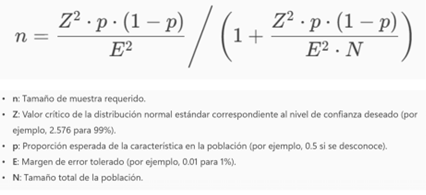

Aplicando la formula para determinar tamaño de muestra, para un nivel de confianza del 99% y margen de error del 1%, analizamos diferentes tamaños de p para calcular el tamaño de muestra:

In [ ]:
from scipy.stats import norm

# Parámetros
confidence_level = 0.99
margin_of_error = 0.01
proportions_p = [0,0.01,0.25, 0.50, 0.75, 0.99,1]

# Z-score para el nivel de confianza
z_score = norm.ppf((1 + confidence_level) / 2)
print(f"Z-score for {confidence_level*100}% confidence level: {z_score:.4f}")

# Calculamos el tamaño de la poblacion (Cantidad de filas de Df1)
N = len(df1)
print(f"Population size (N): {N:,}")

# Función para calcular tamaño de muestra con corrección para población finita
def calculate_sample_size(p, z, e, N):
    if p in [0, 1]:
        return 0
    numerator = (z**2) * p * (1 - p)
    denominator = e**2
    n0 = numerator / denominator
    n = n0 / (1 + ((n0 - 1) / N))
    return int(np.ceil(n))

# Calcular tamaños de muestra
results = [{'Proporción (p)': p, 'Tamaño de Muestra': f"{calculate_sample_size(p, z_score, margin_of_error, N):,}"} for p in proportions_p]

# Mostrar resultados
results_df = pd.DataFrame(results)
print("\nResultados del Cálculo del Tamaño de Muestra:")
print(results_df.to_string(index=False))

del confidence_level, margin_of_error, proportions_p, z_score, N, results, results_df

####6.2 Muestreo

Vamos a tomar dos muestras o sample: la primera con el numero exacto que nos dia en paso anterior y la segunda con numero significativamente mayor para comprar (ej: 50.000 filas).

In [ ]:
# Definimos 2 variables con el tamaño de las muestras a tomar
sample_size_1 = 16551
sample_size_2 = 50000
population_size = len(df1)

print(f"Population size: {population_size:,}")
print(f"Sample size 1: {sample_size_1:,}")
print(f"Sample size 2: {sample_size_2:,}")

####6.3 Test's estadisticos

* **Binarias:** usaremos prueba Fisher's exact test para asegurarse de tener suficiente representación de ambas clases.

* **Ciclicas y Continuas:** Aplicaremos T student para la media y Levene's Test para la desviacion.

* **Categoricas:** Aplicaremos chi cuadrado.

* **Alto % outliers:** Se podria utilizar test no parametricos como Mann-Whitney U. De todas formas, se decide simplificar y aplicar T student para la media y Leavene's Test para la desviacion.

####6.4 Pipeline Tests

In [ ]:
from scipy.stats import ttest_ind, levene, chi2_contingency, fisher_exact, mannwhitneyu
import warnings

# Suppress warnings that might clutter output (e.g., Chi-squared warnings with small expected counts)
warnings.filterwarnings("ignore")

# Define variable categories based on user requirements
binary_vars = ['CANCELLED', 'DIVERTED']

# Combine cyclical, continuous, and outlier variables for T-test (Mean) and Levene's test (Scale)
continuous_like_vars = [
    'CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'CRS_ARR_TIME', 'ARR_TIME', 'WHEELS_ON',
    'FL_NUMBER', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
    'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
    'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
]

categorical_vars_chi2 = ['AIRLINE', 'AIRLINE_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
                         'CANCELLATION_CODE', 'IATA_CODE', 'ORIGIN_STATE', 'MONTH', 'SEASON', 'TIPO_DEMORA']

date_vars = ['FL_DATE']


# --- Data Transformation Functions (Only ordinal transformation for date) ---

# Convert date Series to ordinal
def get_date_ordinal(series):
     if pd.api.types.is_datetime64_any_dtype(series):
          return series.apply(lambda x: x.toordinal() if pd.notnull(x) else np.nan)
     return pd.Series(dtype=float) # Return empty Series if not datetime


# --- Test Functions ---

# Function to perform T-test for mean comparison (Welch's t-test)
def perform_ttest(pop_data, sample_data):
    if len(sample_data) > 1 and len(pop_data) > 1:
        # Use Welch's t-test (equal_var=False) as it doesn't assume equal variances
        t_stat, p_value = ttest_ind(sample_data.dropna(), pop_data.dropna(), equal_var=False)
        return t_stat, p_value
    return np.nan, np.nan

# Function to perform Levene's test for scale comparison (variance)
def perform_levene_test(pop_data, sample_data):
     # Levene's test requires non-null data
     pop_data_clean = pop_data.dropna()
     sample_data_clean = sample_data.dropna()

     # Levene's test requires at least two data points in each group
     if len(sample_data_clean) > 1 and len(pop_data_clean) > 1:
         try:
              levene_stat, p_value = levene(sample_data_clean, pop_data_clean)
              return levene_stat, p_value
         except ValueError:
              # Levene can fail if one group has zero variance
              return np.nan, np.nan
     return np.nan, np.nan


# Function to perform Fisher's Exact Test for binary variables
def perform_fisher_exact_test(pop_data, sample_data):
    # Fisher's Exact Test requires non-null data and typically a 2x2 table
    pop_binary = pop_data.dropna()
    sample_binary = sample_data.dropna()

    # Check if both datasets have data and at most 2 unique values
    if len(pop_binary) > 0 and len(sample_binary) > 0 and pop_binary.nunique() <= 2 and sample_binary.nunique() <= 2:
        # Ensure counts are for the same two categories if they exist across both datasets
        all_vals = pd.concat([pop_binary, sample_binary]).unique()
        if len(all_vals) <= 2:
            pop_counts_binary = pop_binary.value_counts().reindex(all_vals, fill_value=0)
            sample_counts_binary = sample_binary.value_counts().reindex(all_vals, fill_value=0)

            contingency = pd.DataFrame({
                'Population': pop_counts_binary,
                'Sample': sample_counts_binary
            }).T

            # Ensure it's a 2x2 table for Fisher's exact test
            if contingency.shape == (2, 2):
                try:
                    odds_ratio, p = fisher_exact(contingency)
                    return odds_ratio, p # Fisher's returns odds ratio and p-value
                except Exception:
                    return np.nan, np.nan # Test failed
            else:
                 # Not a 2x2 table
                 return np.nan, np.nan
        else:
             # More than 2 unique values after dropping NaNs
             return np.nan, np.nan
    else:
         # Not enough data or not binary-like
         return np.nan, np.nan


# Function to perform Chi-squared test for distribution comparison
def perform_chi2_test(pop_data, sample_data):
    # Chi-squared test requires non-null data
    pop_counts = pop_data.value_counts(dropna=False) # Include NaN counts
    sample_counts = sample_data.value_counts(dropna=False) # Include NaN counts

    # Prepare contingency table
    all_categories = pop_counts.index.union(sample_counts.index)
    contingency_table = pd.DataFrame({
        'Population': pop_counts.reindex(all_categories, fill_value=0),
        'Sample': sample_counts.reindex(all_categories, fill_value=0)
    }).T # Transpose to have datasets as rows

    # Remove categories where total count across both datasets is 0
    contingency_table = contingency_table.loc[:, contingency_table.sum(axis=0) > 0]

    # Perform chi-squared test if the table is valid (at least 2x2, sum of counts > 0)
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1 and contingency_table.values.sum() > 0:
        try:
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
            return chi2_stat, p_value
        except ValueError:
            # Chi-squared can fail with very small expected frequencies
            return np.nan, np.nan
        except IndexError:
             # Table might collapse to 1xN or Nx1
             return np.nan, np.nan
    else:
        # Not a valid table for chi-squared test
        return np.nan, np.nan


def sampling_and_testing_pipeline(population_df, sample_size):
    print(f"--- Starting Pipeline with sample size: {sample_size:,} ---")

    # 1) Generate Sample
    if sample_size > len(population_df):
        print(f"Error: Sample size ({sample_size:,}) exceeds population size ({len(population_df):,}).")
        return None, None, None # Return None if sample size is invalid

    print("\nGenerating sample...")
    sample_df = population_df.sample(n=sample_size, random_state=42)
    print("Sample generated.")

    # 2) Compare Descriptive Statistics

    # Numerical variables
    print("\nComparing numerical descriptive statistics...")
    numeric_cols = population_df.select_dtypes(include=np.number).columns
    numeric_summary_rows = []
    for col in numeric_cols:
         # Ensure column exists in both sample and population
         if col in sample_df.columns:
            for label, data in [('Original', population_df), ('Sample', sample_df)]:
                desc = data[col].describe()
                numeric_summary_rows.append([
                    f"{col} {label}",
                    desc.get('count', np.nan),
                    desc.get('mean', np.nan),
                    desc.get('std', np.nan),
                    desc.get('min', np.nan),
                    desc.get('25%', np.nan),
                    desc.get('50%', np.nan),
                    desc.get('75%', np.nan),
                    desc.get('max', np.nan)
                ])
            numeric_summary_rows.append([""] * 9) # Separator row
         else:
              print(f"Warning: Numerical column '{col}' not found in sample, skipping descriptive stats comparison.")

    numeric_summary_df = pd.DataFrame(numeric_summary_rows, columns=[
        'Variable', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
    ])
    # Formatear los valores numéricos for display
    def format_value_num(x):
        if isinstance(x, (int, float)) and not pd.isnull(x):
            return f"{x:,.2f}"
        return x
    numeric_summary_df_formatted = numeric_summary_df.applymap(format_value_num)

    print("\nNumerical Descriptive Statistics Comparison:")
    print(numeric_summary_df_formatted.to_string(index=False))


    # Categorical variables
    print("\nComparing categorical descriptive statistics...")
    # Include object and category dtypes
    categorical_cols = population_df.select_dtypes(include=['object', 'category']).columns
    categorical_summary_rows = []
    for col in categorical_cols:
         # Ensure column exists in both sample and population
         if col in sample_df.columns:
            for label, data in [('Original', population_df), ('Sample', sample_df)]:
                desc = data[col].describe()
                categorical_summary_rows.append([
                    f"{col} {label}",
                    desc.get('count', ''),
                    desc.get('unique', ''),
                    desc.get('top', ''),
                    desc.get('freq', '')
                ])
            categorical_summary_rows.append([''] * 5) # Separator row
         else:
              print(f"Warning: Categorical column '{col}' not found in sample, skipping descriptive stats comparison.")

    categorical_summary_df = pd.DataFrame(categorical_summary_rows, columns=['Variable', 'Count', 'Unique', 'Top', 'Freq'])

    print("\nCategorical Descriptive Statistics Comparison:")
    print(categorical_summary_df.to_string(index=False))


    # 3) Perform Statistical Tests
    print("\nPerforming statistical tests...")
    test_results = []

    # Collect all columns we plan to test on to iterate efficiently
    all_tested_cols = set(binary_vars + continuous_like_vars + categorical_vars_chi2 + date_vars)

    for col in all_tested_cols:

        # Skip if the original column doesn't exist in the population or sample
        if col not in population_df.columns or col not in sample_df.columns:
             if col in population_df.columns: # Only warn if it's in the population but not sample
                print(f"Warning: Column '{col}' not found in sample, skipping tests.")
             continue


        pop_data = population_df[col]
        sample_data = sample_df[col]

        # Determine which tests to run based on the column's category and the user's new rules
        tests_to_run = []

        if col in binary_vars:
            tests_to_run.append(("Fisher's Exact Test", (pop_data, sample_data))) # No transformation needed

        elif col in continuous_like_vars:
            # Test on original numerical variable
            if pd.api.types.is_numeric_dtype(pop_data) and pd.api.types.is_numeric_dtype(sample_data):
                 tests_to_run.append(("T-test (Mean)", (pop_data, sample_data))) # T-test for mean of original
                 tests_to_run.append(("Levene's test (Scale)", (pop_data, sample_data))) # Levene's test for scale of original
            else:
                 print(f"Warning: Continuous-like variable '{col}' is not numeric, skipping t-test and levene.")

        elif col in categorical_vars_chi2:
            tests_to_run.append(("Chi-squared (Distribution)", (pop_data, sample_data))) # Test on original categorical data

        elif col in date_vars:
            # Get ordinal transformed data on the fly for testing
            pop_ord = get_date_ordinal(pop_data)
            sample_ord = get_date_ordinal(sample_data)

            if not pop_ord.empty and not sample_ord.empty: # Check if transformation was successful and data exists
                 tests_to_run.append(("T-test (Ordinal Date)", (pop_ord, sample_ord))) # T-test for mean of ordinal
                 tests_to_run.append(("Levene's test (Ordinal Date)", (pop_ord, sample_ord))) # Levene's test for scale of ordinal
            elif col in population_df.columns: # Warn only if original column exists
                 print(f"Warning: Ordinal transformation failed or no data for '{col}', skipping date tests.")


        # Execute the determined tests
        for test_type, data_tuple in tests_to_run:

            current_pop_data, current_sample_data = data_tuple

            # Determine variable tested name based on the test type
            if 'Ordinal Date' in test_type:
                variable_tested_name = col + '_ORD'
            else:
                variable_tested_name = col # Use original col name

            # Perform the test and get statistic and p-value
            if "Fisher's Exact Test" in test_type:
                stat, p = perform_fisher_exact_test(current_pop_data, current_sample_data)
                statistic_name = 'Odds Ratio'

            elif "Levene's test" in test_type:
                 stat, p = perform_levene_test(current_pop_data, current_sample_data)
                 statistic_name = 'Levene-statistic'

            elif "T-test" in test_type:
                 stat, p = perform_ttest(current_pop_data, current_sample_data)
                 statistic_name = 'T-statistic'

            elif "Chi-squared" in test_type:
                 stat, p = perform_chi2_test(current_pop_data, current_sample_data)
                 statistic_name = 'Chi2-statistic'

            else:
                continue # Skip unknown test types


            # Append results if valid statistics were returned
            if pd.notnull(stat) or pd.notnull(p): # Add if statistic or p-value is not NaN
                test_results.append({
                    'Original Variable': col, # Keep original column name for reference
                    'Variable Tested': variable_tested_name, # Use transformed name if applicable
                    'Test Type': test_type,
                    'Statistic_Name': statistic_name,
                    'Statistic': stat,
                    'P-value': p,
                    'Significant (p<0.05)': p < 0.05 if pd.notnull(p) else False
                })


    # Convert results to DataFrame
    test_results_df = pd.DataFrame(test_results)

    # Sort for better readability (by original variable first, then test type)
    test_results_df = test_results_df.sort_values(by=['Original Variable', 'Test Type']).reset_index(drop=True)


    # Format the 'Statistic' column for printing
    def format_statistic_output(row):
        if pd.isnull(row['Statistic']):
            return ''
        # Use scientific notation for large statistics or fixed decimal for others
        if row['Test Type'].startswith('Chi-squared') or row['Test Type'].startswith('Levene'):
             return f"{row['Statistic']:.4f}"
        else:
            return f"{row['Statistic']:.4f}"

    test_results_df['Statistic_Formatted'] = test_results_df.apply(format_statistic_output, axis=1)


    print("\n--- Summary of Statistical Test Results (Sample vs Population) ---")
    # Print with aligned header and spacing between variables
    print(f"{'Original Variable':<20} {'Variable Tested':<25} {'Test Type':<25} {'Statistic Name':<15} {'Statistic Value':>20} {'P-value':>10} {'Significant (p<0.05)':>22}")
    print("-" * 160)

    last_orig_var = None
    for _, row in test_results_df.iterrows():
        if row['Original Variable'] != last_orig_var:
            print() # Add space between original variables
            last_orig_var = row['Original Variable']

        # Use the formatted statistic value for printing
        print(f"{row['Original Variable']:<20} {row['Variable Tested']:<25} {row['Test Type']:<25} {row['Statistic_Name']:<15} {str(row['Statistic_Formatted']):>20} {row['P-value']:>10.4f} {str(row['Significant (p<0.05)']):>22}")

    print("-" * 160)


    # 4) Visualize Test Results
    print("\nVisualizing test results...")
    # Prepare data for plotting
    test_results_df_plot = test_results_df.copy()
    test_results_df_plot['Significance_Status'] = test_results_df_plot['Significant (p<0.05)'].map({
        True: 'Significant (p<0.05)',
        False: 'Not Significant (p>=0.05)'
    })

    # Agrupar y contar for stacked bar chart
    stacked_bar_data = test_results_df_plot.groupby(['Test Type', 'Significance_Status']).size().reset_index(name='Count')

    # Gráfico de barras
    plt.figure(figsize=(10, 5))
    bar_plot = sns.barplot(
        x='Test Type',
        y='Count',
        hue='Significance_Status',
        data=stacked_bar_data,
        palette={'Significant (p<0.05)': 'skyblue', 'Not Significant (p>=0.05)': 'salmon'},
        errorbar=None # Do not show error bars
    )

    # Add counts on top of bars
    for container in bar_plot.containers:
        bar_plot.bar_label(container, label_type='edge', fontsize=9)

    plt.title('Cantidad de Resultados Significativos por Tipo de Prueba', fontsize=14)
    plt.xlabel('Tipo de Prueba', fontsize=12)
    plt.ylabel('Cantidad de Tests', fontsize=12)
    plt.xticks(rotation=90, ha='right', fontsize=9)
    plt.legend(title='Resultado')
    plt.tight_layout()
    plt.show()

    # Espacio visual antes del gráfico de torta
    print("\n" + "-"*120 + "\n")

    # Gráfico de torta for overall significance
    significance_counts = test_results_df_plot['Significance_Status'].value_counts().reindex(
        ['Significant (p<0.05)', 'Not Significant (p>=0.05)'], fill_value=0)

    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        significance_counts,
        autopct='%1.1f%%',
        startangle=140,
        colors=['skyblue', 'salmon']
    )
    plt.title(f'Porcentaje de Resultados Significativos (Sample Size: {sample_size:,})', fontsize=12)
    plt.legend(wedges, significance_counts.index, title="Resultado", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    # Resumen de cantidad de tests por muestra
    print("\nResumen de tests realizados:\n")
    total = significance_counts.sum()
    not_significant = significance_counts['Not Significant (p>=0.05)']
    significant = significance_counts['Significant (p<0.05)']
    print(f"Sample Size: {sample_size:,}")
    print(f"  Total de tests: {total}")
    print(f"  No Significativos: {not_significant}")
    print(f"  Significativos: {significant}\n")



    print(f"\n--- Pipeline completed for sample size: {sample_size:,} ---")

    return test_results_df, numeric_summary_df, categorical_summary_df

ALTERNATIVA

#### 6.5 Llamado a pipeline con Sample1

In [ ]:
# Llamamos al pipeline con tamaño de muestra 1 (16551)
test_results, numeric_summary, categorical_summary = sampling_and_testing_pipeline(df1,sample_size_1 )

#### 6.5 Llamado a pipeline con Sample2

In [ ]:
# Llamamos al pipeline con tamaño de muestra 2 (50000)
test_results, numeric_summary, categorical_summary = sampling_and_testing_pipeline(df1,sample_size_2 )

#### 6.6 Calculo de muestra (para que todos los test's den representativos):

Una de las alternativas para ajustar los tests y que todas las variables de la muestra sean representativas de la poblacion es aumentar el tamaño de la muestra.

Para ello, calcularemos el tamaño n de la muestra para que todos los test's den OK.

A continuacion se expone dicho codigo:

In [ ]:
from scipy.stats import ttest_ind, levene, chi2_contingency, fisher_exact, mannwhitneyu
import warnings

# Suppress warnings that might clutter output
warnings.filterwarnings("ignore")

# Define variable categories based on user requirements
binary_vars = ['CANCELLED', 'DIVERTED']

# Combine cyclical, continuous, and outlier variables for T-test (Mean) and Levene's test (Scale)
continuous_like_vars = [
    'CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'CRS_ARR_TIME', 'ARR_TIME', 'WHEELS_ON',
    'FL_NUMBER', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
    'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
    'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
]

categorical_vars_chi2 = ['AIRLINE', 'AIRLINE_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
                         'CANCELLATION_CODE', 'IATA_CODE', 'ORIGIN_STATE']

date_vars = ['FL_DATE']

# --- Data Transformation Functions (Only ordinal transformation for date) ---

# Convert date Series to ordinal
def get_date_ordinal(series):
     if pd.api.types.is_datetime64_any_dtype(series):
          return series.apply(lambda x: x.toordinal() if pd.notnull(x) else np.nan)
     return pd.Series(dtype=float) # Return empty Series if not datetime


# --- Test Functions ---

# Function to perform T-test for mean comparison (Welch's t-test)
def perform_ttest(pop_data, sample_data):
    if len(sample_data) > 1 and len(pop_data) > 1:
        t_stat, p_value = ttest_ind(sample_data.dropna(), pop_data.dropna(), equal_var=False)
        return p_value
    return np.nan

# Function to perform Levene's test for scale comparison (variance)
def perform_levene_test(pop_data, sample_data):
     pop_data_clean = pop_data.dropna()
     sample_data_clean = sample_data.dropna()
     if len(sample_data_clean) > 1 and len(pop_data_clean) > 1:
         try:
              levene_stat, p_value = levene(sample_data_clean, pop_data_clean)
              return p_value
         except ValueError:
              return np.nan
     return np.nan

# Function to perform Fisher's Exact Test for binary variables
def perform_fisher_exact_test(pop_data, sample_data):
    pop_binary = pop_data.dropna()
    sample_binary = sample_data.dropna()
    if len(pop_binary) > 0 and len(sample_binary) > 0 and pop_binary.nunique() <= 2 and sample_binary.nunique() <= 2:
        all_vals = pd.concat([pop_binary, sample_binary]).unique()
        if len(all_vals) <= 2:
            pop_counts_binary = pop_binary.value_counts().reindex(all_vals, fill_value=0)
            sample_counts_binary = sample_binary.value_counts().reindex(all_vals, fill_value=0)
            contingency = pd.DataFrame({
                'Population': pop_counts_binary,
                'Sample': sample_counts_binary
            }).T
            if contingency.shape == (2, 2):
                try:
                    _, p = fisher_exact(contingency)
                    return p
                except Exception:
                    return np.nan
            else:
                 return np.nan
        else:
             return np.nan
    else:
         return np.nan

# Function to perform Chi-squared test for distribution comparison
def perform_chi2_test(pop_data, sample_data):
    pop_counts = pop_data.value_counts(dropna=False) # Include NaN counts
    sample_counts = sample_data.value_counts(dropna=False) # Include NaN counts
    all_categories = pop_counts.index.union(sample_counts.index)
    contingency_table = pd.DataFrame({
        'Population': pop_counts.reindex(all_categories, fill_value=0),
        'Sample': sample_counts.reindex(all_categories, fill_value=0)
    }).T
    contingency_table = contingency_table.loc[:, contingency_table.sum(axis=0) > 0]

    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1 and contingency_table.values.sum() > 0:
        try:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            return p_value
        except ValueError:
            return np.nan
        except IndexError:
             return np.nan
    else:
        return np.nan

# Function to run all relevant tests for a given sample and return True if all p-values >= 0.05
def check_sample_representativeness(sample, population):
    p_values = []

    # Iterate through all relevant columns and apply appropriate tests
    all_tested_cols = set(binary_vars + continuous_like_vars + categorical_vars_chi2 + date_vars)

    for col in all_tested_cols:
        if col not in population.columns or col not in sample.columns:
            continue # Skip if column is missing in either population or sample

        pop_data = population[col]
        sample_data = sample[col]

        if col in binary_vars:
            p = perform_fisher_exact_test(pop_data, sample_data)
            if pd.notnull(p): p_values.append(p)

        elif col in continuous_like_vars:
            if pd.api.types.is_numeric_dtype(pop_data) and pd.api.types.is_numeric_dtype(sample_data):
                p_ttest = perform_ttest(pop_data, sample_data)
                if pd.notnull(p_ttest): p_values.append(p_ttest)
                p_levene = perform_levene_test(pop_data, sample_data)
                if pd.notnull(p_levene): p_values.append(p_levene)
            else:
                 print(f"Warning: Continuous-like variable '{col}' is not numeric, skipping t-test and levene for this sample.")

        elif col in categorical_vars_chi2:
            p = perform_chi2_test(pop_data, sample_data)
            if pd.notnull(p): p_values.append(p)

        elif col in date_vars:
            # Get ordinal transformed data on the fly for testing
            pop_ord = get_date_ordinal(pop_data)
            sample_ord = get_date_ordinal(sample_data)

            if not pop_ord.empty and not sample_ord.empty: # Check if transformation was successful and data exists
                 p_ttest = perform_ttest(pop_ord, sample_ord)
                 if pd.notnull(p_ttest): p_values.append(p_ttest)
                 p_levene = perform_levene_test(pop_ord, sample_ord)
                 if pd.notnull(p_levene): p_values.append(p_levene)
            elif col in population.columns: # Warn only if original column exists
                 print(f"Warning: Ordinal transformation failed or no data for '{col}', skipping date tests for this sample.")


    # Check if all collected p-values are >= 0.05
    # Also check if any tests were performed (p_values list is not empty)
    if p_values:
        all_tests_not_significant = all(p >= 0.05 for p in p_values)
        return all_tests_not_significant
    else:
        # If no tests could be performed, maybe consider it not representative or handle as an error
        print("Warning: No statistical tests could be performed for this sample size.")
        return False # Assume not representative if no tests ran

# --- Main loop to find sample size ---
population_size = len(df1)
start_size = 60000
step = 10000
max_size = 450000
found_representative_size = None

print(f"Starting search for representative sample size from {start_size:,} up to {max_size:,}...")

current_size = start_size
while current_size <= max_size:
    print(f"\nTesting sample size: {current_size:,}")

    if current_size > population_size:
        print(f"Sample size {current_size:,} exceeds population size {population_size:,}. Stopping.")
        break

    # Take a random sample
    sample3 = df1.sample(n=current_size, random_state=42)

    # Check if this sample is representative
    if check_sample_representativeness(sample3, df1):
        print(f"\nFound representative sample size: {current_size:,}")
        found_representative_size = current_size
        break # Stop the loop if a representative size is found
    else:
        print(f"Sample size {current_size:,} is not representative (at least one test is significant).")

    current_size += step

if found_representative_size is None:
    print(f"\nCould not find a representative sample size between {start_size:,} and {max_size:,}.")

####6.6 Llamado a pipeline con Sample3

In [ ]:
# Dado que correr el codigo anterior definido en 6.5 lleva alrededor de 15 minutos, no corremos esta instancia
# Cada vez que corremos el notebook. En ese caso, ya sabemos por codigo anterior el tamaño de muestra minimo que
# Asegura todos los test's propuestos dan ok es 320.000 filas.

current_size = 320000
sample3 = df1.sample(n=current_size, random_state=42)

In [ ]:
# Llamamos al pipeline con tamaño de muestra 3 (320000)
test_results, numeric_summary, categorical_summary = sampling_and_testing_pipeline(df1,current_size )

## **7- MODELOS DE REGRESION (TARGET: ARR_DELAY)**

Se propone a continuacion aplicar 3 metodos de regresion para predecir la variable ARR_DELAY: Regresion Multiple, Regrsion Bridge y Random Forest Regression.

Previamente, se realizara encoding, scaling y reduccion de dimensionalidad.

####7.1 Encoding

A continuacion, se aplica encoding del sample3 tomando las siguientes definiciones:

- Variables categoricas de baja cardinalidad: One hot encoding
- Varialbes categoricas de alta cardinalidad: Target encoding (media)

Nota: Se define baja cardinalidad como menor o igual a 5 elementos en el conjunto de la variable en particular. Aquellas que tienen mayor a 5 seran consideradas de alta cardinalidad.

Esto puede modificarse, pero se toma ese valor para evitar generar nuevas columnas en exceso y que ello lleve a un costo elevado en procesamiento posterior.

In [ ]:
# Identificar variables categóricas
cat_cols = sample3.select_dtypes(include=["object", "category"]).columns.tolist()

# Calcular cardinalidad
card = sample3[cat_cols].nunique()

# Separar por cardinalidad
high_card = [col for col in cat_cols if card[col] > 5]
low_card = [col for col in cat_cols if card[col] <= 5]

# Copia para codificación
sample3_mod = sample3.copy()

# Target Encoding para alta cardinalidad
target = "ARR_DELAY"
if target in sample3_mod.columns and pd.api.types.is_numeric_dtype(sample3_mod[target]):
    for col in high_card:
        sample3_mod[col + "_enc"] = sample3_mod.groupby(col)[target].transform("mean")

# One-Hot Encoding para baja cardinalidad
sample3_mod = pd.get_dummies(sample3_mod, columns=low_card, drop_first=False)

# Columnas numéricas originales
num_cols = sample3.select_dtypes(include=np.number).columns.tolist()

# Nuevas columnas codificadas
new_cols = [col for col in sample3_mod.columns if col not in sample3.columns or col.endswith("_enc")]

# Crear DataFrame final
cols_final = [col for col in num_cols + new_cols if col in sample3_mod.columns]
sample3_encoded = sample3_mod[cols_final].copy()

low_card = [col for col in cat_cols if card[col] <= 5]
print("Las siguientes variables seran codificadas con la metodologia One Hot Encoding por tener")
print("una cardinalidad menor o igual a 5:", low_card)
print("\n")
print("Las siguientes variables seran codificadas con la metodologia Target Encoding por tener")
print("una cardinalidad menor o igual a 5:", high_card)

# Mostrar resumen
print("\n\nSample 3 Codificado")
sample3_encoded.describe()

####7.2 Scaling

A continuacion, se aplica escalado del dataset para evitar errores por distancias (el dataframe tiene distancias y tiempos, lo cual puede llevarnos a errores en modelos posteriores).

Dicho ello, calcularemos la cantidad de outliers, la Kurtosis y asimetria de cada variable. Segun estos valores, se van a escalar con los siguientes metodos:

**RobustScaler:** para variables con muchos outliers o alta asimetría/kurtosis.

**MinMaxScaler:** para variables con rangos amplios pero sin outliers.

**StandardScaler:** para variables con distribución aproximadamente normal y sin valores extremos.

In [ ]:
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


# Seleccionar columnas numéricas
numeric_cols = sample3_encoded.select_dtypes(include=[np.number]).columns

# Función para contar outliers usando el método IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Crear tabla resumen
summary = []
for col in numeric_cols:
    data = sample3_encoded[col].dropna()
    sk = skew(data)
    ku = kurtosis(data)
    outliers = count_outliers(data)

# Selección del método de escalado
    if outliers > 1000 or abs(sk) > 1 or ku > 3: #Si la cantidad de outliers es excesiva y el grado de asimetria
        method = "RobustScaler"
    elif abs(sk) < 0.5 and abs(ku) < 1:
        method = "StandardScaler"
    else:
        method = "MinMaxScaler"

    summary.append({
        "Variable": col,
        "Skewness": round(sk, 2),
        "Kurtosis": round(ku, 2),
        "Outliers": outliers,
        "Método recomendado": method
    })

# Convertir a DataFrame
summaryTable = pd.DataFrame(summary)
print(summaryTable)

# Crear un nuevo DataFrame para almacenar las variables escaladas
scaled_sample3 = pd.DataFrame(index=sample3_encoded.index)

# Aplicar el método de escalado correspondiente a cada variable
for _, row in summaryTable.iterrows():
    col = row["Variable"]
    method = row["Método recomendado"]
    data = sample3_encoded[[col]].copy()

    if method == "MinMaxScaler":
        scaler = MinMaxScaler()
    elif method == "StandardScaler":
        scaler = StandardScaler()
    elif method == "RobustScaler":
        scaler = RobustScaler()
    else:
        continue

    scaled_sample3[col] = scaler.fit_transform(data)

# Mostrar las primeras filas del DataFrame escalado
print("\nDescribe de Sample3 Escalado")
scaled_sample3.describe()

#### 7.3 Reduccion de dimensionalidad

##### 7.3.1 Feature Selection

Se propone aplicar metodo de seleccion de variables con los siguientes metodos, recordando la variable Target es ARR_DELAY:

**Correlación** mide solo relaciones lineales y no considera interacciones entre variables.

**SelectKBest** evalúa cada variable de forma individual, sin tener en cuenta combinaciones.

**Random Forest** considera interacciones y no linealidades, por eso puede dar más peso a una sola variable dominante (Ej: DEP_DELAY).

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# Convert FL_DATE to float timestamp if it exists
if 'FL_DATE' in scaled_sample3.columns:
    scaled_sample3['FL_DATE'] = pd.to_datetime(scaled_sample3['FL_DATE'], errors='coerce')
    scaled_sample3['FL_DATE'] = scaled_sample3['FL_DATE'].astype(np.int64) / 1e9  # Convertir a segundos

# Replace NaNs with zero
scaled_sample3.fillna(0, inplace=True)

# Separate features and target
X = scaled_sample3.drop(columns=["ARR_DELAY"])
y = scaled_sample3["ARR_DELAY"]

# 1. Correlation with ARR_DELAY
correlations = scaled_sample3.corr(numeric_only=True)["ARR_DELAY"].drop("ARR_DELAY", errors='ignore').sort_values(ascending=False)
print("Top 10 correlated variables with ARR_DELAY:")
print(correlations.head(10), "\n")

# 2. SelectKBest
selector = SelectKBest(score_func=f_regression, k=min(10, X.shape[1]))
selector.fit(X, y)
selected_kbest = X.columns[selector.get_support()]
print("Top 10 variables selected by SelectKBest:")
print(selected_kbest.tolist(), "\n")

# 3. Random Forest feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 variables by Random Forest importance:")
print(importances.head(10))

##### 7.3.2 PCA (DF original, winsorized y bounded (IQR))

A continuacion, dada la alta colinealidad entre variables, se aplica PCA como metodo de reduccion de variables. Se propone calcular PCA original (sin eliminar outliers ni "suavizar" mediante metodo Winsorized), suavizado y sin outliers.

In [ ]:
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize

# Convert FL_DATE to float timestamp if it exists
if 'FL_DATE' in scaled_sample3.columns:
    scaled_sample3['FL_DATE'] = pd.to_datetime(scaled_sample3['FL_DATE'], errors='coerce')
    scaled_sample3['FL_DATE'] = scaled_sample3['FL_DATE'].astype(np.int64) / 1e9  # Convertir a segundos

# Replace NaNs with zero
scaled_sample3.fillna(0, inplace=True)

# Separar variable objetivo
target_col = "ARR_DELAY"
X_base = scaled_sample3.drop(columns=[target_col])
y_target = scaled_sample3[target_col]

# Determinar número óptimo de componentes PCA
pca_full = PCA()
pca_full.fit(X_base)
explained_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)
optimal_n = np.argmax(explained_variance_ratio >= 0.99) + 1
print("Nro óptimo de componentes de PCA para capturar una varianza del 99%:", optimal_n)

# Función para aplicar PCA y devolver el DataFrame
def apply_pca_and_report(X, label):
    pca = PCA(n_components=optimal_n)
    X_pca = pca.fit_transform(X)
    pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(optimal_n)])
    pca_df[target_col] = y_target.values

    print(f"\nPCA aplicado sobre: {label}")
    print("Primeras filas del resultado PCA:")
    print(pca_df.head())

    # Mostrar las 5 variables más influyentes por componente
    loadings = pd.DataFrame(pca.components_.T, columns=pca_df.columns[:-1], index=X.columns)
    print("\nVariables más influyentes por componente:")
    for pc in loadings.columns:
        top_vars = loadings[pc].abs().sort_values(ascending=False).head(5)
        print(f"{pc}: {', '.join(top_vars.index)}")

    return pca_df

# 1. PCA original
PCA_base = apply_pca_and_report(X_base, "Datos originales")

# 2. PCA con outliers reemplazados por límites IQR
X_iqr = X_base.copy()
for col in X_iqr.columns:
    q1 = X_iqr[col].quantile(0.25)
    q3 = X_iqr[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    X_iqr[col] = np.where(X_iqr[col] < lower, lower, X_iqr[col])
    X_iqr[col] = np.where(X_iqr[col] > upper, upper, X_iqr[col])
PCA_No_Outliers = apply_pca_and_report(X_iqr, "Datos con outliers reemplazados por límites IQR")

# 3. PCA con datos winsorizados
X_win = X_base.copy()
for col in X_win.columns:
    if X_win[col].std() > 1e-9:
        X_win[col] = winsorize(X_win[col], limits=[0.01, 0.01])
PCA_Winsorised = apply_pca_and_report(X_win, "Datos winsorizados (1% - 99%)")


##### 7.3.3 Conclusion reduccion de dimensionalidad

Se propone en adelante aplicar los 3 modelos de regresion utilizando los dataframes calculados con PCA.

Esto ultimo es debido al alto grado de correlacion y colinealidad entre las variables, siendo dos metodos seleccionados muy sensibles a ello (Regresion multiple y Bridge).

Siendo que PCA minimiza estos efectos, en adelante se utilizan estos Df.

#### 7.4 Regresion lineal multiple (OLS)

##### 7.4.1 Pipeline regresion lineal multiple (OLS)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import MAE
import statsmodels.api as sm # Import statsmodels for detailed OLS results
from statsmodels.stats.stattools import durbin_watson # Import Durbin-Watson

def perform_ols_regression(df, target_column):
    df_cleaned = df.dropna().copy()

    if target_column not in df_cleaned.columns:
        print(f"Error: '{target_column}' no está en el DataFrame.")
        return [None] * 6

    # Selección de variables numéricas
    numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.drop(target_column, errors='ignore')
    if numeric_cols.empty:
        print("Error: No hay variables numéricas para regresión.")
        return [None] * 6

    X = sm.add_constant(df_cleaned[numeric_cols])
    y = df_cleaned[target_column]

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    try:
        model = sm.OLS(y_train, X_train).fit()
        print("\nResumen OLS (statsmodels):")
        print(model.summary())
    except Exception as e:
        print(f"Error al ajustar el modelo OLS: {e}")
        return [None] * 6

    y_pred = model.predict(X_test)

    # Métricas
    performance_metrics = {
        "R²": r2_score(y_test, y_pred),
        "Adjusted R²": getattr(model, "rsquared_adj", np.nan),
        "F-statistic p-value": getattr(model, "f_pvalue", np.nan),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

    # Gráfico: Real vs Predicho
    fig_pred, ax_pred = plt.subplots(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, ax=ax_pred, label='Predictions')
    ax_pred.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
    ax_pred.set(xlabel="Valores reales", ylabel="Predicciones", title="Real vs Predicho")
    ax_pred.grid(True)
    ax_pred.legend()
    plt.tight_layout()

    # Gráfico: Residuos
    residuals = y_test - y_pred
    fig_resid, ax_resid = plt.subplots(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.3, ax=ax_resid)
    ax_resid.axhline(0, color='red', linestyle='--')
    ax_resid.set(xlabel="Predicciones", ylabel="Residuos", title="Residuos vs Predicciones")
    ax_resid.grid(True)
    plt.tight_layout()

    # Durbin-Watson
    try:
        dw_statistic = durbin_watson(residuals)
        print(f"\nDurbin-Watson: {dw_statistic:.4f}")
    except Exception as e:
        print(f"Error Durbin-Watson: {e}")

    # Mostrar métricas
    print("\nMétricas de rendimiento:")
    for k, v in performance_metrics.items():
        print(f"{k}: {v:.4f}" if pd.notnull(v) else f"{k}: N/A")

    # Show plots
    plt.show(fig_pred)
    plt.show(fig_resid)



    return performance_metrics, model


##### 7.4.2 Uso pipeline regresion lineal multiple (OLS)

In [ ]:
print("Running OLS Regression on the three PCA DataFrames...")

# Validación de existencia
required_dfs = {
    'Original PCA': PCA_base,
    'PCA without Outliers': PCA_No_Outliers,
    'PCA Winsorized': PCA_Winsorised
}

if not all(isinstance(df, pd.DataFrame) for df in required_dfs.values()):
    print("Error: Uno o más DataFrames PCA no están disponibles o no son válidos.")
elif 'perform_ols_regression' not in locals():
    print("Error: La función 'perform_ols_regression' no está definida.")
else:
    target_col = "ARR_DELAY"
    results = {}

    for label, df in required_dfs.items():
        if target_col in df.columns:
            print(f"\nRunning OLS Regression on {label}...")
            result = perform_ols_regression(df, target_col)
            if result and result[0] is not None:
                results[label] = result[0]  # Only store performance metrics
        else:
            print(f"Error: '{target_col}' no está en {label}. Se omite.")

#### 7.5 Regresion Ridge (Regularización L2)

##### 7.5.1 Pipeline de Regresion Ridge (Regularización L2)

In [ ]:
def perform_ridge_regression(df, target_column, alpha=1.0):
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import Ridge
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    import seaborn as sns
    import matplotlib.pyplot as plt

    df_cleaned = df.dropna().copy()

    if target_column not in df_cleaned.columns:
        print(f"Error: '{target_column}' no está en el DataFrame.")
        return [None] * 6

    numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.drop(target_column, errors='ignore')
    if numeric_cols.empty:
        print("Error: No hay variables numéricas para regresión.")
        return [None] * 6

    X = df_cleaned[numeric_cols]
    y = df_cleaned[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    try:
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        print(f"\nModelo Ridge ajustado con alpha={alpha}.")
    except Exception as e:
        print(f"Error al ajustar el modelo Ridge: {e}")
        return [None] * 6

    y_pred = model.predict(X_test)

    performance_metrics = {
        "R²": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

    def plot_scatter(x, y, xlabel, ylabel, title, ref_line=False):
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.scatterplot(x=x, y=y, alpha=0.3, ax=ax)
        ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
        if ref_line:
            min_val, max_val = min(x.min(), y.min()), max(x.max(), y.max())
            ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
            ax.legend()
        ax.grid(True)
        plt.tight_layout()
        return fig, ax

    fig_pred, ax_pred = plot_scatter(
        y_test, y_pred,
        xlabel="Valores reales",
        ylabel="Predicciones",
        title=f"Ridge Regression (alpha={alpha}): Valores reales vs Predichos",
        ref_line=True
    )

    residuals = y_test - y_pred
    fig_resid, ax_resid = plot_scatter(
        y_pred, residuals,
        xlabel="Valores Predichos",
        ylabel="Residuos (Real - Predicho)",
        title=f"Ridge Regression (alpha={alpha}): Análisis de Residuos"
    )
    ax_resid.axhline(0, color='red', linestyle='--')

    print("\nMétricas de rendimiento (Ridge):")
    for k, v in performance_metrics.items():
        print(f"{k}: {v:.4f}" if pd.notnull(v) else f"{k}: N/A")

    return performance_metrics, model, fig_pred, ax_pred, fig_resid, ax_resid,

##### 7.5.2 Uso de pipeline de Regresion Ridge (Regularización L2)

In [ ]:
# Lista de tuplas con nombre y DataFrame
datasets = [
    ("Original PCA", PCA_base),
    ("PCA sin outliers", PCA_No_Outliers),
    ("PCA winsorizado", PCA_Winsorised)
]

# Parámetros
target_col = "ARR_DELAY"
ridge_alpha = 1.0

# Ejecutar regresión Ridge para cada DataFrame
for label, df in datasets:
    print(f"\n--- {label} ---")
    result = perform_ridge_regression(df, target_col, alpha=ridge_alpha)
    if result and result[0] is not None:
        metrics, model, fig_pred, ax_pred, fig_resid, ax_resid = result

        # Mostrar gráficos
        plt.show(fig_pred)
        plt.show(fig_resid)


#### 7.6 Random Forest Regression

##### 7.6.1 Pipeline de Random Forest Regression

In [ ]:
def perform_random_forest_regression(df, target_column, n_estimators=100, random_state=42):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

    df_cleaned = df.dropna().copy()

    if target_column not in df_cleaned.columns:
        print(f"Error: '{target_column}' no está en el DataFrame.")
        return [None] * 6

    numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.drop(target_column, errors='ignore')
    if numeric_cols.empty:
        print("Error: No hay variables numéricas para regresión.")
        return [None] * 6

    X = df_cleaned[numeric_cols]
    y = df_cleaned[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    try:
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
        print(f"\nEntrenando modelo Random Forest con n_estimators={n_estimators}...")
        model.fit(X_train, y_train)
        print("Modelo entrenado correctamente.")
    except Exception as e:
        print(f"Error al entrenar el modelo: {e}")
        return [None] * 6

    y_pred = model.predict(X_test)

    performance_metrics = {
        "R²": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

    def plot_scatter(x, y, xlabel, ylabel, title, ref_line=False):
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.scatterplot(x=x, y=y, alpha=0.3, ax=ax)
        ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
        if ref_line:
            min_val, max_val = min(x.min(), y.min()), max(x.max(), y.max())
            ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
            ax.legend()
        ax.grid(True)
        plt.tight_layout()
        return fig, ax

    fig_pred, ax_pred = plot_scatter(
        y_test, y_pred,
        xlabel="Valores reales",
        ylabel="Predicciones",
        title=f"Random Forest (n_estimators={n_estimators}): Real vs Predicho",
        ref_line=True
    )

    residuals = y_test - y_pred
    fig_resid, ax_resid = plot_scatter(
        y_pred, residuals,
        xlabel="Predicciones",
        ylabel="Residuos (Real - Predicho)",
        title=f"Random Forest (n_estimators={n_estimators}): Residuos"
    )
    ax_resid.axhline(0, color='red', linestyle='--')

    print("\nMétricas de rendimiento (Random Forest):")
    for k, v in performance_metrics.items():
        print(f"{k}: {v:.4f}" if pd.notnull(v) else f"{k}: N/A")

    return performance_metrics, fig_pred, ax_pred, fig_resid, ax_resid, model

##### 7.6.2 Uso de pipeline de Random Forest Regression

In [ ]:
print("Running Random Forest Regression on different feature sets...")

target_col = "ARR_DELAY"
n_estimators_rf = 100
feature_sets = {}
rf_results = {}

# --- Helper: Agregar feature set si es válido ---
def add_feature_set(name, df):
    if isinstance(df, pd.DataFrame) and target_col in df.columns:
        df_clean = df.dropna()
        if not df_clean.empty:
            feature_sets[name] = df_clean
            print(f"Prepared DataFrame for {name}.")
        else:
            print(f"Warning: {name} is empty after dropping NaNs.")
    else:
        print(f"Warning: {name} is invalid or missing target column.")

# --- PCA DataFrames ---
pca_sources = {
    "Original PCA": PCA_base,
}
for name, df in pca_sources.items():
    add_feature_set(name, df)

# --- Entrenamiento de modelos ---
print("\nRunning Random Forest Regression pipeline on prepared feature sets...")

if 'perform_random_forest_regression' not in locals():
    print("Error: 'perform_random_forest_regression' function not found.")
else:
    for label, df in feature_sets.items():
        print(f"\n Running Random Forest Regression on {label}...")
        result = perform_random_forest_regression(df, target_col, n_estimators=n_estimators_rf)
        if result and result[0] is not None:
            rf_results[label] = {
                "metrics": result[0],
                "fig_pred": result[1],
                "ax_pred": result[2],
                "fig_resid": result[3],
                "ax_resid": result[4],
                "model": result[5]
            }
            plt.close(result[1])
            plt.close(result[3])

    # --- Mostrar gráficos ---
    print("\nDisplaying scatter plots of real vs. predicted values for each dataset:")
    for label, df in feature_sets.items():
        print(f"\n{label}:")
        perform_random_forest_regression(df, target_col, n_estimators=n_estimators_rf)
        plt.show()

Podria aplicar el resto de los modelos si quisiera agregando qui los Df (PCA_Winsorised o PCA_NO_OUTLIERS).

Se muestra a confinuacion un ejemplo, pero no se ejecuta por el tiempo que insume su ejecucion, siendo el resultado esperado inferior al de PCA_Base (por lo visto en modelos aplicados anteriormente).

In [ ]:
#EJEMPLO NO EJECUTABLE

# --- PCA DataFrames ---
#pca_sources = {
#    "Original PCA": PCA_base,
#    }

###7.7 Validacion Cruzada

##### 7.7.1 Pipeline validacion cruzada

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_validate
from scipy.stats import skew, kurtosis

def run_multiple_samples(df1, sample3, sample_size, num_runs, trained_model):
    print(f"\nNúmero de muestras a realizar: {num_runs}")

    sample_names = [f"sample{i+4}" for i in range(num_runs)]
    total_sample_size = sample_size * num_runs
    available_indices = df1.index.difference(sample3.index)

    if len(available_indices) < total_sample_size:
        print(f"Error: No hay suficientes filas disponibles ({len(available_indices):,}) en df1 para crear todas las muestras.")
        return

    all_sample_indices = np.random.choice(available_indices, size=total_sample_size, replace=False)
    sample_indices_list = np.array_split(all_sample_indices, num_runs)

    all_cv_results = {}
    pca_variances = []

    for i, indices in enumerate(sample_indices_list):
        current_sample_name = sample_names[i]
        current_sample_df = df1.loc[indices].copy()
        print(f"\n--- Procesando {current_sample_name} (tamaño: {len(current_sample_df):,}) ---")

        target = "ARR_DELAY"
        cat_cols = current_sample_df.select_dtypes(include=["object", "category"]).columns.tolist()
        card = current_sample_df[cat_cols].nunique()
        high_card = [col for col in cat_cols if card[col] > 5]
        low_card = [col for col in cat_cols if card[col] <= 5]

        df_mod = current_sample_df.copy()

        if target in df_mod.columns and pd.api.types.is_numeric_dtype(df_mod[target]):
            for col in high_card:
                df_mod[col + "_enc"] = df_mod.groupby(col)[target].transform("mean")

        df_mod = pd.get_dummies(df_mod, columns=low_card, drop_first=False)

        num_cols = [col for col in current_sample_df.select_dtypes(include=np.number).columns if col != target]
        new_cols = [col for col in df_mod.columns if col not in current_sample_df.columns or col.endswith("_enc")]
        cols_final = [col for col in num_cols + new_cols if col in df_mod.columns]
        encoded_df = df_mod[cols_final + [target]].copy()

        def count_outliers(series):
            if not np.issubdtype(series.dtype, np.number):
                return 0
            q1 = series.quantile(0.25)
            q3 = series.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            return ((series < lower) | (series > upper)).sum()

        summary = []
        for col in encoded_df.columns:
            if col == target:
                continue
            data = encoded_df[col].dropna()
            sk = skew(data)
            ku = kurtosis(data)
            outliers = count_outliers(data)

            if outliers > 1000 or abs(sk) > 1 or ku > 3:
                method = "RobustScaler"
            elif abs(sk) < 0.5 and abs(ku) < 1:
                method = "StandardScaler"
            else:
                method = "MinMaxScaler"

            summary.append((col, method))

        scaled_df = pd.DataFrame(index=encoded_df.index)
        for col, method in summary:
            data = encoded_df[[col]].copy()
            scaler = {"MinMaxScaler": MinMaxScaler(), "StandardScaler": StandardScaler(), "RobustScaler": RobustScaler()}[method]
            scaled_df[col] = scaler.fit_transform(data)

        scaled_df[target] = encoded_df[target]
        scaled_sample_clean = scaled_df.dropna().copy()

        if target not in scaled_sample_clean.columns:
            print(f"Error: No se encontró la columna objetivo '{target}'.")
            continue

        X_base = scaled_sample_clean.drop(columns=[target])
        y_target = scaled_sample_clean[target]

        if X_base.empty:
            print("Error: Los datos de características para PCA están vacíos.")
            continue

        try:
            pca_temp = PCA()
            pca_temp.fit(X_base)
            explained_variance_ratio = np.cumsum(pca_temp.explained_variance_ratio_)
            pca_variances.append(explained_variance_ratio)
            optimal_n = np.argmax(explained_variance_ratio >= 0.99) + 1 \
                if np.any(explained_variance_ratio >= 0.99) else X_base.shape[1]
            print(f"Componentes óptimos (≥ 99% varianza explicada): {optimal_n}")
        except Exception as e:
            print(f"Error al determinar componentes óptimos para PCA: {e}")
            continue

        try:
            pca = PCA(n_components=optimal_n)
            X_pca = pca.fit_transform(X_base)
            pca_sample_df = pd.DataFrame(X_pca, index=X_base.index)
            pca_sample_df[target] = y_target.values
        except Exception as e:
            print(f"Error en PCA: {e}")
            continue

        X_cv = pca_sample_df.drop(columns=[target])
        y_cv = pca_sample_df[target]

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        try:
            cv_results = cross_validate(
                trained_model, X_cv, y_cv, cv=kf,
                scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
                return_train_score=False, n_jobs=-1
            )

            mean_r2 = cv_results['test_r2'].mean()
            std_r2 = cv_results['test_r2'].std()
            mean_rmse = np.sqrt(-cv_results['test_neg_mean_squared_error'].mean())
            std_rmse = np.sqrt(-cv_results['test_neg_mean_squared_error'].std())
            mean_mae = -cv_results['test_neg_mean_absolute_error'].mean()
            std_mae = cv_results['test_neg_mean_absolute_error'].std()

            print(f"\nResultados de Validación Cruzada ({kf.get_n_splits()} folds) en {current_sample_name}:")
            print(f"  R² Promedio: {mean_r2:.4f} (+/- {std_r2:.4f})")
            print(f"  RMSE Promedio: {mean_rmse:.4f} (+/- {std_rmse:.4f})")
            print(f"  MAE Promedio: {mean_mae:.4f} (+/- {std_mae:.4f})")

            all_cv_results[current_sample_name] = {
                "Sample": current_sample_name,
                "Sample Size": len(current_sample_df),
                "R²_mean": mean_r2,
                "R²_std": std_r2,
                "RMSE_mean": mean_rmse,
                "RMSE_std": std_rmse,
                "MAE_mean": mean_mae,
                "MAE_std": std_mae
            }

        except Exception as e:
            print(f"Error durante la validación cruzada para {current_sample_name}: {e}")
            continue

    if all_cv_results:
        summary_df = pd.DataFrame(list(all_cv_results.values()))
        summary_df = summary_df[['Sample', 'Sample Size', 'R²_mean', 'R²_std', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std']]
        print("\n--- Resumen de Resultados de Validación Cruzada ---")
        print(summary_df.to_string(index=False))

        summary_df.plot(x='Sample', y='R²_mean', kind='bar', title='R² Mean Across Samples', legend=False)
        plt.ylabel('R² Mean')
        plt.tight_layout()
        plt.show()

        summary_df.plot(x='Sample', y='RMSE_mean', kind='bar', title='RMSE Mean Across Samples', color='salmon', legend=False)
        plt.ylabel('RMSE Mean')
        plt.tight_layout()
        plt.show()

        summary_df.plot(x='Sample', y='MAE_mean', kind='bar', title='MAE Mean Across Samples', color='lightgreen', legend=False)
        plt.ylabel('MAE Mean')
        plt.tight_layout()
        plt.show()

        if pca_variances:
            plt.plot(np.arange(1, len(pca_variances[-1]) + 1), pca_variances[-1], marker='o')
            plt.axhline(y=0.99, color='r', linestyle='--', label='99% Threshold')
            plt.title('Cumulative Explained Variance (Última muestra)')
            plt.xlabel('Número de Componentes')
            plt.ylabel('Varianza Acumulada')
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.show()
    else:
        print("No se recolectaron resultados de validación cruzada.")



##### 7.7.2 Uso de pipeline de validacion cruzada

In [ ]:
# Verificar existencia de variables y función
if 'df1' not in locals() or not isinstance(df1, pd.DataFrame):
    print(" Error: 'df1' DataFrame no encontrado.")
elif 'sample3' not in locals() or not isinstance(sample3, pd.DataFrame):
    print(" Error: 'sample3' DataFrame no encontrado. Asegurate de generarlo primero.")
elif 'run_multiple_samples' not in locals():
    print(" Error: Función 'run_multiple_samples' no encontrada. Ejecutá la celda donde se define.")
elif 'rf_results' not in locals() or 'Original PCA' not in rf_results or 'model' not in rf_results['Original PCA']:
    print(" Error: Modelo entrenado no encontrado en rf_results['Original PCA']['model'].")
else:
    # Parámetros
    sample_size = 50000
    num_runs = 7
    print(f"Ejecutando pipeline con tamaño de muestra: {sample_size:,} y {num_runs} repeticiones...")

    # Ejecutar pipeline
    cv_performance = run_multiple_samples(
        df1, scaled_sample3,
        sample_size=sample_size,
        num_runs=num_runs,
        trained_model=rf_results["Original PCA"]["model"]
    )

    # Mostrar resultados si se devuelve algo
    if cv_performance is not None and isinstance(cv_performance, list):
        # Preparar datos para gráficos
        sample_labels = [f"sample{i+4}" for i in range(len(cv_performance))]
        r2_means = [res['R2'][0] for res in cv_performance]
        r2_stds = [res['R2'][1] for res in cv_performance]
        rmse_means = [res['RMSE'][0] for res in cv_performance]
        rmse_stds = [res['RMSE'][1] for res in cv_performance]
        mae_means = [res['MAE'][0] for res in cv_performance]
        mae_stds = [res['MAE'][1] for res in cv_performance]
        x = np.arange(len(cv_performance))

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Gráfico R²
        axes[0].bar(x, r2_means, yerr=r2_stds, capsize=5, color='skyblue')
        axes[0].set_title('R² por muestra')
        axes[0].set_xticks(x)
        axes[0].set_xticklabels(sample_labels, rotation=45)
        axes[0].set_ylabel('R²')

        # Gráfico RMSE
        axes[1].bar(x, rmse_means, yerr=rmse_stds, capsize=5, color='salmon')
        axes[1].set_title('RMSE por muestra')
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(sample_labels, rotation=45)
        axes[1].set_ylabel('RMSE')

        # Gráfico MAE
        axes[2].bar(x, mae_means, yerr=mae_stds, capsize=5, color='lightgreen')
        axes[2].set_title('MAE por muestra')
        axes[2].set_xticks(x)
        axes[2].set_xticklabels(sample_labels, rotation=45)
        axes[2].set_ylabel('MAE')

        plt.tight_layout()
        plt.show()
    else:
        print(f"\n La ejecución del pipeline no devolvió resultados para tamaño de muestra {sample_size:,}.")

# Limpieza opcional
if 'sample_size' in locals(): del sample_size
if 'num_runs' in locals(): del num_runs

###7.8 Conclusiones

Resumen parametros para regresion lineal multiple

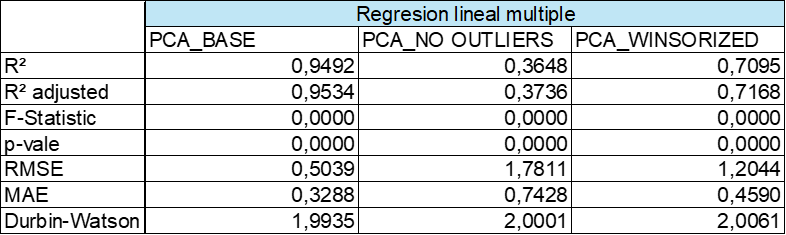

Resumen parametros para regresion Bridge

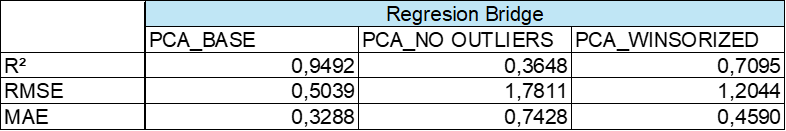

Resumen parametros para Random Forest Regression

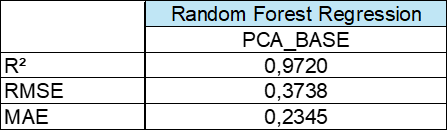

**1. Dataframes (Base, Winsorised, No outliers)**

* En todos los modelos, el dataframe base (solo habiendo aplicado encoding y scaling) es el que mejor performance.

* El dataframe suavizado tiene una mejor performance en bridge y random forest, pero aun sigue siendo inferior al base.

* El dataframe sin outliers es el que peor predice en todos los modelos.



**2. F-statistic y p-vale:**

* El F-Statistic y el p-value indican que todos los modelos son estadísticamente significativos.

**3. Posibles mejoras:**

* Hiperparametros: Se podria por ejemplo en modelo bridge modificar el alpha para disminuir el riesgo de overfitting (ej: Se puede optimizar con GridSearchCV).

* PCA: Disminuir el % de varianza que quiere ser capturada al aplicar PCA (por ejemplo 95% en lugar de 99%). Eso seguramente da lugar a menor cantidad de grupos/PCA, capturando menos varianza pero posiblemente mejorando la prediccion.

* Aplicar modelos no lienales: Ejemplo Random Forest Gradient Boosting.

**4. Performance Modelos:**

* Claramente el modelo de Random Forest es el que obtuvo mejores metricas. De todas formas, no compensa el tiempo de ejecucion Vs mejora.

**5. Validacion cruzada:**
Constituye una buena practica, y se verifica que el modelo encontrado con 7 muestras adicionales de 50.000 filas cada una arroja resultados muy buenos.

## 8- MODELOS DE CLASIFICACION

###8.1 Arbol de decision

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Seleccionar solo columnas numéricas excluyendo la variable objetivo
numeric_cols = scaled_sample3.select_dtypes(include='number').columns.drop('TIPO_DEMORA').tolist()

# Calcular la correlación con TIPO_DEMORA
correlations = scaled_sample3[numeric_cols].corrwith(scaled_sample3['TIPO_DEMORA']).fillna(0).abs()

# Eliminar variables con correlación mayor a 0.58 con TIPO_DEMORA
high_corr_vars = correlations[correlations > 0.58].index.tolist()
filtered_numeric_cols = [col for col in numeric_cols if col not in high_corr_vars]

# Separar variables predictoras y objetivo
X = scaled_sample3[filtered_numeric_cols]
y = scaled_sample3['TIPO_DEMORA']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Mostrar resultados
print("Variables eliminadas por alta correlación con TIPO_DEMORA:", high_corr_vars)
print("Número de variables restantes:", len(filtered_numeric_cols))
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Eliminamos las correlaciones mayores de 0,58, pues la variable TIPO_DEMORA fue generada a partir de ARR_DELAY y DEP_DELAY. De no eliminarla, la precision da 1 aun con profundidad = 2.

A su vez, notar que calculamos la correlacion con df1 y no con sample3, para tener el valor de correlacion de la poblacion y no de la muestra.

A continuacion se exponen los valores.

In [ ]:
correlations

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Aplicar Selección de Características (SFS) - Al aplicar en k-fatures "best", se aplica metodo Stepwise
sfs = SFS(tree_model,
          k_features=10, #"best", Encuentra la mejor cantidad de variables. Se limita a cantidad = 10
          forward=True,  # Selección hacia adelante
          floating=False, # Si se coloca TRUE Puede eliminar variables no útiles
          scoring='accuracy',
          cv=3)  # Reducido a 3 folds para mayor velocidad. Si se coloca cv=5 es mejor para Validación cruzada

# Ajustar SFS
sfs.fit(X_train, y_train)

# Obtener las mejores características
selected_features = list(sfs.k_feature_names_)
print("Variables seleccionadas:", selected_features)


from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Aplicar Selección de Características (SFS)
sfs = SFS(tree_model2,
          k_features=10,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=3)

# Ajustar SFS
sfs.fit(X_train2, y_train2)

# Obtener los nombres de las mejores características
selected_features = list(sfs.k_feature_names_)
print("Variables seleccionadas:", selected_features)



In [ ]:
# Filtrar datos con las mejores características
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]

# Definir el modelo de Árbol de Decisión con max_depth=
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Entrenar el Árbol con las variables seleccionadas
tree_model.fit(X_train_sfs, y_train)

# Predicción en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test_sfs)

# Calcular precisión del modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Precisión del Árbol de Decisión: {accuracy_tree:.4f}")

In [ ]:
# Graficamos arbol generado anteriormente

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

scaled_sample3b=scaled_sample3.copy()

# Replace numeric values with descriptive labels
scaled_sample3b['TIPO_DEMORA'] = scaled_sample3['TIPO_DEMORA'].replace({
    0: 'NO DEMORADO',
    1: 'DESPEGUE DEMORADO',
    2: 'ATERRIZAJE DEMORADO',
    3: 'DESPEGUE/ATERRIZAJE DEMORADOS'
})

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=selected_features, class_names=['NO DEMORADO', 'DESPEGUE DEMORADO', 'ATERRIZAJE DEMORADO', 'DESPEGUE/ATERRIZAJE DEMORADOS'], filled=True, rounded=True)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NO DEMORADO', 'DESPEGUE DEMORAD', 'ATERRIZAJE DEMORADO', 'DESPEGUE/ATERRIZAJE DEMORADOS'],
            yticklabels=['NO DEMORADO', 'DESPEGUE DEMORAD', 'ATERRIZAJE DEMORADO', 'DESPEGUE/ATERRIZAJE DEMORADOS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tree, target_names=['NO DEMORADO', 'DESPEGUE DEMORAD', 'ATERRIZAJE DEMORADO', 'DESPEGUE/ATERRIZAJE DEMORADOS']))

* **NO DEMORADO** tiene excelente desempeño (F1-score 0.97), lo que indica que el modelo predice muy bien los vuelos sin demora.

* **DESPEGUE DEMORADO** tiene desempeño nulo (F1-score 0.00), lo que sugiere que el modelo no logra identificar esta clase. Esto puede deberse posiblemente al desbalance de esta clase.

* **ATERRIZAJE DEMORADO** tiene desempeño aceptable (F1-score 0.79), aunque podría mejorar.

* **DESPEGUE/ATERRIZAJE DEMORADOS** tiene muy buen desempeño (F1-score 0.93).

Debido a lo mencionado, procedemos a incrementar las clases minoritarias en 20.000 filas cada uno y correr nuevamente el problema (no es necesario crear datos sinteticos considerando la muestra fue de 320.000 filas sobre un total de 7,4 millones).

Una vez tomadas estas filas e incorporadas, volvemos a correr el modelo.

#####8.1.2 Correccion Arbol de decision

In [ ]:
# Filter 20,000 unique rows from df1 with TIPO_DEMORA = 1 and not in sample3
df1_tipo1 = df1[df1['TIPO_DEMORA'] == 1]
df1_tipo2 = df1[df1['TIPO_DEMORA'] == 2]

# Remove rows that are already in sample3
df1_tipo1_unique = pd.merge(df1_tipo1, sample3, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
df1_tipo2_unique = pd.merge(df1_tipo2, sample3, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

# Sample 20,000 rows from each
df1_tipo1_sample = df1_tipo1_unique.sample(n=20000, random_state=42)
df1_tipo2_sample = df1_tipo2_unique.sample(n=20000, random_state=42)

# Concatenate with sample3 to create sample3aumentado
sample3aumentado = pd.concat([sample3, df1_tipo1_sample, df1_tipo2_sample], ignore_index=True)

# Show the shape of the new DataFrame
print("sample3aumentado shape:", sample3aumentado.shape)


Aplicamos mismo metodo de encoding que con que sample3 (por mas que la variable target sea otra, esta relacionada a la nueva variable target).

In [ ]:
# Identificar variables categóricas
cat_cols = sample3aumentado.select_dtypes(include=["object", "category"]).columns.tolist()

# Calcular cardinalidad
card = sample3aumentado[cat_cols].nunique()

# Separar por cardinalidad
high_card = [col for col in cat_cols if card[col] > 5]
low_card = [col for col in cat_cols if card[col] <= 5]

# Copia para codificación
sample3_mod2 = sample3aumentado.copy()

# Target Encoding para alta cardinalidad
target = "ARR_DELAY"
if target in sample3_mod2.columns and pd.api.types.is_numeric_dtype(sample3_mod2[target]):
    for col in high_card:
        sample3_mod2[col + "_enc"] = sample3_mod2.groupby(col)[target].transform("mean")

# One-Hot Encoding para baja cardinalidad
sample3_mod2 = pd.get_dummies(sample3_mod2, columns=low_card, drop_first=False)

# Columnas numéricas originales
num_cols = sample3.select_dtypes(include=np.number).columns.tolist()

# Nuevas columnas codificadas
new_cols = [col for col in sample3_mod2.columns if col not in sample3.columns or col.endswith("_enc")]

# Crear DataFrame final
cols_final = [col for col in num_cols + new_cols if col in sample3_mod2.columns]
sample3_encoded2 = sample3_mod2[cols_final].copy()

low_card = [col for col in cat_cols if card[col] <= 5]
print("Las siguientes variables seran codificadas con la metodologia One Hot Encoding por tener")
print("una cardinalidad menor o igual a 5:", low_card)
print("\n")
print("Las siguientes variables seran codificadas con la metodologia Target Encoding por tener")
print("una cardinalidad menor o igual a 5:", high_card)

# Mostrar resumen
print("\n\nSample 3 Codificado")
sample3_encoded2.describe()

A continuacion, aplicamos mismo metodo de escalado:

In [ ]:
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


# Seleccionar columnas numéricas
numeric_cols = sample3_encoded2.select_dtypes(include=[np.number]).columns

# Función para contar outliers usando el método IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Crear tabla resumen
summary = []
for col in numeric_cols:
    data = sample3_encoded2[col].dropna()
    sk = skew(data)
    ku = kurtosis(data)
    outliers = count_outliers(data)

# Selección del método de escalado
    if outliers > 1000 or abs(sk) > 1 or ku > 3: #Si la cantidad de outliers es excesiva y el grado de asimetria
        method = "RobustScaler"
    elif abs(sk) < 0.5 and abs(ku) < 1:
        method = "StandardScaler"
    else:
        method = "MinMaxScaler"

    summary.append({
        "Variable": col,
        "Skewness": round(sk, 2),
        "Kurtosis": round(ku, 2),
        "Outliers": outliers,
        "Método recomendado": method
    })

# Convertir a DataFrame
summaryTable = pd.DataFrame(summary)
print(summaryTable)

# Crear un nuevo DataFrame para almacenar las variables escaladas
scaled_sample32 = pd.DataFrame(index=sample3_encoded2.index)

# Aplicar el método de escalado correspondiente a cada variable
for _, row in summaryTable.iterrows():
    col = row["Variable"]
    method = row["Método recomendado"]
    data = sample3_encoded2[[col]].copy()

    if method == "MinMaxScaler":
        scaler = MinMaxScaler()
    elif method == "StandardScaler":
        scaler = StandardScaler()
    elif method == "RobustScaler":
        scaler = RobustScaler()
    else:
        continue

    scaled_sample32[col] = scaler.fit_transform(data)

# Mostrar las primeras filas del DataFrame escalado
print("\nDescribe de Sample3 Escalado")
scaled_sample32.describe()

In [ ]:
#Reemplazamos Nan por 0 para evitar luego problemas en modelado.
scaled_sample32 = scaled_sample32.fillna(0)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Seleccionar solo columnas numéricas excluyendo la variable objetivo
numeric_cols = scaled_sample32.select_dtypes(include='number').columns.drop('TIPO_DEMORA').tolist()

# Calcular la correlación con TIPO_DEMORA
correlations3 = scaled_sample32[numeric_cols].corrwith(scaled_sample32['TIPO_DEMORA']).fillna(0).abs()

# Eliminar variables con correlación mayor a 0.53 con TIPO_DEMORA
high_corr_vars = correlations3[correlations > 0.53].index.tolist()
filtered_numeric_cols = [col for col in numeric_cols if col not in high_corr_vars]

# Separar variables predictoras y objetivo
X = scaled_sample32[filtered_numeric_cols]
y = scaled_sample32['TIPO_DEMORA']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Mostrar resultados
print("Variables eliminadas por alta correlación con TIPO_DEMORA:", high_corr_vars)
print("Número de variables restantes:", len(filtered_numeric_cols))
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

In [ ]:
correlations3

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Aplicar Selección de Características (SFS) - Al aplicar en k-fatures "best", se aplica metodo Stepwise
sfs = SFS(tree_model,
          k_features=10, #"best", Encuentra la mejor cantidad de variables. Se limita a cantidad = 10
          forward=True,  # Selección hacia adelante
          floating=False, # Si se coloca TRUE Puede eliminar variables no útiles
          scoring='accuracy',
          cv=3)  # Reducido a 3 folds para mayor velocidad. Si se coloca cv=5 es mejor para Validación cruzada

# Ajustar SFS
sfs.fit(X_train, y_train)

# Obtener las mejores características
selected_features = list(sfs.k_feature_names_)
print("Variables seleccionadas:", selected_features)


In [ ]:
from sklearn.metrics import accuracy_score

# Filtrar datos con las mejores características
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]

# Definir el modelo de Árbol de Decisión con max_depth=
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Entrenar el Árbol con las variables seleccionadas
tree_model.fit(X_train_sfs, y_train)

# Predicción en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test_sfs)

# Calcular precisión del modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Precisión del Árbol de Decisión: {accuracy_tree:.4f}")

In [ ]:
# Graficamos arbol generado anteriormente

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

scaled_sample3b=scaled_sample32.copy()

# Replace numeric values with descriptive labels
scaled_sample3b['TIPO_DEMORA'] = scaled_sample3['TIPO_DEMORA'].replace({
    0: 'NO DEMORADO',
    1: 'DESPEGUE DEMORADO',
    2: 'ATERRIZAJE DEMORADO',
    3: 'DESPEGUE/ATERRIZAJE DEMORADOS'
})

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=selected_features, class_names=['NO DEMORADO', 'DESPEGUE DEMORADO', 'ATERRIZAJE DEMORADO', 'DESPEGUE/ATERRIZAJE DEMORADOS'], filled=True, rounded=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NO DEMORADO', 'DESPEGUE DEMORAD', 'ATERRIZAJE DEMORADO', 'DESPEGUE/ATERRIZAJE DEMORADOS'],
            yticklabels=['NO DEMORADO', 'DESPEGUE DEMORAD', 'ATERRIZAJE DEMORADO', 'DESPEGUE/ATERRIZAJE DEMORADOS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tree, target_names=['NO DEMORADO', 'DESPEGUE DEMORAD', 'ATERRIZAJE DEMORADO', 'DESPEGUE/ATERRIZAJE DEMORADOS']))

**Reporte de clasificacion inicial a continuacion para poder compararlos:**

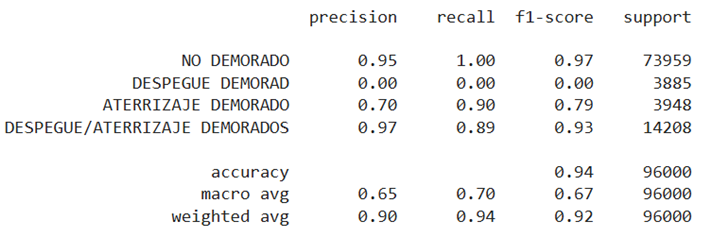

**CONCLUSION:**

Se observa gran mejora en clases minoritarias.

DESPEGUE DEMORADO: pasó de F1-score 0.00 a 0.52.

ATERRIZAJE DEMORADO: subió de 0.79 a 0.90.

Existio una ligera caída en NO DEMORADO, pero sigue siendo muy alto (0.94).

Macro promedio (que trata todas las clases por igual) mejoró significativamente.

Accuracy general bajó un poco, pero ahora el modelo es mucho más justo con todas las clases.

Podriamos continuar mejorando el modelo con hiperparametros como pesos de las clases, incorporando mas datos tomados del dataframe o utilizando otros metodos.

###8.2 Regresion logistica

In [ ]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crear columna binaria: 1 si demorado, 0 si no demorado
scaled_sample3['ESTADO_DEMORA_BIN'] = scaled_sample3['TIPO_DEMORA'].apply(lambda x: 1 if x in [1, 2, 3] else 0)


# Seleccionar solo columnas numéricas excluyendo la variable objetivo
numeric_cols = scaled_sample3.select_dtypes(include='number').columns.drop(['ESTADO_DEMORA_BIN']).tolist()

# Calcular la correlación con TIPO_DEMORA
correlations2 = scaled_sample3[numeric_cols].corrwith(scaled_sample3['ESTADO_DEMORA_BIN']).fillna(0).abs()

# Eliminar variables con correlación mayor a 0.51 con ESTADO_DEMORA_BIN
high_corr_vars = correlations2[correlations2 > 0.51].index.tolist()
filtered_numeric_cols = [col for col in numeric_cols if col not in high_corr_vars]

# Separar variables predictoras y objetivo binario
X2 = scaled_sample3[filtered_numeric_cols]
y2 = scaled_sample3['ESTADO_DEMORA_BIN']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Definir el modelo de árbol de decisión
tree_model2 = DecisionTreeClassifier(random_state=42)

# Mostrar resultados
print("Variables eliminadas por alta correlación con TIPO_DEMORA:", high_corr_vars)
print("Número de variables restantes:", len(filtered_numeric_cols))
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Aplicamos reduccion de variables con correlacion mayor o igual a 0,51 considerando la variable a predecir fue calculada a partir de TIPO_DEMORA, la cual, a su vez, era un calculo condicional a partir de las variables ARR_DELAY y DEP_DELAY.

In [ ]:
correlations2

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Aplicar Selección de Características (SFS) - Al aplicar en k-fatures "best", se aplica metodo Stepwise
sfs2 = SFS(tree_model2,
          k_features=10,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=3)

# Ajustar SFS
sfs2.fit(X_train2, y_train2)

# Obtener las mejores características
selected_features = list(sfs2.k_feature_names_)
print("Variables seleccionadas:", selected_features)

In [ ]:
# Filtrar datos con las mejores características
X_train_sfs2 = X_train2[selected_features]
X_test_sfs2 = X_test2[selected_features]

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_sfs2, y_train2)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_sfs2)

# Evaluate the model (example: using accuracy)
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test2, y_pred_logreg)
print(f"Accuracy of Logistic Regression: {accuracy_logreg}")


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm_logreg = confusion_matrix(y_test2, y_pred_logreg)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Demorado', 'No Demorado'],
            yticklabels=['Demorado', 'No Demorado'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [ ]:
print(classification_report(y_test2, y_pred_logreg, target_names=['Demorado', 'No Demorado']))

#####8.2.2 Correccion Regresion Logistica

In [ ]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crear columna binaria: 1 si demorado, 0 si no demorado
scaled_sample32['ESTADO_DEMORA_BIN'] = scaled_sample32['TIPO_DEMORA'].apply(lambda x: 1 if x in [1, 2, 3] else 0)


# Seleccionar solo columnas numéricas excluyendo la variable objetivo
numeric_cols = scaled_sample32.select_dtypes(include='number').columns.drop(['ESTADO_DEMORA_BIN']).tolist()

# Calcular la correlación con TIPO_DEMORA
correlations4 = scaled_sample32[numeric_cols].corrwith(scaled_sample32['ESTADO_DEMORA_BIN']).fillna(0).abs()

# Eliminar variables con correlación mayor a 0.44 con ESTADO_DEMORA_BIN
high_corr_vars = correlations4[correlations2 > 0.44].index.tolist()
filtered_numeric_cols = [col for col in numeric_cols if col not in high_corr_vars]

# Separar variables predictoras y objetivo binario
X2 = scaled_sample32[filtered_numeric_cols]
y2 = scaled_sample32['ESTADO_DEMORA_BIN']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Definir el modelo de árbol de decisión
tree_model2 = DecisionTreeClassifier(random_state=42)

# Mostrar resultados
print("Variables eliminadas por alta correlación con TIPO_DEMORA:", high_corr_vars)
print("Número de variables restantes:", len(filtered_numeric_cols))
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


In [ ]:
correlations4

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Aplicar Selección de Características (SFS) - Al aplicar en k-fatures "best", se aplica metodo Stepwise
sfs2 = SFS(tree_model2,
          k_features=10,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=3)

# Ajustar SFS
sfs2.fit(X_train2, y_train2)

# Obtener las mejores características
selected_features = list(sfs2.k_feature_names_)
print("Variables seleccionadas:", selected_features)

In [ ]:
# Filtrar datos con las mejores características
X_train_sfs2 = X_train2[selected_features]
X_test_sfs2 = X_test2[selected_features]

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_sfs2, y_train2)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_sfs2)

# Evaluate the model (example: using accuracy)
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test2, y_pred_logreg)
print(f"Accuracy of Logistic Regression: {accuracy_logreg}")

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm_logreg = confusion_matrix(y_test2, y_pred_logreg)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Demorado', 'No Demorado'],
            yticklabels=['Demorado', 'No Demorado'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
print(classification_report(y_test2, y_pred_logreg, target_names=['Demorado', 'No Demorado']))

Reporte de clasificacion anterior (para comparar):

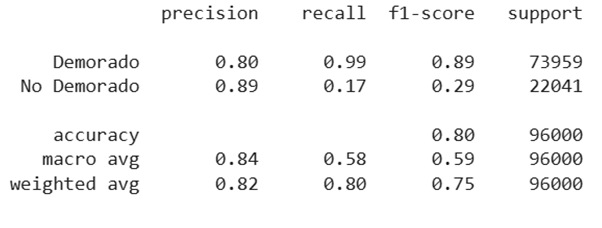

**CONCLUSION:**

A diferencia del modelo de Arbol de decision, el modelo de regresion logistica logro balancear las clases a costas de una ligera menor performance en general. Es decir, el modelo ahora reconoce mejor la clase minoritaria, aunque con una leve pérdida de rendimiento general.

Para continuar mejorando el modelo, habria que definir claramente la prioridad en la prediccion para perseguir dicho objetivo (ej: si el objetivo era equilibrar el modelo, con esta modificacion propuesta se logro una mejora).

## **9- MODELOS DE CLUSTERING**

### 9.1 Clusterizacion Aerolineas

#### 9.1.1 Estimacion de k optimos: Elbow Method (1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import time

# Verificar que la columna 'AIRLINE' exista
if 'AIRLINE' not in sample3.columns: # Check in original sample3
    print("Error: La columna 'AIRLINE' no se encuentra en el archivo original.")
else:
    # Asegurarse de que scaled_sample3 existe y es un DataFrame
    if 'scaled_sample3' not in locals() or not isinstance(scaled_sample3, pd.DataFrame):
        print("Error: El DataFrame 'scaled_sample3' no se encuentra o no es válido.")
    else:
        # Seleccionar solo columnas numéricas de scaled_sample3
        numeric_cols_scaled = scaled_sample3.select_dtypes(include=[np.number]).columns.tolist()

        # Eliminar columnas con todos los valores nulos en scaled_sample3
        numeric_cols_scaled = [col for col in numeric_cols_scaled if scaled_sample3[col].notna().sum() > 0]

        # Agregar por aerolínea usando la media sobre los datos ya escalados
        # Asegurarse de que 'AIRLINE' está en el índice del original sample3
        if 'AIRLINE' in sample3.columns:
             # Temporalmente añadir AIRLINE a scaled_sample3 for grouping
             scaled_sample3_with_airline = scaled_sample3.copy()
             scaled_sample3_with_airline['AIRLINE'] = sample3['AIRLINE'].values # Align indices or ensure correct mapping


             airline_agg_scaled = scaled_sample3_with_airline.groupby('AIRLINE')[numeric_cols_scaled].mean()

             # Drop the temporary column
             del scaled_sample3_with_airline

        else:
            print("Error: La columna 'AIRLINE' no se encuentra en el DataFrame original 'sample3'.")
            # Fallback: proceed without grouping by airline if needed, but the plot title would be misleading
            # For now, stop if AIRLINE is not available for grouping
            airline_agg_scaled = pd.DataFrame() # Empty DataFrame to prevent errors


        if not airline_agg_scaled.empty:

            # No es necesario re-escalar, los datos ya vienen de scaled_sample3
            scaled_df = airline_agg_scaled.copy() # Use the already scaled aggregated data

            # Determinar el rango de k válido
            # Asegurarse de que scaled_df no está vacío y tiene más de 1 fila
            if len(scaled_df) > 1:
                max_k = min(len(scaled_df) - 1, 10)
                k_range = range(2, max_k + 1)
            else:
                 print("Warning: El DataFrame agrupado por aerolínea está vacío o tiene solo una fila. No se puede calcular Silhouette Score.")
                 k_range = [] # Empty range

            silhouette_scores = []
            inertia_values = []
            fit_times = []

            for k in k_range:
                try:
                    start_time = time.time()
                    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
                    labels = kmeans.fit_predict(scaled_df)
                    end_time = time.time()

                    score = silhouette_score(scaled_df, labels)
                    silhouette_scores.append(score)

                    inertia_values.append(kmeans.inertia_)
                    fit_times.append(end_time - start_time)

                except Exception as e:
                    print(f"Error al calcular métricas para k={k}: {e}")
                    silhouette_scores.append(np.nan)
                    inertia_values.append(np.nan)
                    fit_times.append(np.nan)

            # Graficar los resultados
            if k_range: # Only plot if k_range is not empty
                fig, ax1 = plt.subplots(figsize=(12, 7))

                # Plot Silhouette Score
                ax1.plot(list(k_range), silhouette_scores, marker='o', linestyle='-', color='blue', label='Silhouette Score')
                ax1.set_xlabel('Número de Clusters (k)')
                ax1.set_ylabel('Silhouette Score', color='blue')
                ax1.tick_params(axis='y', labelcolor='blue')
                ax1.set_xticks(list(k_range))
                ax1.grid(True)

                # Create a second y-axis for Inertia
                ax2 = ax1.twinx()
                ax2.plot(list(k_range), inertia_values, marker='o', linestyle='-', color='red', label='Inertia (SSE)')
                ax2.set_ylabel('Inertia (SSE)', color='red')
                ax2.tick_params(axis='y', labelcolor='red')

                # Create a third y-axis for Fit Time
                ax3 = ax1.twinx()
                # Adjust position for the third axis
                ax3.spines['right'].set_position(('outward', 60))
                ax3.plot(list(k_range), fit_times, marker='o', linestyle='-', color='green', label='Fit Time (s)')
                ax3.set_ylabel('Fit Time (s)', color='green')
                ax3.tick_params(axis='y', labelcolor='green')


                # Combine legends
                lines1, labels1 = ax1.get_legend_handles_labels()
                lines2, labels2 = ax2.get_legend_handles_labels()
                lines3, labels3 = ax3.get_legend_handles_labels()
                ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')


                plt.title('Método del Codo con Múltiples Métricas (Agrupado por Aerolínea)')
                plt.tight_layout()
                plt.show()
            else:
                 print("No se pudo generar el gráfico debido a la falta de un rango de k válido.")
        else:
            print("No se pudo generar el DataFrame agrupado por aerolínea.")

Los valores optimos pareciera n estar entre 3 y 4 clusters. Solo a fin de evaluar el comportamiento, aplicaremos entre k = 2 y k = 5.

#### 9.1.2 K-Means Clustering (1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Ensure scaled_sample3 exists and is a DataFrame
if 'scaled_sample3' not in locals() or not isinstance(scaled_sample3, pd.DataFrame):
    print("Error: El DataFrame 'scaled_sample3' no se encuentra o no es válido.")
elif 'sample3' not in locals() or not isinstance(sample3, pd.DataFrame) or 'AIRLINE' not in sample3.columns:
    print("Error: El DataFrame 'sample3' o la columna 'AIRLINE' no se encuentran o no son válidos.")
else:
    # Select only numeric columns from scaled_sample3
    numeric_cols_scaled = scaled_sample3.select_dtypes(include=[np.number]).columns.tolist()

    # Ensure scaled_sample3 has the same index as sample3
    scaled_sample3 = scaled_sample3.reindex(sample3.index)

    # Combine scaled data with the original 'AIRLINE' column for grouping
    df_for_agg = scaled_sample3[numeric_cols_scaled].copy()
    df_for_agg['AIRLINE'] = sample3['AIRLINE']

    airline_agg_scaled = df_for_agg.groupby('AIRLINE').mean()
    airline_agg_scaled.dropna(axis=1, how='all', inplace=True)

    if airline_agg_scaled.empty:
        print("Error: El DataFrame agrupado por aerolínea está vacío.")
    else:
        X = airline_agg_scaled.copy()
        k_values = [3, 4, 5]

        for k in k_values:
            print(f"\n--- Applying K-Means with k = {k} for Airlines ---")
            try:
                kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
                cluster_labels = kmeans.fit_predict(X)
                X[f'Cluster_{k}'] = cluster_labels

                pca_viz = PCA(n_components=2)
                pca_components = pca_viz.fit_transform(X.drop(columns=[f'Cluster_{k}']))
                pca_df_viz = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'], index=X.index)
                pca_df_viz[f'Cluster_{k}'] = cluster_labels
                pca_df_viz['Airline'] = pca_df_viz.index

                plt.figure(figsize=(10, 8))
                sns.scatterplot(x='PC1', y='PC2', hue=f'Cluster_{k}', data=pca_df_viz, palette='viridis', legend='full')

                for i in range(pca_df_viz.shape[0]):
                    plt.text(pca_df_viz['PC1'][i], pca_df_viz['PC2'][i], pca_df_viz['Airline'][i], fontsize=9, ha='center', va='bottom')

                plt.title(f'K-Means Clustering (k={k}) for Airlines - Visualización PCA (2D)')
                plt.xlabel('Principal Component 1')
                plt.ylabel('Principal Component 2')
                plt.grid(True)
                plt.show()

                print(f"\nAirlines in each cluster for k={k}:")
                for cluster_id in range(k):
                    airlines_in_cluster = X[X[f'Cluster_{k}'] == cluster_id].index.tolist()
                    print(f"Cluster {cluster_id}: {airlines_in_cluster}")

                print(f"Cluster sizes for k={k}:\n{X[f'Cluster_{k}'].value_counts()}")
                print(f"Centroids for k={k}:\n{kmeans.cluster_centers_}")
                print(f"Inertia (SSE) for k={k}: {kmeans.inertia_:.2f}")

                X = X.drop(columns=[f'Cluster_{k}'])

            except Exception as e:
                print(f"Error applying K-Means or visualizing for k={k}: {e}")



#### 9.1.3 Estimacion de k optimos: Elbow Method (2)

In [ ]:
# Verificar que sample3 y scaled_sample3 existen
if 'sample3' not in locals() or 'scaled_sample3' not in locals():
    print("Error: Los DataFrames 'sample3' y/o 'scaled_sample3' no están disponibles.")
else:
    # Verificar que las columnas necesarias existen en sample3
    required_columns = ['AIRLINE', 'DEP_DELAY', 'ARR_DELAY']
    missing_columns = [col for col in required_columns if col not in sample3.columns]

    if missing_columns:
        print(f"Error: Las siguientes columnas faltan en 'sample3': {missing_columns}")
    else:
        # Crear DataFrame con columnas necesarias
        delay_df = sample3[['AIRLINE', 'DEP_DELAY', 'ARR_DELAY']].copy()

        # Agregar columna de cantidad de registros por aerolínea
        delay_df['COUNT'] = 1
        airline_agg = delay_df.groupby('AIRLINE').agg({
            'DEP_DELAY': 'mean',
            'ARR_DELAY': 'mean',
            'COUNT': 'count'
        })

        # Escalar los datos
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaled_df = pd.DataFrame(scaler.fit_transform(airline_agg),
                                 index=airline_agg.index,
                                 columns=airline_agg.columns)

        # Determinar rango de k válido
        if len(scaled_df) > 1:
            max_k = min(len(scaled_df) - 1, 10)
            k_range = range(2, max_k + 1)
        else:
            print("Warning: El DataFrame agrupado por aerolínea está vacío o tiene solo una fila.")
            k_range = []

        silhouette_scores = []
        inertia_values = []
        fit_times = []

        for k in k_range:
            try:
                start_time = time.time()
                kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
                labels = kmeans.fit_predict(scaled_df)
                end_time = time.time()

                score = silhouette_score(scaled_df, labels)
                silhouette_scores.append(score)

                inertia_values.append(kmeans.inertia_)
                fit_times.append(end_time - start_time)

            except Exception as e:
                print(f"Error al calcular métricas para k={k}: {e}")
                silhouette_scores.append(np.nan)
                inertia_values.append(np.nan)
                fit_times.append(np.nan)

        # Graficar resultados
        if k_range:
            fig, ax1 = plt.subplots(figsize=(12, 7))

            ax1.plot(list(k_range), silhouette_scores, marker='o', linestyle='-', color='blue', label='Silhouette Score')
            ax1.set_xlabel('Número de Clusters (k)')
            ax1.set_ylabel('Silhouette Score', color='blue')
            ax1.tick_params(axis='y', labelcolor='blue')
            ax1.set_xticks(list(k_range))
            ax1.grid(True)

            ax2 = ax1.twinx()
            ax2.plot(list(k_range), inertia_values, marker='o', linestyle='-', color='red', label='Inertia (SSE)')
            ax2.set_ylabel('Inertia (SSE)', color='red')
            ax2.tick_params(axis='y', labelcolor='red')

            ax3 = ax1.twinx()
            ax3.spines['right'].set_position(('outward', 60))
            ax3.plot(list(k_range), fit_times, marker='o', linestyle='-', color='green', label='Fit Time (s)')
            ax3.set_ylabel('Fit Time (s)', color='green')
            ax3.tick_params(axis='y', labelcolor='green')

            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            lines3, labels3 = ax3.get_legend_handles_labels()
            ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

            plt.title('Método del Codo con Métricas (Agrupado por Aerolínea: DEP_DELAY, ARR_DELAY, COUNT)')
            plt.tight_layout()
            plt.show()
        else:
            print("No se pudo generar el gráfico debido a la falta de un rango de k válido.")



#### 9.1.4 K-Means Clustering (2)

In [ ]:
 from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Simulación de sample3 con columnas necesarias
# Este bloque debe ser reemplazado por la carga real del DataFrame en tu entorno
# Por ejemplo: sample3 = pd.read_csv("sample3.csv")

# Verificación de columnas necesarias
required_columns = ['AIRLINE', 'DEP_DELAY', 'ARR_DELAY']
if all(col in sample3.columns for col in required_columns):
    # Agrupar por aerolínea y calcular estadísticas
    airline_grouped = sample3.groupby('AIRLINE').agg({
        'DEP_DELAY': 'mean',
        'ARR_DELAY': 'mean',
        'AIRLINE': 'count'
    }).rename(columns={'AIRLINE': 'COUNT'})

    # Escalar los datos
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(airline_grouped)

    # Aplicar KMeans para k = 3, 4, 5 y graficar en 3D
    fig = plt.figure(figsize=(6, 18))

    for i, k in enumerate(range(3, 6), 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(scaled_features)

        # Imprimir los clusters formados
        cluster_df = pd.DataFrame({
            'AIRLINE': airline_grouped.index,
            'Cluster': labels
        })
        print(f"\nClusters formados para k={k}:\n", cluster_df.sort_values(by='Cluster'))

        ax = fig.add_subplot(3, 1, i, projection='3d')
        ax.scatter(
            scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2],
            c=labels, cmap='viridis', s=50
        )

        for j, airline in enumerate(airline_grouped.index):
            ax.text(
                scaled_features[j, 0], scaled_features[j, 1], scaled_features[j, 2],
                airline, fontsize=8
            )

        ax.set_title(f'KMeans Clustering (k={k})')
        ax.set_xlabel('DEP_DELAY (scaled)')
        ax.set_ylabel('ARR_DELAY (scaled)')
        ax.set_zlabel('COUNT (scaled)')

    plt.tight_layout()
    plt.show()
else:
    print("Error: El DataFrame 'sample3' no contiene todas las columnas necesarias: 'AIRLINE', 'DEP_DELAY', 'ARR_DELAY'.")

#### 9.1.5 Comparacion Kmeans1 Vs Kmeans2

Se realiza una comparación detallada entre los clusters formados por Modelo 1 (KMeans + PCA) y Modelo 2 (KMeans sobre estadísticas agrupadas) para cada valor de k:

Nota: En el segundo caso se seleccionaron las variables que eran de interes para nuestro analisis.

In [ ]:
# Definición de clusters de Modelo 2 (extraídos de la corrida 9.1.4)
model2_clusters = {
    3: {
        'Allegiant Air': 0, 'Frontier Airlines Inc.': 0, 'ExpressJet Airlines LLC d/b/a aha!': 0,
        'Envoy Air': 0, 'Spirit Air Lines': 0, 'PSA Airlines Inc.': 0, 'Mesa Airlines Inc.': 0,
        'JetBlue Airways': 0, 'United Air Lines Inc.': 0, 'Hawaiian Airlines Inc.': 1,
        'Endeavor Air Inc.': 1, 'Republic Airline': 1, 'Alaska Airlines Inc.': 1,
        'American Airlines Inc.': 2, 'SkyWest Airlines Inc.': 2, 'Delta Air Lines Inc.': 2,
        'Southwest Airlines Co.': 2
    },
    4: {
        'ExpressJet Airlines LLC d/b/a aha!': 0, 'Frontier Airlines Inc.': 0, 'Mesa Airlines Inc.': 0,
        'JetBlue Airways': 0, 'United Air Lines Inc.': 0, 'Endeavor Air Inc.': 1,
        'Allegiant Air': 1, 'PSA Airlines Inc.': 1, 'Spirit Air Lines': 1, 'Republic Airline': 1,
        'Envoy Air': 1, 'American Airlines Inc.': 2, 'Southwest Airlines Co.': 2,
        'SkyWest Airlines Inc.': 2, 'Delta Air Lines Inc.': 2, 'Alaska Airlines Inc.': 3,
        'Hawaiian Airlines Inc.': 3
    },
    5: {
        'Delta Air Lines Inc.': 0, 'Southwest Airlines Co.': 0, 'Envoy Air': 1,
        'Allegiant Air': 1, 'Spirit Air Lines': 1, 'Republic Airline': 1, 'PSA Airlines Inc.': 1,
        'Endeavor Air Inc.': 1, 'Hawaiian Airlines Inc.': 2, 'Alaska Airlines Inc.': 2,
        'ExpressJet Airlines LLC d/b/a aha!': 3, 'Frontier Airlines Inc.': 3,
        'Mesa Airlines Inc.': 3, 'JetBlue Airways': 3, 'American Airlines Inc.': 4,
        'SkyWest Airlines Inc.': 4, 'United Air Lines Inc.': 4
    }
}

# Definición de clusters de Modelo 1 (extraídos de la corrida 9.1.2)
model1_clusters = {
    3: {
        'Hawaiian Airlines Inc.': 0,
        'Allegiant Air': 1, 'American Airlines Inc.': 1, 'Envoy Air': 1,
        'ExpressJet Airlines LLC d/b/a aha!': 1, 'Frontier Airlines Inc.': 1,
        'JetBlue Airways': 1, 'Mesa Airlines Inc.': 1, 'PSA Airlines Inc.': 1,
        'Republic Airline': 1, 'SkyWest Airlines Inc.': 1, 'Spirit Air Lines': 1,
        'United Air Lines Inc.': 1,
        'Alaska Airlines Inc.': 2, 'Delta Air Lines Inc.': 2,
        'Endeavor Air Inc.': 2, 'Southwest Airlines Co.': 2
    },
    4: {
        'Allegiant Air': 0, 'American Airlines Inc.': 0, 'Frontier Airlines Inc.': 0,
        'JetBlue Airways': 0, 'Spirit Air Lines': 0, 'United Air Lines Inc.': 0,
        'Hawaiian Airlines Inc.': 1,
        'Alaska Airlines Inc.': 2, 'Delta Air Lines Inc.': 2,
        'Endeavor Air Inc.': 2, 'Southwest Airlines Co.': 2,
        'Envoy Air': 3, 'ExpressJet Airlines LLC d/b/a aha!': 3,
        'Mesa Airlines Inc.': 3, 'PSA Airlines Inc.': 3,
        'Republic Airline': 3, 'SkyWest Airlines Inc.': 3
    },
    5: {
        'Allegiant Air': 0, 'American Airlines Inc.': 0, 'Frontier Airlines Inc.': 0,
        'JetBlue Airways': 0, 'Spirit Air Lines': 0, 'United Air Lines Inc.': 0,
        'Hawaiian Airlines Inc.': 1,
        'Alaska Airlines Inc.': 2, 'Delta Air Lines Inc.': 2,
        'Endeavor Air Inc.': 2, 'Southwest Airlines Co.': 2,
        'Envoy Air': 3, 'Mesa Airlines Inc.': 3, 'PSA Airlines Inc.': 3,
        'Republic Airline': 3, 'SkyWest Airlines Inc.': 3,
        'ExpressJet Airlines LLC d/b/a aha!': 4
    }
}

# Comparar asignaciones para cada k
for k in [3, 4, 5]:
    print(f"\nComparación de clusters para k = {k}")
    airlines = sorted(model1_clusters[k].keys())
    df_compare = pd.DataFrame({
        'Airline': airlines,
        'Modelo_1': [model1_clusters[k][a] for a in airlines],
        'Modelo_2': [model2_clusters[k][a] for a in airlines]
    })
    df_compare['Coincide'] = df_compare['Modelo_1'] == df_compare['Modelo_2']
    print(df_compare)

    # Calcular índice de Rand ajustado
    ari = adjusted_rand_score(df_compare['Modelo_1'], df_compare['Modelo_2'])
    print(f"Índice de Rand Ajustado (ARI) para k={k}: {ari:.4f}")



La mayor similitud entre modelos se da en k = 3, aunque sigue siendo limitada.

A medida que aumenta k, los modelos divergen más en sus asignaciones.

El Índice de Rand Ajustado (ARI) confirma que los modelos generan agrupamientos bastante distintos, especialmente para k = 4 y k = 5.

##**10- CONCLUSIONES**

**MODELOS DE REGRESION:**

Los 3 modelos mostraron una performance elevada (llamativa), siendo esta a su vez mejor con dataframe con outliers para predecir la variable ARR_DELAY (Demora en la llegada a destino).

**MODELOS DE CLASIFICACION:**

Inicialmente performaban excesivamente bien por la correlacion entre variables (la clase a predecir surgia como resultado de otras variables del modelo).

Al quitarlas del modelo, quedo mucho mas realista, prediciendo bien las clases mayoritarias y no asi las minoritarias.

Dada la naturaleza de nuestro proyecto (excesiva cantidad de datos), se procedio a balancear clases minoritarias con datos reales obteniendo mejoras sustanciales.

**MODELOS DE CLUSTERING:**

Se aplica K-means para agrupar a las aerolineas por diferentes criterios, tratando de evaluar su performance (en este caso por demora).

Se aplican dos metodos de K-means con resultados bastantes divergentes, aunque coincidentes en que el numero de clusters mas conveniente ronda entre los 3 y 5 (idealmente 4).

**ASPECTOS QUE PODRIAN CONTINUAR INCLUYENDOSE:**

Quedan fuera de analsis muchos temas que serian muy interesantes de incluir (fundamentalmente por cuestiones de tiempo). Por ejemplo:

* Incorporar analisis de otros años y comparar con 2019.

* Aplicar otros metodos de clasificacion, regresion y clustering mas potentes.

* Profundizar sobre la modificacion de hiperparametros.

* Incorporar informacion de costos, nro de pasajeros.

* Entre otras motivaciones.